In [1]:
from helpers import load_all_data, vectorized_flatten, sigmoid, get_log_loss, get_accuracy, sigmoid_derivative, gradient_update, get_loss_plot, plot_loss
import numpy as np


In [2]:
X_train, y_train, X_dev, y_dev, X_test, y_test = load_all_data("../setup/data")

In [3]:
h1 = 32
lr = 0.1

In [4]:
def initialize(X): 

    
    dim1 = 1/np.sqrt(X.shape[0])
    W1 = dim1 * np.random.randn(h1, 28**2)
    
    dim2 = 1/np.sqrt(W1.shape[1])
    W2 = dim2 * np.random.randn(1, h1)
    
    b1 = np.zeros((h1, 1))
    b2 = np.zeros((1, 1))
    
    weights = (W1, W2)
    biases = (b1, b2)
    
    return weights, biases

In [5]:
def forward_pass(X, weights, biases):

    W1, W2 = weights
    b1, b2 = biases
    
    z1 = W1 @ X + b1
    a1 = sigmoid(z1)
    
    z2 = W2 @ z1 + b2
    a2 = sigmoid(z2)
    
    
    
    activations = (z1, a1, z2, a2)
    
    return activations

In [6]:
def backpropagation(X, y, weights, biases, activations):
    
    W1, W2 = weights
    b1, b2 = biases
    z1, a1, z2, a2 = activations
    m = y.shape[1]
    #print(m)   
    dz2 = a2 - y
    #print("dz3", dz3.shape)
    
   
    dW2 = np.dot(dz2, a1.T)/m
    #print("dW2", dW2.shape)
    
    db2 = np.sum(dz2, axis=1).reshape(-1, 1)/m
    #print("db2", db2.shape)
    
    da1 = np.dot(W2.T, dz2)
    #print("da1", da1.shape)
    
    dz1 = da1 * sigmoid_derivative(z1)
    #print("dz1", dz1.shape)
    
    dW1 = np.dot(dz1, X.T)/m
    #print("dW1", dW1.shape)
    
    db1 = np.sum(dz1, axis=1).reshape(-1, 1)/m
    #print("db1", db1.shape)
    
    return db1, dW1, db2, dW2

In [7]:
def update_parameters(weights, biases, gradients, learning_rate):
    
    W1, W2 = weights
    b1, b2 = biases
    
    db1, dW1, db2, dW2 = gradients
    
    W1 = gradient_update(W1, learning_rate, dW1)
    W2 = gradient_update(W2, learning_rate, dW2)
   
    b1 = gradient_update(b1, learning_rate, db1)
    b2 = gradient_update(b2, learning_rate, db2)
    
    weights = (W1, W2)
    biases = (b1, b2)
    
    return weights, biases

In [8]:
X_train_flattened = vectorized_flatten(X_train)
X_dev_flattened = vectorized_flatten(X_dev)
X_test_flattened = vectorized_flatten(X_test)

y_train = y_train.reshape(1, -1)
y_dev = y_dev.reshape(1, -1)
y_test = y_test.reshape(1, -1)



In [9]:
weights, biases = initialize(X_train_flattened)
epochs = 200

history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": []
}
def batch_training_without_momentum(batch_size,weights,biases,history,X,y):
    offset = 0
    for epoch in range(epochs):
        offset = 0
        weights = history['weights'][epoch]
        biases = history['biases'][epoch]
        while offset <max(y_train.shape):
            if offset%1000==0 :
                print("epoch :",epoch," batch:",offset)
            else :
                a=1
            if offset+batch_size >=max(y_train.shape):
                X_batch = X[:,offset:]
                y_batch = y[:,offset:]
            else :    
                X_batch = X[:,offset:offset+batch_size]
                y_batch = y[:,offset:offset+batch_size]
            
            

            activations = forward_pass(X_batch, weights, biases)
            gradients = backpropagation(X_batch, y_batch, weights, biases, activations)

            
            weights, biases = update_parameters(weights, biases, gradients, lr)
            offset = offset+batch_size
        activations_full = forward_pass(X, weights, biases)
        y_prob = activations_full[-1]
        y_pred = np.where(y_prob > 0.5, 1, 0)

        #print(y,y_prob)
        loss = get_log_loss(y, y_prob)
        accuracy = get_accuracy(y, y_pred)

        history["weights"].append(weights)
        history["losses"].append(loss)
        history["biases"].append(biases)
        history["accuracies"].append(accuracy)

        if np.isnan(loss):
            break

        print("loss after epoch: ",epoch,": ",loss)
    return history

# 3.4.1 (a) full batch without momentum

In [10]:
history = batch_training_without_momentum(max(y_train.shape),weights,biases,history,X_train_flattened,y_train)

epoch : 0  batch: 0
loss after epoch:  0 :  8278.69724401063
epoch : 1  batch: 0
loss after epoch:  1 :  8244.590923296006
epoch : 2  batch: 0
loss after epoch:  2 :  8211.981824621518
epoch : 3  batch: 0
loss after epoch:  3 :  8180.540138055094
epoch : 4  batch: 0
loss after epoch:  4 :  8150.008846851042
epoch : 5  batch: 0
loss after epoch:  5 :  8120.183226194871
epoch : 6  batch: 0
loss after epoch:  6 :  8090.896553279616
epoch : 7  batch: 0
loss after epoch:  7 :  8062.009997188192
epoch : 8  batch: 0
loss after epoch:  8 :  8033.405373817421
epoch : 9  batch: 0
loss after epoch:  9 :  8004.979900722501
epoch : 10  batch: 0
loss after epoch:  10 :  7976.642373169136
epoch : 11  batch: 0
loss after epoch:  11 :  7948.310367463595
epoch : 12  batch: 0
loss after epoch:  12 :  7919.908198316805
epoch : 13  batch: 0
loss after epoch:  13 :  7891.365436895387
epoch : 14  batch: 0
loss after epoch:  14 :  7862.615849974462
epoch : 15  batch: 0
loss after epoch:  15 :  7833.5966575023

loss after epoch:  130 :  3160.1603512571896
epoch : 131  batch: 0
loss after epoch:  131 :  3137.8551483542055
epoch : 132  batch: 0
loss after epoch:  132 :  3115.9093397365177
epoch : 133  batch: 0
loss after epoch:  133 :  3094.317941221058
epoch : 134  batch: 0
loss after epoch:  134 :  3073.075945552723
epoch : 135  batch: 0
loss after epoch:  135 :  3052.1783282264646
epoch : 136  batch: 0
loss after epoch:  136 :  3031.6200531840423
epoch : 137  batch: 0
loss after epoch:  137 :  3011.3960783585535
epoch : 138  batch: 0
loss after epoch:  138 :  2991.5013610438173
epoch : 139  batch: 0
loss after epoch:  139 :  2971.930863069468
epoch : 140  batch: 0
loss after epoch:  140 :  2952.6795557661026
epoch : 141  batch: 0
loss after epoch:  141 :  2933.7424247081008
epoch : 142  batch: 0
loss after epoch:  142 :  2915.1144742247175
epoch : 143  batch: 0
loss after epoch:  143 :  2896.7907316727697
epoch : 144  batch: 0
loss after epoch:  144 :  2878.766251466703
epoch : 145  batch: 0

In [11]:
best_epoch = np.array(history["losses"][:-1]).argmin()
print(f"best accuracy: {history['accuracies'][best_epoch]}")
print(f"best loss: {history['losses'][best_epoch]}")
print(f"best epoch: {best_epoch}")

best accuracy: 0.95075
best loss: 2232.720019353077
best epoch: 198


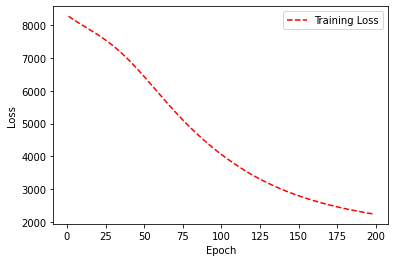

In [12]:
plot_loss("loss.png", history["losses"][:-2])

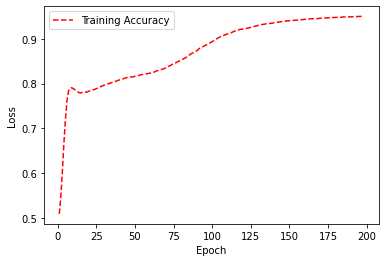

In [13]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')

# 3.4.1 (b) stochastic without momentum 

In [14]:
weights, biases = initialize(X_train_flattened)
epochs = 200

history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": []
}

history = batch_training_without_momentum(1,weights,biases,history,X_train_flattened,y_train)

epoch : 0  batch: 0
epoch : 0  batch: 1000
epoch : 0  batch: 2000
epoch : 0  batch: 3000
epoch : 0  batch: 4000
epoch : 0  batch: 5000
epoch : 0  batch: 6000
epoch : 0  batch: 7000
epoch : 0  batch: 8000
epoch : 0  batch: 9000
epoch : 0  batch: 10000
epoch : 0  batch: 11000
loss after epoch:  0 :  10852.87901100449
epoch : 1  batch: 0
epoch : 1  batch: 1000
epoch : 1  batch: 2000
epoch : 1  batch: 3000
epoch : 1  batch: 4000
epoch : 1  batch: 5000
epoch : 1  batch: 6000
epoch : 1  batch: 7000
epoch : 1  batch: 8000
epoch : 1  batch: 9000
epoch : 1  batch: 10000
epoch : 1  batch: 11000
loss after epoch:  1 :  21438.2783257501
epoch : 2  batch: 0
epoch : 2  batch: 1000
epoch : 2  batch: 2000
epoch : 2  batch: 3000
epoch : 2  batch: 4000
epoch : 2  batch: 5000
epoch : 2  batch: 6000
epoch : 2  batch: 7000
epoch : 2  batch: 8000
epoch : 2  batch: 9000
epoch : 2  batch: 10000
epoch : 2  batch: 11000
loss after epoch:  2 :  6899.718607042584
epoch : 3  batch: 0
epoch : 3  batch: 1000
epoch :

/Users/sarthak/intro-dl/src/helpers.py:137: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


epoch : 4  batch: 4000
epoch : 4  batch: 5000
epoch : 4  batch: 6000
epoch : 4  batch: 7000
epoch : 4  batch: 8000
epoch : 4  batch: 9000
epoch : 4  batch: 10000
epoch : 4  batch: 11000
loss after epoch:  4 :  12713.31491482382
epoch : 5  batch: 0
epoch : 5  batch: 1000
epoch : 5  batch: 2000
epoch : 5  batch: 3000
epoch : 5  batch: 4000
epoch : 5  batch: 5000
epoch : 5  batch: 6000
epoch : 5  batch: 7000
epoch : 5  batch: 8000
epoch : 5  batch: 9000
epoch : 5  batch: 10000
epoch : 5  batch: 11000
loss after epoch:  5 :  14184.924885838314
epoch : 6  batch: 0
epoch : 6  batch: 1000
epoch : 6  batch: 2000
epoch : 6  batch: 3000
epoch : 6  batch: 4000
epoch : 6  batch: 5000
epoch : 6  batch: 6000
epoch : 6  batch: 7000
epoch : 6  batch: 8000
epoch : 6  batch: 9000
epoch : 6  batch: 10000
epoch : 6  batch: 11000
loss after epoch:  6 :  8675.334844275094
epoch : 7  batch: 0
epoch : 7  batch: 1000
epoch : 7  batch: 2000
epoch : 7  batch: 3000
epoch : 7  batch: 4000
epoch : 7  batch: 5000
ep

epoch : 29  batch: 6000
epoch : 29  batch: 7000
epoch : 29  batch: 8000
epoch : 29  batch: 9000
epoch : 29  batch: 10000
epoch : 29  batch: 11000
loss after epoch:  29 :  7136.174689551746
epoch : 30  batch: 0
epoch : 30  batch: 1000
epoch : 30  batch: 2000
epoch : 30  batch: 3000
epoch : 30  batch: 4000
epoch : 30  batch: 5000
epoch : 30  batch: 6000
epoch : 30  batch: 7000
epoch : 30  batch: 8000
epoch : 30  batch: 9000
epoch : 30  batch: 10000
epoch : 30  batch: 11000
loss after epoch:  30 :  7975.721134412976
epoch : 31  batch: 0
epoch : 31  batch: 1000
epoch : 31  batch: 2000
epoch : 31  batch: 3000
epoch : 31  batch: 4000
epoch : 31  batch: 5000
epoch : 31  batch: 6000
epoch : 31  batch: 7000
epoch : 31  batch: 8000
epoch : 31  batch: 9000
epoch : 31  batch: 10000
epoch : 31  batch: 11000
loss after epoch:  31 :  46042.20728036162
epoch : 32  batch: 0
epoch : 32  batch: 1000
epoch : 32  batch: 2000
epoch : 32  batch: 3000
epoch : 32  batch: 4000
epoch : 32  batch: 5000
epoch : 32

epoch : 54  batch: 4000
epoch : 54  batch: 5000
epoch : 54  batch: 6000
epoch : 54  batch: 7000
epoch : 54  batch: 8000
epoch : 54  batch: 9000
epoch : 54  batch: 10000
epoch : 54  batch: 11000
loss after epoch:  54 :  7980.747328177039
epoch : 55  batch: 0
epoch : 55  batch: 1000
epoch : 55  batch: 2000
epoch : 55  batch: 3000
epoch : 55  batch: 4000
epoch : 55  batch: 5000
epoch : 55  batch: 6000
epoch : 55  batch: 7000
epoch : 55  batch: 8000
epoch : 55  batch: 9000
epoch : 55  batch: 10000
epoch : 55  batch: 11000
loss after epoch:  55 :  10379.945406620021
epoch : 56  batch: 0
epoch : 56  batch: 1000
epoch : 56  batch: 2000
epoch : 56  batch: 3000
epoch : 56  batch: 4000
epoch : 56  batch: 5000
epoch : 56  batch: 6000
epoch : 56  batch: 7000
epoch : 56  batch: 8000
epoch : 56  batch: 9000
epoch : 56  batch: 10000
epoch : 56  batch: 11000
loss after epoch:  56 :  9195.179258635637
epoch : 57  batch: 0
epoch : 57  batch: 1000
epoch : 57  batch: 2000
epoch : 57  batch: 3000
epoch : 5

epoch : 79  batch: 2000
epoch : 79  batch: 3000
epoch : 79  batch: 4000
epoch : 79  batch: 5000
epoch : 79  batch: 6000
epoch : 79  batch: 7000
epoch : 79  batch: 8000
epoch : 79  batch: 9000
epoch : 79  batch: 10000
epoch : 79  batch: 11000
loss after epoch:  79 :  8031.406769021016
epoch : 80  batch: 0
epoch : 80  batch: 1000
epoch : 80  batch: 2000
epoch : 80  batch: 3000
epoch : 80  batch: 4000
epoch : 80  batch: 5000
epoch : 80  batch: 6000
epoch : 80  batch: 7000
epoch : 80  batch: 8000
epoch : 80  batch: 9000
epoch : 80  batch: 10000
epoch : 80  batch: 11000
loss after epoch:  80 :  8510.353356511261
epoch : 81  batch: 0
epoch : 81  batch: 1000
epoch : 81  batch: 2000
epoch : 81  batch: 3000
epoch : 81  batch: 4000
epoch : 81  batch: 5000
epoch : 81  batch: 6000
epoch : 81  batch: 7000
epoch : 81  batch: 8000
epoch : 81  batch: 9000
epoch : 81  batch: 10000
epoch : 81  batch: 11000
loss after epoch:  81 :  7526.552311413585
epoch : 82  batch: 0
epoch : 82  batch: 1000
epoch : 82

loss after epoch:  103 :  6963.045563515421
epoch : 104  batch: 0
epoch : 104  batch: 1000
epoch : 104  batch: 2000
epoch : 104  batch: 3000
epoch : 104  batch: 4000
epoch : 104  batch: 5000
epoch : 104  batch: 6000
epoch : 104  batch: 7000
epoch : 104  batch: 8000
epoch : 104  batch: 9000
epoch : 104  batch: 10000
epoch : 104  batch: 11000
loss after epoch:  104 :  6979.134269696635
epoch : 105  batch: 0
epoch : 105  batch: 1000
epoch : 105  batch: 2000
epoch : 105  batch: 3000
epoch : 105  batch: 4000
epoch : 105  batch: 5000
epoch : 105  batch: 6000
epoch : 105  batch: 7000
epoch : 105  batch: 8000
epoch : 105  batch: 9000
epoch : 105  batch: 10000
epoch : 105  batch: 11000
loss after epoch:  105 :  6946.909702857431
epoch : 106  batch: 0
epoch : 106  batch: 1000
epoch : 106  batch: 2000
epoch : 106  batch: 3000
epoch : 106  batch: 4000
epoch : 106  batch: 5000
epoch : 106  batch: 6000
epoch : 106  batch: 7000
epoch : 106  batch: 8000
epoch : 106  batch: 9000
epoch : 106  batch: 100

loss after epoch:  127 :  6834.07140265664
epoch : 128  batch: 0
epoch : 128  batch: 1000
epoch : 128  batch: 2000
epoch : 128  batch: 3000
epoch : 128  batch: 4000
epoch : 128  batch: 5000
epoch : 128  batch: 6000
epoch : 128  batch: 7000
epoch : 128  batch: 8000
epoch : 128  batch: 9000
epoch : 128  batch: 10000
epoch : 128  batch: 11000
loss after epoch:  128 :  6867.498376296966
epoch : 129  batch: 0
epoch : 129  batch: 1000
epoch : 129  batch: 2000
epoch : 129  batch: 3000
epoch : 129  batch: 4000
epoch : 129  batch: 5000
epoch : 129  batch: 6000
epoch : 129  batch: 7000
epoch : 129  batch: 8000
epoch : 129  batch: 9000
epoch : 129  batch: 10000
epoch : 129  batch: 11000
loss after epoch:  129 :  6898.543781425185
epoch : 130  batch: 0
epoch : 130  batch: 1000
epoch : 130  batch: 2000
epoch : 130  batch: 3000
epoch : 130  batch: 4000
epoch : 130  batch: 5000
epoch : 130  batch: 6000
epoch : 130  batch: 7000
epoch : 130  batch: 8000
epoch : 130  batch: 9000
epoch : 130  batch: 1000

loss after epoch:  151 :  7043.606643168841
epoch : 152  batch: 0
epoch : 152  batch: 1000
epoch : 152  batch: 2000
epoch : 152  batch: 3000
epoch : 152  batch: 4000
epoch : 152  batch: 5000
epoch : 152  batch: 6000
epoch : 152  batch: 7000
epoch : 152  batch: 8000
epoch : 152  batch: 9000
epoch : 152  batch: 10000
epoch : 152  batch: 11000
loss after epoch:  152 :  7138.1136452928495
epoch : 153  batch: 0
epoch : 153  batch: 1000
epoch : 153  batch: 2000
epoch : 153  batch: 3000
epoch : 153  batch: 4000
epoch : 153  batch: 5000
epoch : 153  batch: 6000
epoch : 153  batch: 7000
epoch : 153  batch: 8000
epoch : 153  batch: 9000
epoch : 153  batch: 10000
epoch : 153  batch: 11000
loss after epoch:  153 :  7140.315217674595
epoch : 154  batch: 0
epoch : 154  batch: 1000
epoch : 154  batch: 2000
epoch : 154  batch: 3000
epoch : 154  batch: 4000
epoch : 154  batch: 5000
epoch : 154  batch: 6000
epoch : 154  batch: 7000
epoch : 154  batch: 8000
epoch : 154  batch: 9000
epoch : 154  batch: 10

loss after epoch:  175 :  7337.286328643371
epoch : 176  batch: 0
epoch : 176  batch: 1000
epoch : 176  batch: 2000
epoch : 176  batch: 3000
epoch : 176  batch: 4000
epoch : 176  batch: 5000
epoch : 176  batch: 6000
epoch : 176  batch: 7000
epoch : 176  batch: 8000
epoch : 176  batch: 9000
epoch : 176  batch: 10000
epoch : 176  batch: 11000
loss after epoch:  176 :  7208.619374948967
epoch : 177  batch: 0
epoch : 177  batch: 1000
epoch : 177  batch: 2000
epoch : 177  batch: 3000
epoch : 177  batch: 4000
epoch : 177  batch: 5000
epoch : 177  batch: 6000
epoch : 177  batch: 7000
epoch : 177  batch: 8000
epoch : 177  batch: 9000
epoch : 177  batch: 10000
epoch : 177  batch: 11000
loss after epoch:  177 :  7365.968558188006
epoch : 178  batch: 0
epoch : 178  batch: 1000
epoch : 178  batch: 2000
epoch : 178  batch: 3000
epoch : 178  batch: 4000
epoch : 178  batch: 5000
epoch : 178  batch: 6000
epoch : 178  batch: 7000
epoch : 178  batch: 8000
epoch : 178  batch: 9000
epoch : 178  batch: 100

loss after epoch:  199 :  7333.732366686096


In [15]:
best_epoch = np.array(history["losses"][:-1]).argmin()
print(f"best accuracy: {history['accuracies'][best_epoch]}")
print(f"best loss: {history['losses'][best_epoch]}")
print(f"best epoch: {best_epoch}")

best accuracy: 0.96825
best loss: 6141.352900597695
best epoch: 70


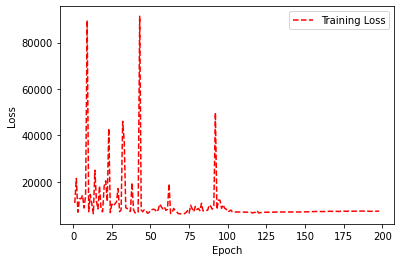

In [16]:
plot_loss("loss.png", history["losses"][:-2])

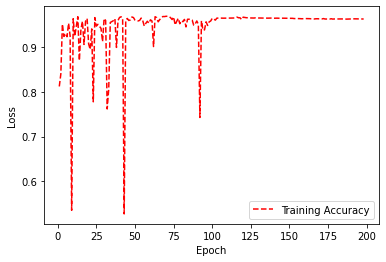

In [17]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')

# 3.4.1 (c) minibatch without momentum


In [18]:
weights, biases = initialize(X_train_flattened)
epochs = 200

history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": []
}

history = batch_training_without_momentum(100,weights,biases,history,X_train_flattened,y_train)

epoch : 0  batch: 0
epoch : 0  batch: 1000
epoch : 0  batch: 2000
epoch : 0  batch: 3000
epoch : 0  batch: 4000
epoch : 0  batch: 5000
epoch : 0  batch: 6000
epoch : 0  batch: 7000
epoch : 0  batch: 8000
epoch : 0  batch: 9000
epoch : 0  batch: 10000
epoch : 0  batch: 11000
loss after epoch:  0 :  3032.153306913795
epoch : 1  batch: 0
epoch : 1  batch: 1000
epoch : 1  batch: 2000
epoch : 1  batch: 3000
epoch : 1  batch: 4000
epoch : 1  batch: 5000
epoch : 1  batch: 6000
epoch : 1  batch: 7000
epoch : 1  batch: 8000
epoch : 1  batch: 9000
epoch : 1  batch: 10000
epoch : 1  batch: 11000
loss after epoch:  1 :  1877.1495011519603
epoch : 2  batch: 0
epoch : 2  batch: 1000
epoch : 2  batch: 2000
epoch : 2  batch: 3000
epoch : 2  batch: 4000
epoch : 2  batch: 5000
epoch : 2  batch: 6000
epoch : 2  batch: 7000
epoch : 2  batch: 8000
epoch : 2  batch: 9000
epoch : 2  batch: 10000
epoch : 2  batch: 11000
loss after epoch:  2 :  1636.458601042194
epoch : 3  batch: 0
epoch : 3  batch: 1000
epoch

epoch : 27  batch: 7000
epoch : 27  batch: 8000
epoch : 27  batch: 9000
epoch : 27  batch: 10000
epoch : 27  batch: 11000
loss after epoch:  27 :  1116.449228527823
epoch : 28  batch: 0
epoch : 28  batch: 1000
epoch : 28  batch: 2000
epoch : 28  batch: 3000
epoch : 28  batch: 4000
epoch : 28  batch: 5000
epoch : 28  batch: 6000
epoch : 28  batch: 7000
epoch : 28  batch: 8000
epoch : 28  batch: 9000
epoch : 28  batch: 10000
epoch : 28  batch: 11000
loss after epoch:  28 :  1110.8129634574852
epoch : 29  batch: 0
epoch : 29  batch: 1000
epoch : 29  batch: 2000
epoch : 29  batch: 3000
epoch : 29  batch: 4000
epoch : 29  batch: 5000
epoch : 29  batch: 6000
epoch : 29  batch: 7000
epoch : 29  batch: 8000
epoch : 29  batch: 9000
epoch : 29  batch: 10000
epoch : 29  batch: 11000
loss after epoch:  29 :  1105.3975261765838
epoch : 30  batch: 0
epoch : 30  batch: 1000
epoch : 30  batch: 2000
epoch : 30  batch: 3000
epoch : 30  batch: 4000
epoch : 30  batch: 5000
epoch : 30  batch: 6000
epoch : 

epoch : 53  batch: 11000
loss after epoch:  53 :  1021.4360423804147
epoch : 54  batch: 0
epoch : 54  batch: 1000
epoch : 54  batch: 2000
epoch : 54  batch: 3000
epoch : 54  batch: 4000
epoch : 54  batch: 5000
epoch : 54  batch: 6000
epoch : 54  batch: 7000
epoch : 54  batch: 8000
epoch : 54  batch: 9000
epoch : 54  batch: 10000
epoch : 54  batch: 11000
loss after epoch:  54 :  1019.2623818527829
epoch : 55  batch: 0
epoch : 55  batch: 1000
epoch : 55  batch: 2000
epoch : 55  batch: 3000
epoch : 55  batch: 4000
epoch : 55  batch: 5000
epoch : 55  batch: 6000
epoch : 55  batch: 7000
epoch : 55  batch: 8000
epoch : 55  batch: 9000
epoch : 55  batch: 10000
epoch : 55  batch: 11000
loss after epoch:  55 :  1017.1615803614067
epoch : 56  batch: 0
epoch : 56  batch: 1000
epoch : 56  batch: 2000
epoch : 56  batch: 3000
epoch : 56  batch: 4000
epoch : 56  batch: 5000
epoch : 56  batch: 6000
epoch : 56  batch: 7000
epoch : 56  batch: 8000
epoch : 56  batch: 9000
epoch : 56  batch: 10000
epoch :

epoch : 79  batch: 9000
epoch : 79  batch: 10000
epoch : 79  batch: 11000
loss after epoch:  79 :  982.3362426897265
epoch : 80  batch: 0
epoch : 80  batch: 1000
epoch : 80  batch: 2000
epoch : 80  batch: 3000
epoch : 80  batch: 4000
epoch : 80  batch: 5000
epoch : 80  batch: 6000
epoch : 80  batch: 7000
epoch : 80  batch: 8000
epoch : 80  batch: 9000
epoch : 80  batch: 10000
epoch : 80  batch: 11000
loss after epoch:  80 :  981.3000902014211
epoch : 81  batch: 0
epoch : 81  batch: 1000
epoch : 81  batch: 2000
epoch : 81  batch: 3000
epoch : 81  batch: 4000
epoch : 81  batch: 5000
epoch : 81  batch: 6000
epoch : 81  batch: 7000
epoch : 81  batch: 8000
epoch : 81  batch: 9000
epoch : 81  batch: 10000
epoch : 81  batch: 11000
loss after epoch:  81 :  980.2799450374131
epoch : 82  batch: 0
epoch : 82  batch: 1000
epoch : 82  batch: 2000
epoch : 82  batch: 3000
epoch : 82  batch: 4000
epoch : 82  batch: 5000
epoch : 82  batch: 6000
epoch : 82  batch: 7000
epoch : 82  batch: 8000
epoch : 82

epoch : 105  batch: 5000
epoch : 105  batch: 6000
epoch : 105  batch: 7000
epoch : 105  batch: 8000
epoch : 105  batch: 9000
epoch : 105  batch: 10000
epoch : 105  batch: 11000
loss after epoch:  105 :  955.8527883448681
epoch : 106  batch: 0
epoch : 106  batch: 1000
epoch : 106  batch: 2000
epoch : 106  batch: 3000
epoch : 106  batch: 4000
epoch : 106  batch: 5000
epoch : 106  batch: 6000
epoch : 106  batch: 7000
epoch : 106  batch: 8000
epoch : 106  batch: 9000
epoch : 106  batch: 10000
epoch : 106  batch: 11000
loss after epoch:  106 :  954.6697062610286
epoch : 107  batch: 0
epoch : 107  batch: 1000
epoch : 107  batch: 2000
epoch : 107  batch: 3000
epoch : 107  batch: 4000
epoch : 107  batch: 5000
epoch : 107  batch: 6000
epoch : 107  batch: 7000
epoch : 107  batch: 8000
epoch : 107  batch: 9000
epoch : 107  batch: 10000
epoch : 107  batch: 11000
loss after epoch:  107 :  953.4645849865607
epoch : 108  batch: 0
epoch : 108  batch: 1000
epoch : 108  batch: 2000
epoch : 108  batch: 3

loss after epoch:  129 :  921.6293271297802
epoch : 130  batch: 0
epoch : 130  batch: 1000
epoch : 130  batch: 2000
epoch : 130  batch: 3000
epoch : 130  batch: 4000
epoch : 130  batch: 5000
epoch : 130  batch: 6000
epoch : 130  batch: 7000
epoch : 130  batch: 8000
epoch : 130  batch: 9000
epoch : 130  batch: 10000
epoch : 130  batch: 11000
loss after epoch:  130 :  919.988974668853
epoch : 131  batch: 0
epoch : 131  batch: 1000
epoch : 131  batch: 2000
epoch : 131  batch: 3000
epoch : 131  batch: 4000
epoch : 131  batch: 5000
epoch : 131  batch: 6000
epoch : 131  batch: 7000
epoch : 131  batch: 8000
epoch : 131  batch: 9000
epoch : 131  batch: 10000
epoch : 131  batch: 11000
loss after epoch:  131 :  918.3387095884159
epoch : 132  batch: 0
epoch : 132  batch: 1000
epoch : 132  batch: 2000
epoch : 132  batch: 3000
epoch : 132  batch: 4000
epoch : 132  batch: 5000
epoch : 132  batch: 6000
epoch : 132  batch: 7000
epoch : 132  batch: 8000
epoch : 132  batch: 9000
epoch : 132  batch: 1000

epoch : 154  batch: 8000
epoch : 154  batch: 9000
epoch : 154  batch: 10000
epoch : 154  batch: 11000
loss after epoch:  154 :  881.2313253704086
epoch : 155  batch: 0
epoch : 155  batch: 1000
epoch : 155  batch: 2000
epoch : 155  batch: 3000
epoch : 155  batch: 4000
epoch : 155  batch: 5000
epoch : 155  batch: 6000
epoch : 155  batch: 7000
epoch : 155  batch: 8000
epoch : 155  batch: 9000
epoch : 155  batch: 10000
epoch : 155  batch: 11000
loss after epoch:  155 :  879.8600684783078
epoch : 156  batch: 0
epoch : 156  batch: 1000
epoch : 156  batch: 2000
epoch : 156  batch: 3000
epoch : 156  batch: 4000
epoch : 156  batch: 5000
epoch : 156  batch: 6000
epoch : 156  batch: 7000
epoch : 156  batch: 8000
epoch : 156  batch: 9000
epoch : 156  batch: 10000
epoch : 156  batch: 11000
loss after epoch:  156 :  878.5311019816886
epoch : 157  batch: 0
epoch : 157  batch: 1000
epoch : 157  batch: 2000
epoch : 157  batch: 3000
epoch : 157  batch: 4000
epoch : 157  batch: 5000
epoch : 157  batch: 6

epoch : 179  batch: 10000
epoch : 179  batch: 11000
loss after epoch:  179 :  867.7319270208752
epoch : 180  batch: 0
epoch : 180  batch: 1000
epoch : 180  batch: 2000
epoch : 180  batch: 3000
epoch : 180  batch: 4000
epoch : 180  batch: 5000
epoch : 180  batch: 6000
epoch : 180  batch: 7000
epoch : 180  batch: 8000
epoch : 180  batch: 9000
epoch : 180  batch: 10000
epoch : 180  batch: 11000
loss after epoch:  180 :  868.6001070479559
epoch : 181  batch: 0
epoch : 181  batch: 1000
epoch : 181  batch: 2000
epoch : 181  batch: 3000
epoch : 181  batch: 4000
epoch : 181  batch: 5000
epoch : 181  batch: 6000
epoch : 181  batch: 7000
epoch : 181  batch: 8000
epoch : 181  batch: 9000
epoch : 181  batch: 10000
epoch : 181  batch: 11000
loss after epoch:  181 :  869.6572157584429
epoch : 182  batch: 0
epoch : 182  batch: 1000
epoch : 182  batch: 2000
epoch : 182  batch: 3000
epoch : 182  batch: 4000
epoch : 182  batch: 5000
epoch : 182  batch: 6000
epoch : 182  batch: 7000
epoch : 182  batch: 8

In [19]:
best_epoch = np.array(history["losses"][:-1]).argmin()
print(f"best accuracy: {history['accuracies'][best_epoch]}")
print(f"best loss: {history['losses'][best_epoch]}")
print(f"best epoch: {best_epoch}")

best accuracy: 0.9798333333333333
best loss: 865.6681675648924
best epoch: 173


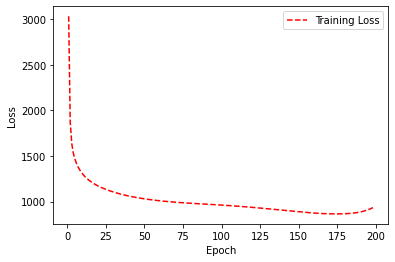

In [20]:
plot_loss("loss.png", history["losses"][:-2])

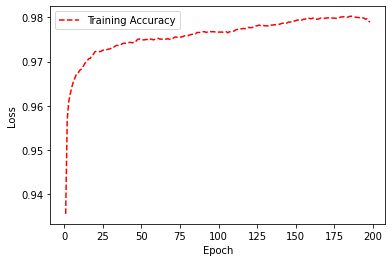

In [21]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')

In [41]:
from helpers import sgd_with_momentum_update

def initialize_velocity(weights,biases):
    W1, W2 = weights
    b1, b2 = biases
    vw1 = np.zeros(W1.shape)
    vw2 = np.zeros(W2.shape)
    vb1 = np.zeros(b1.shape)
    vb2 = np.zeros(b2.shape)
    return vw1,vw2,vb1,vb2

weights, biases = initialize(X_train_flattened)
epochs = 200
velocity = initialize_velocity(weights,biases)
history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": [],
    "velocity":[velocity]
}
momentum = 0.001
def update_parameters_with_momentum(weights,biases,gradients,learning_rate,velocity,momentum):
    W1, W2 = weights
    b1, b2 = biases
    
    db1, dW1, db2, dW2 = gradients
    vw1,vw2,vb1,vb2 = velocity
    W1,vw1 = sgd_with_momentum_update(W1, learning_rate, dW1,vw1,momentum)
    W2,vw2 = sgd_with_momentum_update(W2, learning_rate, dW2,vw2,momentum)
   
    b1,vb1 = sgd_with_momentum_update(b1, learning_rate, db1,vb1,momentum)
    b2,vb2 = sgd_with_momentum_update(b2, learning_rate, db2,vb2,momentum)
    
    weights = (W1, W2)
    biases = (b1, b2)
    velocity = (vw1,vw2,vb1,vb2)
    return weights ,biases,velocity
    

def batch_training_with_momentum(batch_size,weights,biases,history,X,y,momentum,lr):
    offset = 0
    for epoch in range(epochs):
        offset = 0
        weights = history['weights'][epoch]
        biases = history['biases'][epoch]
        velocity = history['velocity'][epoch]
        while offset <max(y_train.shape):
            if offset%1000==0 :
                print("epoch :",epoch," batch:",offset)
            else :
                a=1
            if offset+batch_size >=max(y_train.shape):
                X_batch = X[:,offset:]
                y_batch = y[:,offset:]
            else :    
                X_batch = X[:,offset:offset+batch_size]
                y_batch = y[:,offset:offset+batch_size]
            
            

            activations = forward_pass(X_batch, weights, biases)
            gradients = backpropagation(X_batch, y_batch, weights, biases, activations)

            
            weights, biases,velocity = update_parameters_with_momentum(weights, biases, gradients, lr,velocity,momentum)
            offset = offset+batch_size
        activations_full = forward_pass(X, weights, biases)
        y_prob = activations_full[-1]
        y_pred = np.where(y_prob > 0.5, 1, 0)

        #print(y,y_prob)
        loss = get_log_loss(y, y_prob)
        accuracy = get_accuracy(y, y_pred)

        history["weights"].append(weights)
        history["losses"].append(loss)
        history["biases"].append(biases)
        history["velocity"].append(velocity)
        history["accuracies"].append(accuracy)

        if np.isnan(loss):
            break

        print("loss after epoch: ",epoch,": ",loss)
    return history

# 3.4.1 (d) full batch with momentum

In [45]:
weights, biases = initialize(X_train_flattened)
epochs = 200
velocity = initialize_velocity(weights,biases)
history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": [],
    "velocity":[velocity]
}
history = batch_training_with_momentum(max(y_train.shape),weights,biases,history,X_train_flattened,y_train,momentum,lr)

epoch : 0  batch: 0
loss after epoch:  0 :  8232.732010322628
epoch : 1  batch: 0
loss after epoch:  1 :  8212.216369976986
epoch : 2  batch: 0
loss after epoch:  2 :  8192.051204229218
epoch : 3  batch: 0
loss after epoch:  3 :  8172.128226639132
epoch : 4  batch: 0
loss after epoch:  4 :  8152.349978383339
epoch : 5  batch: 0
loss after epoch:  5 :  8132.627314288696
epoch : 6  batch: 0
loss after epoch:  6 :  8112.877385824151
epoch : 7  batch: 0
loss after epoch:  7 :  8093.0220234915
epoch : 8  batch: 0
loss after epoch:  8 :  8072.986429923085
epoch : 9  batch: 0
loss after epoch:  9 :  8052.698117373099
epoch : 10  batch: 0
loss after epoch:  10 :  8032.086039850937
epoch : 11  batch: 0
loss after epoch:  11 :  8011.07988262269
epoch : 12  batch: 0
loss after epoch:  12 :  7989.609481408093
epoch : 13  batch: 0
loss after epoch:  13 :  7967.604351167255
epoch : 14  batch: 0
loss after epoch:  14 :  7944.99331049681
epoch : 15  batch: 0
loss after epoch:  15 :  7921.7041927565915

loss after epoch:  127 :  2869.4259698217306
epoch : 128  batch: 0
loss after epoch:  128 :  2849.3035935510643
epoch : 129  batch: 0
loss after epoch:  129 :  2829.5693657770353
epoch : 130  batch: 0
loss after epoch:  130 :  2810.2152784094205
epoch : 131  batch: 0
loss after epoch:  131 :  2791.2334300966577
epoch : 132  batch: 0
loss after epoch:  132 :  2772.616030365707
epoch : 133  batch: 0
loss after epoch:  133 :  2754.3554032937272
epoch : 134  batch: 0
loss after epoch:  134 :  2736.4439907252618
epoch : 135  batch: 0
loss after epoch:  135 :  2718.8743550511235
epoch : 136  batch: 0
loss after epoch:  136 :  2701.639181567158
epoch : 137  batch: 0
loss after epoch:  137 :  2684.7312804325416
epoch : 138  batch: 0
loss after epoch:  138 :  2668.143588248361
epoch : 139  batch: 0
loss after epoch:  139 :  2651.8691692779216
epoch : 140  batch: 0
loss after epoch:  140 :  2635.901216330612
epoch : 141  batch: 0
loss after epoch:  141 :  2620.233051331278
epoch : 142  batch: 0


In [46]:
best_epoch = np.array(history["losses"][:-1]).argmin()
print(f"best accuracy: {history['accuracies'][best_epoch]}")
print(f"best loss: {history['losses'][best_epoch]}")
print(f"best epoch: {best_epoch}")

best accuracy: 0.9525833333333333
best loss: 2062.000667220541
best epoch: 198


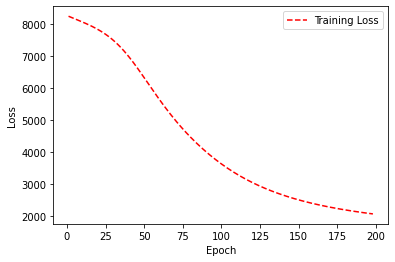

In [47]:
plot_loss("loss.png", history["losses"][:-2])

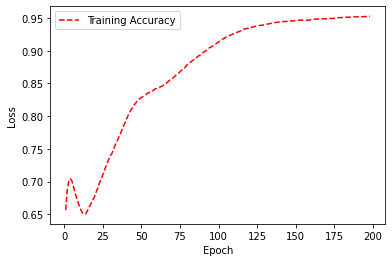

In [48]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')

# 3.4.1 (e) stochastic with momentum

In [53]:
weights, biases = initialize(X_train_flattened)
epochs = 200
velocity = initialize_velocity(weights,biases)
history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": [],
    "velocity":[velocity]
}
history = batch_training_with_momentum(1,weights,biases,history,X_train_flattened,y_train,momentum,lr)

epoch : 0  batch: 0
epoch : 0  batch: 1000
epoch : 0  batch: 2000
epoch : 0  batch: 3000
epoch : 0  batch: 4000
epoch : 0  batch: 5000
epoch : 0  batch: 6000
epoch : 0  batch: 7000
epoch : 0  batch: 8000
epoch : 0  batch: 9000
epoch : 0  batch: 10000
epoch : 0  batch: 11000
loss after epoch:  0 :  6564.766759809836
epoch : 1  batch: 0
epoch : 1  batch: 1000
epoch : 1  batch: 2000
epoch : 1  batch: 3000
epoch : 1  batch: 4000
epoch : 1  batch: 5000
epoch : 1  batch: 6000
epoch : 1  batch: 7000
epoch : 1  batch: 8000
epoch : 1  batch: 9000
epoch : 1  batch: 10000
epoch : 1  batch: 11000
loss after epoch:  1 :  19013.045397241454
epoch : 2  batch: 0
epoch : 2  batch: 1000
epoch : 2  batch: 2000
epoch : 2  batch: 3000
epoch : 2  batch: 4000
epoch : 2  batch: 5000
epoch : 2  batch: 6000
epoch : 2  batch: 7000
epoch : 2  batch: 8000
epoch : 2  batch: 9000
epoch : 2  batch: 10000
epoch : 2  batch: 11000
loss after epoch:  2 :  19932.77814298495
epoch : 3  batch: 0
epoch : 3  batch: 1000
epoch

/Users/sarthak/intro-dl/src/helpers.py:137: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


epoch : 4  batch: 8000
epoch : 4  batch: 9000
epoch : 4  batch: 10000
epoch : 4  batch: 11000
loss after epoch:  4 :  9679.845636887168
epoch : 5  batch: 0
epoch : 5  batch: 1000
epoch : 5  batch: 2000
epoch : 5  batch: 3000
epoch : 5  batch: 4000
epoch : 5  batch: 5000
epoch : 5  batch: 6000
epoch : 5  batch: 7000
epoch : 5  batch: 8000
epoch : 5  batch: 9000
epoch : 5  batch: 10000
epoch : 5  batch: 11000
loss after epoch:  5 :  6090.189888672201
epoch : 6  batch: 0
epoch : 6  batch: 1000
epoch : 6  batch: 2000
epoch : 6  batch: 3000
epoch : 6  batch: 4000
epoch : 6  batch: 5000
epoch : 6  batch: 6000
epoch : 6  batch: 7000
epoch : 6  batch: 8000
epoch : 6  batch: 9000
epoch : 6  batch: 10000
epoch : 6  batch: 11000
loss after epoch:  6 :  13402.283350312253
epoch : 7  batch: 0
epoch : 7  batch: 1000
epoch : 7  batch: 2000
epoch : 7  batch: 3000
epoch : 7  batch: 4000
epoch : 7  batch: 5000
epoch : 7  batch: 6000
epoch : 7  batch: 7000
epoch : 7  batch: 8000
epoch : 7  batch: 9000
ep

epoch : 29  batch: 10000
epoch : 29  batch: 11000
loss after epoch:  29 :  7280.766512172444
epoch : 30  batch: 0
epoch : 30  batch: 1000
epoch : 30  batch: 2000
epoch : 30  batch: 3000
epoch : 30  batch: 4000
epoch : 30  batch: 5000
epoch : 30  batch: 6000
epoch : 30  batch: 7000
epoch : 30  batch: 8000
epoch : 30  batch: 9000
epoch : 30  batch: 10000
epoch : 30  batch: 11000
loss after epoch:  30 :  8520.628045403379
epoch : 31  batch: 0
epoch : 31  batch: 1000
epoch : 31  batch: 2000
epoch : 31  batch: 3000
epoch : 31  batch: 4000
epoch : 31  batch: 5000
epoch : 31  batch: 6000
epoch : 31  batch: 7000
epoch : 31  batch: 8000
epoch : 31  batch: 9000
epoch : 31  batch: 10000
epoch : 31  batch: 11000
loss after epoch:  31 :  9383.626865793718
epoch : 32  batch: 0
epoch : 32  batch: 1000
epoch : 32  batch: 2000
epoch : 32  batch: 3000
epoch : 32  batch: 4000
epoch : 32  batch: 5000
epoch : 32  batch: 6000
epoch : 32  batch: 7000
epoch : 32  batch: 8000
epoch : 32  batch: 9000
epoch : 32

epoch : 54  batch: 7000
epoch : 54  batch: 8000
epoch : 54  batch: 9000
epoch : 54  batch: 10000
epoch : 54  batch: 11000
loss after epoch:  54 :  13701.199212138099
epoch : 55  batch: 0
epoch : 55  batch: 1000
epoch : 55  batch: 2000
epoch : 55  batch: 3000
epoch : 55  batch: 4000
epoch : 55  batch: 5000
epoch : 55  batch: 6000
epoch : 55  batch: 7000
epoch : 55  batch: 8000
epoch : 55  batch: 9000
epoch : 55  batch: 10000
epoch : 55  batch: 11000
loss after epoch:  55 :  14529.351093926869
epoch : 56  batch: 0
epoch : 56  batch: 1000
epoch : 56  batch: 2000
epoch : 56  batch: 3000
epoch : 56  batch: 4000
epoch : 56  batch: 5000
epoch : 56  batch: 6000
epoch : 56  batch: 7000
epoch : 56  batch: 8000
epoch : 56  batch: 9000
epoch : 56  batch: 10000
epoch : 56  batch: 11000
loss after epoch:  56 :  14247.748737026872
epoch : 57  batch: 0
epoch : 57  batch: 1000
epoch : 57  batch: 2000
epoch : 57  batch: 3000
epoch : 57  batch: 4000
epoch : 57  batch: 5000
epoch : 57  batch: 6000
epoch :

epoch : 79  batch: 5000
epoch : 79  batch: 6000
epoch : 79  batch: 7000
epoch : 79  batch: 8000
epoch : 79  batch: 9000
epoch : 79  batch: 10000
epoch : 79  batch: 11000
loss after epoch:  79 :  17567.726196834134
epoch : 80  batch: 0
epoch : 80  batch: 1000
epoch : 80  batch: 2000
epoch : 80  batch: 3000
epoch : 80  batch: 4000
epoch : 80  batch: 5000
epoch : 80  batch: 6000
epoch : 80  batch: 7000
epoch : 80  batch: 8000
epoch : 80  batch: 9000
epoch : 80  batch: 10000
epoch : 80  batch: 11000
loss after epoch:  80 :  17535.91279600382
epoch : 81  batch: 0
epoch : 81  batch: 1000
epoch : 81  batch: 2000
epoch : 81  batch: 3000
epoch : 81  batch: 4000
epoch : 81  batch: 5000
epoch : 81  batch: 6000
epoch : 81  batch: 7000
epoch : 81  batch: 8000
epoch : 81  batch: 9000
epoch : 81  batch: 10000
epoch : 81  batch: 11000
loss after epoch:  81 :  17616.68148425808
epoch : 82  batch: 0
epoch : 82  batch: 1000
epoch : 82  batch: 2000
epoch : 82  batch: 3000
epoch : 82  batch: 4000
epoch : 8

epoch : 104  batch: 2000
epoch : 104  batch: 3000
epoch : 104  batch: 4000
epoch : 104  batch: 5000
epoch : 104  batch: 6000
epoch : 104  batch: 7000
epoch : 104  batch: 8000
epoch : 104  batch: 9000
epoch : 104  batch: 10000
epoch : 104  batch: 11000
loss after epoch:  104 :  17923.302684682687
epoch : 105  batch: 0
epoch : 105  batch: 1000
epoch : 105  batch: 2000
epoch : 105  batch: 3000
epoch : 105  batch: 4000
epoch : 105  batch: 5000
epoch : 105  batch: 6000
epoch : 105  batch: 7000
epoch : 105  batch: 8000
epoch : 105  batch: 9000
epoch : 105  batch: 10000
epoch : 105  batch: 11000
loss after epoch:  105 :  17923.351531487337
epoch : 106  batch: 0
epoch : 106  batch: 1000
epoch : 106  batch: 2000
epoch : 106  batch: 3000
epoch : 106  batch: 4000
epoch : 106  batch: 5000
epoch : 106  batch: 6000
epoch : 106  batch: 7000
epoch : 106  batch: 8000
epoch : 106  batch: 9000
epoch : 106  batch: 10000
epoch : 106  batch: 11000
loss after epoch:  106 :  17917.52513188037
epoch : 107  bat

epoch : 128  batch: 2000
epoch : 128  batch: 3000
epoch : 128  batch: 4000
epoch : 128  batch: 5000
epoch : 128  batch: 6000
epoch : 128  batch: 7000
epoch : 128  batch: 8000
epoch : 128  batch: 9000
epoch : 128  batch: 10000
epoch : 128  batch: 11000
loss after epoch:  128 :  14988.844528211364
epoch : 129  batch: 0
epoch : 129  batch: 1000
epoch : 129  batch: 2000
epoch : 129  batch: 3000
epoch : 129  batch: 4000
epoch : 129  batch: 5000
epoch : 129  batch: 6000
epoch : 129  batch: 7000
epoch : 129  batch: 8000
epoch : 129  batch: 9000
epoch : 129  batch: 10000
epoch : 129  batch: 11000
loss after epoch:  129 :  8873.285324163604
epoch : 130  batch: 0
epoch : 130  batch: 1000
epoch : 130  batch: 2000
epoch : 130  batch: 3000
epoch : 130  batch: 4000
epoch : 130  batch: 5000
epoch : 130  batch: 6000
epoch : 130  batch: 7000
epoch : 130  batch: 8000
epoch : 130  batch: 9000
epoch : 130  batch: 10000
epoch : 130  batch: 11000
loss after epoch:  130 :  8974.767021559479
epoch : 131  batc

epoch : 152  batch: 2000
epoch : 152  batch: 3000
epoch : 152  batch: 4000
epoch : 152  batch: 5000
epoch : 152  batch: 6000
epoch : 152  batch: 7000
epoch : 152  batch: 8000
epoch : 152  batch: 9000
epoch : 152  batch: 10000
epoch : 152  batch: 11000
loss after epoch:  152 :  9393.088540531788
epoch : 153  batch: 0
epoch : 153  batch: 1000
epoch : 153  batch: 2000
epoch : 153  batch: 3000
epoch : 153  batch: 4000
epoch : 153  batch: 5000
epoch : 153  batch: 6000
epoch : 153  batch: 7000
epoch : 153  batch: 8000
epoch : 153  batch: 9000
epoch : 153  batch: 10000
epoch : 153  batch: 11000
loss after epoch:  153 :  9396.8524368266
epoch : 154  batch: 0
epoch : 154  batch: 1000
epoch : 154  batch: 2000
epoch : 154  batch: 3000
epoch : 154  batch: 4000
epoch : 154  batch: 5000
epoch : 154  batch: 6000
epoch : 154  batch: 7000
epoch : 154  batch: 8000
epoch : 154  batch: 9000
epoch : 154  batch: 10000
epoch : 154  batch: 11000
loss after epoch:  154 :  9443.608750774329
epoch : 155  batch: 

epoch : 176  batch: 1000
epoch : 176  batch: 2000
epoch : 176  batch: 3000
epoch : 176  batch: 4000
epoch : 176  batch: 5000
epoch : 176  batch: 6000
epoch : 176  batch: 7000
epoch : 176  batch: 8000
epoch : 176  batch: 9000
epoch : 176  batch: 10000
epoch : 176  batch: 11000
loss after epoch:  176 :  9674.992796812909
epoch : 177  batch: 0
epoch : 177  batch: 1000
epoch : 177  batch: 2000
epoch : 177  batch: 3000
epoch : 177  batch: 4000
epoch : 177  batch: 5000
epoch : 177  batch: 6000
epoch : 177  batch: 7000
epoch : 177  batch: 8000
epoch : 177  batch: 9000
epoch : 177  batch: 10000
epoch : 177  batch: 11000
loss after epoch:  177 :  10088.406771035936
epoch : 178  batch: 0
epoch : 178  batch: 1000
epoch : 178  batch: 2000
epoch : 178  batch: 3000
epoch : 178  batch: 4000
epoch : 178  batch: 5000
epoch : 178  batch: 6000
epoch : 178  batch: 7000
epoch : 178  batch: 8000
epoch : 178  batch: 9000
epoch : 178  batch: 10000
epoch : 178  batch: 11000
loss after epoch:  178 :  10086.2566

In [54]:
best_epoch = np.array(history["losses"][:-1]).argmin()
print(f"best accuracy: {history['accuracies'][best_epoch]}")
print(f"best loss: {history['losses'][best_epoch]}")
print(f"best epoch: {best_epoch}")

best accuracy: 0.9655833333333333
best loss: 6090.189888672201
best epoch: 5


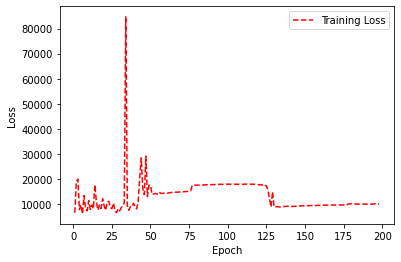

In [55]:
plot_loss("loss.png", history["losses"][:-2])

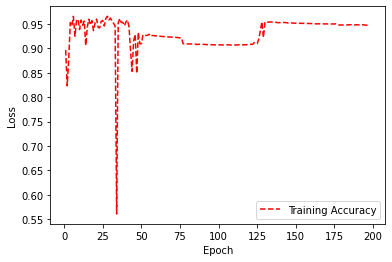

In [56]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')

# 3.4.1 (f) minibatch with momentum 

In [49]:
weights, biases = initialize(X_train_flattened)
epochs = 200
velocity = initialize_velocity(weights,biases)
history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": [],
    "velocity":[velocity]
}
history = batch_training_with_momentum(100,weights,biases,history,X_train_flattened,y_train,momentum,lr)

epoch : 0  batch: 0
epoch : 0  batch: 1000
epoch : 0  batch: 2000
epoch : 0  batch: 3000
epoch : 0  batch: 4000
epoch : 0  batch: 5000
epoch : 0  batch: 6000
epoch : 0  batch: 7000
epoch : 0  batch: 8000
epoch : 0  batch: 9000
epoch : 0  batch: 10000
epoch : 0  batch: 11000
loss after epoch:  0 :  3122.7403938485463
epoch : 1  batch: 0
epoch : 1  batch: 1000
epoch : 1  batch: 2000
epoch : 1  batch: 3000
epoch : 1  batch: 4000
epoch : 1  batch: 5000
epoch : 1  batch: 6000
epoch : 1  batch: 7000
epoch : 1  batch: 8000
epoch : 1  batch: 9000
epoch : 1  batch: 10000
epoch : 1  batch: 11000
loss after epoch:  1 :  1926.5870208084314
epoch : 2  batch: 0
epoch : 2  batch: 1000
epoch : 2  batch: 2000
epoch : 2  batch: 3000
epoch : 2  batch: 4000
epoch : 2  batch: 5000
epoch : 2  batch: 6000
epoch : 2  batch: 7000
epoch : 2  batch: 8000
epoch : 2  batch: 9000
epoch : 2  batch: 10000
epoch : 2  batch: 11000
loss after epoch:  2 :  1663.776553470095
epoch : 3  batch: 0
epoch : 3  batch: 1000
epoc

epoch : 25  batch: 9000
epoch : 25  batch: 10000
epoch : 25  batch: 11000
loss after epoch:  25 :  1141.1834086183883
epoch : 26  batch: 0
epoch : 26  batch: 1000
epoch : 26  batch: 2000
epoch : 26  batch: 3000
epoch : 26  batch: 4000
epoch : 26  batch: 5000
epoch : 26  batch: 6000
epoch : 26  batch: 7000
epoch : 26  batch: 8000
epoch : 26  batch: 9000
epoch : 26  batch: 10000
epoch : 26  batch: 11000
loss after epoch:  26 :  1135.3593235302055
epoch : 27  batch: 0
epoch : 27  batch: 1000
epoch : 27  batch: 2000
epoch : 27  batch: 3000
epoch : 27  batch: 4000
epoch : 27  batch: 5000
epoch : 27  batch: 6000
epoch : 27  batch: 7000
epoch : 27  batch: 8000
epoch : 27  batch: 9000
epoch : 27  batch: 10000
epoch : 27  batch: 11000
loss after epoch:  27 :  1129.7428759097584
epoch : 28  batch: 0
epoch : 28  batch: 1000
epoch : 28  batch: 2000
epoch : 28  batch: 3000
epoch : 28  batch: 4000
epoch : 28  batch: 5000
epoch : 28  batch: 6000
epoch : 28  batch: 7000
epoch : 28  batch: 8000
epoch :

epoch : 50  batch: 7000
epoch : 50  batch: 8000
epoch : 50  batch: 9000
epoch : 50  batch: 10000
epoch : 50  batch: 11000
loss after epoch:  50 :  1038.4910573459945
epoch : 51  batch: 0
epoch : 51  batch: 1000
epoch : 51  batch: 2000
epoch : 51  batch: 3000
epoch : 51  batch: 4000
epoch : 51  batch: 5000
epoch : 51  batch: 6000
epoch : 51  batch: 7000
epoch : 51  batch: 8000
epoch : 51  batch: 9000
epoch : 51  batch: 10000
epoch : 51  batch: 11000
loss after epoch:  51 :  1035.8588915163195
epoch : 52  batch: 0
epoch : 52  batch: 1000
epoch : 52  batch: 2000
epoch : 52  batch: 3000
epoch : 52  batch: 4000
epoch : 52  batch: 5000
epoch : 52  batch: 6000
epoch : 52  batch: 7000
epoch : 52  batch: 8000
epoch : 52  batch: 9000
epoch : 52  batch: 10000
epoch : 52  batch: 11000
loss after epoch:  52 :  1033.3193828895276
epoch : 53  batch: 0
epoch : 53  batch: 1000
epoch : 53  batch: 2000
epoch : 53  batch: 3000
epoch : 53  batch: 4000
epoch : 53  batch: 5000
epoch : 53  batch: 6000
epoch :

epoch : 75  batch: 7000
epoch : 75  batch: 8000
epoch : 75  batch: 9000
epoch : 75  batch: 10000
epoch : 75  batch: 11000
loss after epoch:  75 :  994.1636160320454
epoch : 76  batch: 0
epoch : 76  batch: 1000
epoch : 76  batch: 2000
epoch : 76  batch: 3000
epoch : 76  batch: 4000
epoch : 76  batch: 5000
epoch : 76  batch: 6000
epoch : 76  batch: 7000
epoch : 76  batch: 8000
epoch : 76  batch: 9000
epoch : 76  batch: 10000
epoch : 76  batch: 11000
loss after epoch:  76 :  993.0448522568616
epoch : 77  batch: 0
epoch : 77  batch: 1000
epoch : 77  batch: 2000
epoch : 77  batch: 3000
epoch : 77  batch: 4000
epoch : 77  batch: 5000
epoch : 77  batch: 6000
epoch : 77  batch: 7000
epoch : 77  batch: 8000
epoch : 77  batch: 9000
epoch : 77  batch: 10000
epoch : 77  batch: 11000
loss after epoch:  77 :  991.9570609950496
epoch : 78  batch: 0
epoch : 78  batch: 1000
epoch : 78  batch: 2000
epoch : 78  batch: 3000
epoch : 78  batch: 4000
epoch : 78  batch: 5000
epoch : 78  batch: 6000
epoch : 78

epoch : 100  batch: 5000
epoch : 100  batch: 6000
epoch : 100  batch: 7000
epoch : 100  batch: 8000
epoch : 100  batch: 9000
epoch : 100  batch: 10000
epoch : 100  batch: 11000
loss after epoch:  100 :  971.4939056292965
epoch : 101  batch: 0
epoch : 101  batch: 1000
epoch : 101  batch: 2000
epoch : 101  batch: 3000
epoch : 101  batch: 4000
epoch : 101  batch: 5000
epoch : 101  batch: 6000
epoch : 101  batch: 7000
epoch : 101  batch: 8000
epoch : 101  batch: 9000
epoch : 101  batch: 10000
epoch : 101  batch: 11000
loss after epoch:  101 :  970.6389233153257
epoch : 102  batch: 0
epoch : 102  batch: 1000
epoch : 102  batch: 2000
epoch : 102  batch: 3000
epoch : 102  batch: 4000
epoch : 102  batch: 5000
epoch : 102  batch: 6000
epoch : 102  batch: 7000
epoch : 102  batch: 8000
epoch : 102  batch: 9000
epoch : 102  batch: 10000
epoch : 102  batch: 11000
loss after epoch:  102 :  969.7750705972064
epoch : 103  batch: 0
epoch : 103  batch: 1000
epoch : 103  batch: 2000
epoch : 103  batch: 3

epoch : 125  batch: 7000
epoch : 125  batch: 8000
epoch : 125  batch: 9000
epoch : 125  batch: 10000
epoch : 125  batch: 11000
loss after epoch:  125 :  945.2223012764632
epoch : 126  batch: 0
epoch : 126  batch: 1000
epoch : 126  batch: 2000
epoch : 126  batch: 3000
epoch : 126  batch: 4000
epoch : 126  batch: 5000
epoch : 126  batch: 6000
epoch : 126  batch: 7000
epoch : 126  batch: 8000
epoch : 126  batch: 9000
epoch : 126  batch: 10000
epoch : 126  batch: 11000
loss after epoch:  126 :  943.8869917748387
epoch : 127  batch: 0
epoch : 127  batch: 1000
epoch : 127  batch: 2000
epoch : 127  batch: 3000
epoch : 127  batch: 4000
epoch : 127  batch: 5000
epoch : 127  batch: 6000
epoch : 127  batch: 7000
epoch : 127  batch: 8000
epoch : 127  batch: 9000
epoch : 127  batch: 10000
epoch : 127  batch: 11000
loss after epoch:  127 :  942.5279340803079
epoch : 128  batch: 0
epoch : 128  batch: 1000
epoch : 128  batch: 2000
epoch : 128  batch: 3000
epoch : 128  batch: 4000
epoch : 128  batch: 5

epoch : 150  batch: 4000
epoch : 150  batch: 5000
epoch : 150  batch: 6000
epoch : 150  batch: 7000
epoch : 150  batch: 8000
epoch : 150  batch: 9000
epoch : 150  batch: 10000
epoch : 150  batch: 11000
loss after epoch:  150 :  909.1121895065394
epoch : 151  batch: 0
epoch : 151  batch: 1000
epoch : 151  batch: 2000
epoch : 151  batch: 3000
epoch : 151  batch: 4000
epoch : 151  batch: 5000
epoch : 151  batch: 6000
epoch : 151  batch: 7000
epoch : 151  batch: 8000
epoch : 151  batch: 9000
epoch : 151  batch: 10000
epoch : 151  batch: 11000
loss after epoch:  151 :  907.9116833561238
epoch : 152  batch: 0
epoch : 152  batch: 1000
epoch : 152  batch: 2000
epoch : 152  batch: 3000
epoch : 152  batch: 4000
epoch : 152  batch: 5000
epoch : 152  batch: 6000
epoch : 152  batch: 7000
epoch : 152  batch: 8000
epoch : 152  batch: 9000
epoch : 152  batch: 10000
epoch : 152  batch: 11000
loss after epoch:  152 :  906.7594015135468
epoch : 153  batch: 0
epoch : 153  batch: 1000
epoch : 153  batch: 2

epoch : 174  batch: 8000
epoch : 174  batch: 9000
epoch : 174  batch: 10000
epoch : 174  batch: 11000
loss after epoch:  174 :  891.4996976095503
epoch : 175  batch: 0
epoch : 175  batch: 1000
epoch : 175  batch: 2000
epoch : 175  batch: 3000
epoch : 175  batch: 4000
epoch : 175  batch: 5000
epoch : 175  batch: 6000
epoch : 175  batch: 7000
epoch : 175  batch: 8000
epoch : 175  batch: 9000
epoch : 175  batch: 10000
epoch : 175  batch: 11000
loss after epoch:  175 :  891.4552898515808
epoch : 176  batch: 0
epoch : 176  batch: 1000
epoch : 176  batch: 2000
epoch : 176  batch: 3000
epoch : 176  batch: 4000
epoch : 176  batch: 5000
epoch : 176  batch: 6000
epoch : 176  batch: 7000
epoch : 176  batch: 8000
epoch : 176  batch: 9000
epoch : 176  batch: 10000
epoch : 176  batch: 11000
loss after epoch:  176 :  891.4971050847154
epoch : 177  batch: 0
epoch : 177  batch: 1000
epoch : 177  batch: 2000
epoch : 177  batch: 3000
epoch : 177  batch: 4000
epoch : 177  batch: 5000
epoch : 177  batch: 6

epoch : 199  batch: 3000
epoch : 199  batch: 4000
epoch : 199  batch: 5000
epoch : 199  batch: 6000
epoch : 199  batch: 7000
epoch : 199  batch: 8000
epoch : 199  batch: 9000
epoch : 199  batch: 10000
epoch : 199  batch: 11000
loss after epoch:  199 :  948.3865491979168


In [50]:
best_epoch = np.array(history["losses"][:-1]).argmin()
print(f"best accuracy: {history['accuracies'][best_epoch]}")
print(f"best loss: {history['losses'][best_epoch]}")
print(f"best epoch: {best_epoch}")

best accuracy: 0.9795833333333334
best loss: 891.4552898515808
best epoch: 175


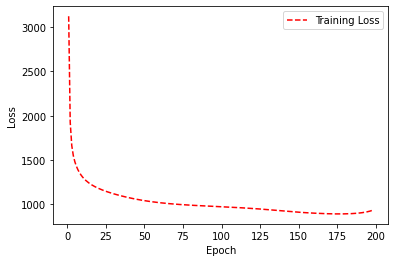

In [51]:
plot_loss("loss.png", history["losses"][:-2])

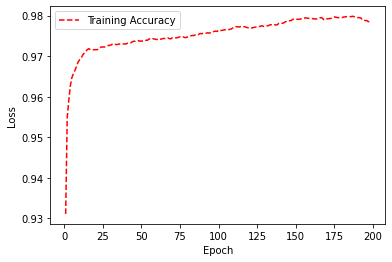

In [52]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')

# 3.4.2 Hyperparameter tuning using gridsearch

In [61]:
momentum = np.arange(0.001,0.01,0.001)
lr = np.arange(0.01,0.1,0.01)
batch_size = [16,64,256,1024,4096]
best_params = {}
best_params['acc'] = 0
best_params['momentum'] = 0
best_params['lr'] = 0
best_params['batch_size'] = 0
for m in momentum :
    for l in lr :
        for bs in batch_size :
            weights, biases = initialize(X_train_flattened)
            epochs = 50
            velocity = initialize_velocity(weights,biases)
            history = {
                "weights": [weights],
                "losses": [], 
                "biases": [biases],
                "accuracies": [],
                "velocity":[velocity]
            }
            history = batch_training_with_momentum(bs,weights,biases,history,X_train_flattened,y_train,m,l)
            best_epoch = np.array(history["losses"][:-1]).argmin()
            print(history['accuracies'][best_epoch])
            if history['accuracies'][best_epoch] >best_params['acc'] :
                best_params['momentum'] = m
                best_params['lr'] = l
                best_params['batch_size'] = bs
                best_params['acc'] = history['accuracies'][best_epoch]
            
print (best_params)           

epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  4567.298357753915
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  2467.4454510669702
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1911.1446255854682
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1707.549350677038
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1604.2519237135612
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 

epoch : 45  batch: 6000
epoch : 45  batch: 8000
epoch : 45  batch: 10000
loss after epoch:  45 :  1102.8392777586344
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  1099.4809871680768
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  1096.1788378024335
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  1092.930007873866
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  1089.7322959238845
0.9735833333333334
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  7924.175485941758
epoch : 1  batch: 0
epoch : 1  batch

loss after epoch:  47 :  1990.5241160898865
epoch : 48  batch: 0
loss after epoch:  48 :  1969.5994388656827
epoch : 49  batch: 0
loss after epoch:  49 :  1949.888709596484
0.95475
epoch : 0  batch: 0
loss after epoch:  0 :  8427.026045913368
epoch : 1  batch: 0
loss after epoch:  1 :  8394.403351950526
epoch : 2  batch: 0
loss after epoch:  2 :  8363.003308725298
epoch : 3  batch: 0
loss after epoch:  3 :  8332.517320419873
epoch : 4  batch: 0
loss after epoch:  4 :  8302.67437384426
epoch : 5  batch: 0
loss after epoch:  5 :  8273.231267564051
epoch : 6  batch: 0
loss after epoch:  6 :  8243.965327018785
epoch : 7  batch: 0
loss after epoch:  7 :  8214.66891584151
epoch : 8  batch: 0
loss after epoch:  8 :  8185.14526986588
epoch : 9  batch: 0
loss after epoch:  9 :  8155.205326639061
epoch : 10  batch: 0
loss after epoch:  10 :  8124.665324626059
epoch : 11  batch: 0
loss after epoch:  11 :  8093.345018310805
epoch : 12  batch: 0
loss after epoch:  12 :  8061.06640799987
epoch : 13 

epoch : 9  batch: 4000
epoch : 9  batch: 6000
epoch : 9  batch: 8000
epoch : 9  batch: 10000
loss after epoch:  9 :  1254.1137293227544
epoch : 10  batch: 0
epoch : 10  batch: 2000
epoch : 10  batch: 4000
epoch : 10  batch: 6000
epoch : 10  batch: 8000
epoch : 10  batch: 10000
loss after epoch:  10 :  1236.6180160547688
epoch : 11  batch: 0
epoch : 11  batch: 2000
epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  1221.169462850025
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1207.361439180506
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1194.8879274249095
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch

epoch : 8  batch: 8000
loss after epoch:  8 :  1656.806506960168
epoch : 9  batch: 0
epoch : 9  batch: 8000
loss after epoch:  9 :  1611.7331039714775
epoch : 10  batch: 0
epoch : 10  batch: 8000
loss after epoch:  10 :  1575.4083540610009
epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  1545.0700502237326
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  1519.0148006595396
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  1496.1497979670537
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1475.748322537206
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1457.3105707684886
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1440.4815466027408
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1425.0011371168396
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1410.672973342741
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss 

loss after epoch:  22 :  6127.037718205339
epoch : 23  batch: 0
loss after epoch:  23 :  5987.404205557547
epoch : 24  batch: 0
loss after epoch:  24 :  5848.166689267522
epoch : 25  batch: 0
loss after epoch:  25 :  5710.1156482173255
epoch : 26  batch: 0
loss after epoch:  26 :  5573.928114005061
epoch : 27  batch: 0
loss after epoch:  27 :  5440.157739725983
epoch : 28  batch: 0
loss after epoch:  28 :  5309.235304582199
epoch : 29  batch: 0
loss after epoch:  29 :  5181.477355924148
epoch : 30  batch: 0
loss after epoch:  30 :  5057.100262064781
epoch : 31  batch: 0
loss after epoch:  31 :  4936.237040368359
epoch : 32  batch: 0
loss after epoch:  32 :  4818.954756306666
epoch : 33  batch: 0
loss after epoch:  33 :  4705.270876668081
epoch : 34  batch: 0
loss after epoch:  34 :  4595.167559134093
epoch : 35  batch: 0
loss after epoch:  35 :  4488.603380166615
epoch : 36  batch: 0
loss after epoch:  36 :  4385.52240209802
epoch : 37  batch: 0
loss after epoch:  37 :  4285.8607527009

epoch : 18  batch: 2000
epoch : 18  batch: 4000
epoch : 18  batch: 6000
epoch : 18  batch: 8000
epoch : 18  batch: 10000
loss after epoch:  18 :  1091.8377130695699
epoch : 19  batch: 0
epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  1084.5485357583443
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  1077.5041097381645
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  1070.6890593535663
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  1064.1092211941295
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 600

epoch : 28  batch: 8000
loss after epoch:  28 :  1238.0572688776708
epoch : 29  batch: 0
epoch : 29  batch: 8000
loss after epoch:  29 :  1231.0997593840202
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  1224.448237823241
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  1218.0783623891223
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  1211.9681705887756
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1206.0978143444324
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1200.4493313565226
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1195.0064451670992
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1189.7543887829154
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  1184.679748309472
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1179.7703240330316
epoch : 39  batch: 0
epoch : 39  batch: 8000

loss after epoch:  48 :  2315.8252853857075
epoch : 49  batch: 0
loss after epoch:  49 :  2282.5424488073413
0.949
epoch : 0  batch: 0
loss after epoch:  0 :  8461.530162480776
epoch : 1  batch: 0
loss after epoch:  1 :  8418.421378032905
epoch : 2  batch: 0
loss after epoch:  2 :  8378.973816900874
epoch : 3  batch: 0
loss after epoch:  3 :  8342.397925892485
epoch : 4  batch: 0
loss after epoch:  4 :  8308.094071352258
epoch : 5  batch: 0
loss after epoch:  5 :  8275.598537270864
epoch : 6  batch: 0
loss after epoch:  6 :  8244.546555838428
epoch : 7  batch: 0
loss after epoch:  7 :  8214.64649357732
epoch : 8  batch: 0
loss after epoch:  8 :  8185.661489578249
epoch : 9  batch: 0
loss after epoch:  9 :  8157.396167179157
epoch : 10  batch: 0
loss after epoch:  10 :  8129.686865001842
epoch : 11  batch: 0
loss after epoch:  11 :  8102.394355503981
epoch : 12  batch: 0
loss after epoch:  12 :  8075.3983548620545
epoch : 13  batch: 0
loss after epoch:  13 :  8048.593346552768
epoch : 1

epoch : 27  batch: 8000
epoch : 27  batch: 10000
loss after epoch:  27 :  1014.0798193047445
epoch : 28  batch: 0
epoch : 28  batch: 2000
epoch : 28  batch: 4000
epoch : 28  batch: 6000
epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  1010.4263006652532
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  1007.005296022014
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  1003.7728908408194
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  1000.6874007015251
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 

epoch : 47  batch: 8000
loss after epoch:  47 :  1120.8582770406385
epoch : 48  batch: 0
epoch : 48  batch: 8000
loss after epoch:  48 :  1117.3680077688964
epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  1113.9360375086221
0.9725
epoch : 0  batch: 0
loss after epoch:  0 :  7710.4917545315375
epoch : 1  batch: 0
loss after epoch:  1 :  6913.141566225276
epoch : 2  batch: 0
loss after epoch:  2 :  5744.611147526934
epoch : 3  batch: 0
loss after epoch:  3 :  4676.932444652308
epoch : 4  batch: 0
loss after epoch:  4 :  3878.6283170350375
epoch : 5  batch: 0
loss after epoch:  5 :  3300.0239494689895
epoch : 6  batch: 0
loss after epoch:  6 :  2885.714025666254
epoch : 7  batch: 0
loss after epoch:  7 :  2589.0733601084476
epoch : 8  batch: 0
loss after epoch:  8 :  2373.675671234857
epoch : 9  batch: 0
loss after epoch:  9 :  2213.868838630802
epoch : 10  batch: 0
loss after epoch:  10 :  2092.467410516555
epoch : 11  batch: 0
loss after epoch:  11 :  1998.07104795

loss after epoch:  24 :  7342.073486114236
epoch : 25  batch: 0
loss after epoch:  25 :  7280.314749426645
epoch : 26  batch: 0
loss after epoch:  26 :  7216.536035525611
epoch : 27  batch: 0
loss after epoch:  27 :  7150.778935822333
epoch : 28  batch: 0
loss after epoch:  28 :  7083.107692429001
epoch : 29  batch: 0
loss after epoch:  29 :  7013.608905069934
epoch : 30  batch: 0
loss after epoch:  30 :  6942.390690308892
epoch : 31  batch: 0
loss after epoch:  31 :  6869.581273723426
epoch : 32  batch: 0
loss after epoch:  32 :  6795.327028776317
epoch : 33  batch: 0
loss after epoch:  33 :  6719.790010173853
epoch : 34  batch: 0
loss after epoch:  34 :  6643.145061146746
epoch : 35  batch: 0
loss after epoch:  35 :  6565.576600224214
epoch : 36  batch: 0
loss after epoch:  36 :  6487.275211250644
epoch : 37  batch: 0
loss after epoch:  37 :  6408.434169186669
epoch : 38  batch: 0
loss after epoch:  38 :  6329.246033364617
epoch : 39  batch: 0
loss after epoch:  39 :  6249.8994301332

epoch : 36  batch: 6000
epoch : 36  batch: 8000
epoch : 36  batch: 10000
loss after epoch:  36 :  995.4631583242465
epoch : 37  batch: 0
epoch : 37  batch: 2000
epoch : 37  batch: 4000
epoch : 37  batch: 6000
epoch : 37  batch: 8000
epoch : 37  batch: 10000
loss after epoch:  37 :  992.542377803389
epoch : 38  batch: 0
epoch : 38  batch: 2000
epoch : 38  batch: 4000
epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  989.9402379185973
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  987.734904652755
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  986.0170543928177
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss

loss after epoch:  24 :  1482.6409945722316
epoch : 25  batch: 0
loss after epoch:  25 :  1471.248377256889
epoch : 26  batch: 0
loss after epoch:  26 :  1460.4552209948447
epoch : 27  batch: 0
loss after epoch:  27 :  1450.199643047763
epoch : 28  batch: 0
loss after epoch:  28 :  1440.4301250230792
epoch : 29  batch: 0
loss after epoch:  29 :  1431.1032632783472
epoch : 30  batch: 0
loss after epoch:  30 :  1422.182062833527
epoch : 31  batch: 0
loss after epoch:  31 :  1413.6346362626439
epoch : 32  batch: 0
loss after epoch:  32 :  1405.4332063625586
epoch : 33  batch: 0
loss after epoch:  33 :  1397.5533378769546
epoch : 34  batch: 0
loss after epoch:  34 :  1389.973342591045
epoch : 35  batch: 0
loss after epoch:  35 :  1382.6738159937934
epoch : 36  batch: 0
loss after epoch:  36 :  1375.6372739651993
epoch : 37  batch: 0
loss after epoch:  37 :  1368.8478656264151
epoch : 38  batch: 0
loss after epoch:  38 :  1362.2911442914126
epoch : 39  batch: 0
loss after epoch:  39 :  1355

epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1375.7088503585446
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1293.1731186175448
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1243.572636376581
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1209.7973837612756
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1184.4116880220238
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after ep

epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  1106.502411363476
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  1105.7310803260034
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  1104.5009026538694
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  1102.8671491116213
0.9734166666666667
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  3013.681732461085
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  1912.966461203092
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  1664.5636961733087
epo

loss after epoch:  49 :  1261.9092734639275
0.9695
epoch : 0  batch: 0
loss after epoch:  0 :  8081.769847346893
epoch : 1  batch: 0
loss after epoch:  1 :  7909.14067635369
epoch : 2  batch: 0
loss after epoch:  2 :  7712.471916754912
epoch : 3  batch: 0
loss after epoch:  3 :  7474.887349042767
epoch : 4  batch: 0
loss after epoch:  4 :  7182.320032412101
epoch : 5  batch: 0
loss after epoch:  5 :  6829.286978260828
epoch : 6  batch: 0
loss after epoch:  6 :  6426.533378833063
epoch : 7  batch: 0
loss after epoch:  7 :  6001.101535706874
epoch : 8  batch: 0
loss after epoch:  8 :  5582.937553311626
epoch : 9  batch: 0
loss after epoch:  9 :  5191.276011611708
epoch : 10  batch: 0
loss after epoch:  10 :  4832.664630816868
epoch : 11  batch: 0
loss after epoch:  11 :  4506.413212428458
epoch : 12  batch: 0
loss after epoch:  12 :  4209.857284235144
epoch : 13  batch: 0
loss after epoch:  13 :  3940.779747534645
epoch : 14  batch: 0
loss after epoch:  14 :  3697.7288235910974
epoch : 1

epoch : 10  batch: 4000
epoch : 10  batch: 6000
epoch : 10  batch: 8000
epoch : 10  batch: 10000
loss after epoch:  10 :  1131.0168152952137
epoch : 11  batch: 0
epoch : 11  batch: 2000
epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  1123.791298565103
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1118.144802111369
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1113.949364976531
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1111.0473144810514
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
e

epoch : 12  batch: 8000
loss after epoch:  12 :  1230.1343961456391
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  1216.5466752744492
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1204.1218487164351
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1192.6695629245364
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1182.0386786353524
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1172.1083885887488
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1162.781644252037
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1153.9801741787248
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1145.640681792218
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1137.711941848455
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1130.1525606337796
epoch : 23  batch: 0
epoch : 23  batch: 8000


loss after epoch:  27 :  1950.797290961093
epoch : 28  batch: 0
loss after epoch:  28 :  1917.7419225477774
epoch : 29  batch: 0
loss after epoch:  29 :  1887.8221906947006
epoch : 30  batch: 0
loss after epoch:  30 :  1860.6358715343429
epoch : 31  batch: 0
loss after epoch:  31 :  1835.840916807163
epoch : 32  batch: 0
loss after epoch:  32 :  1813.145381200799
epoch : 33  batch: 0
loss after epoch:  33 :  1792.299188686861
epoch : 34  batch: 0
loss after epoch:  34 :  1773.0873807990783
epoch : 35  batch: 0
loss after epoch:  35 :  1755.324561058841
epoch : 36  batch: 0
loss after epoch:  36 :  1738.8503072755898
epoch : 37  batch: 0
loss after epoch:  37 :  1723.5253693810812
epoch : 38  batch: 0
loss after epoch:  38 :  1709.22850693273
epoch : 39  batch: 0
loss after epoch:  39 :  1695.8538493255796
epoch : 40  batch: 0
loss after epoch:  40 :  1683.308684656412
epoch : 41  batch: 0
loss after epoch:  41 :  1671.5116013572301
epoch : 42  batch: 0
loss after epoch:  42 :  1660.390

epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  1116.6390592704392
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  1127.7778169388228
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  1142.7904366163734
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  1164.7725466139575
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  1199.767296053386
epoch : 25  batch: 0
epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 

epoch : 32  batch: 8000
loss after epoch:  32 :  1080.6195498717525
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1075.729270018545
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1070.9874983352595
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1066.3978019049591
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1061.9638055585597
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  1057.6889850209618
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1053.576435324756
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  1049.6285620223955
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  1045.8466734858753
epoch : 41  batch: 0
epoch : 41  batch: 8000
loss after epoch:  41 :  1042.2305010641303
epoch : 42  batch: 0
epoch : 42  batch: 8000
loss after epoch:  42 :  1038.7777770815278
epoch : 43  batch: 0
epoch : 43  batch: 8000

loss after epoch:  3 :  8156.9381548598785
epoch : 4  batch: 0
loss after epoch:  4 :  8104.576147960025
epoch : 5  batch: 0
loss after epoch:  5 :  8048.331801419888
epoch : 6  batch: 0
loss after epoch:  6 :  7987.83789248044
epoch : 7  batch: 0
loss after epoch:  7 :  7922.672442790053
epoch : 8  batch: 0
loss after epoch:  8 :  7852.370250122907
epoch : 9  batch: 0
loss after epoch:  9 :  7776.450875466691
epoch : 10  batch: 0
loss after epoch:  10 :  7694.451271849537
epoch : 11  batch: 0
loss after epoch:  11 :  7605.9595898491325
epoch : 12  batch: 0
loss after epoch:  12 :  7510.649308779464
epoch : 13  batch: 0
loss after epoch:  13 :  7408.313033625322
epoch : 14  batch: 0
loss after epoch:  14 :  7298.89450237761
epoch : 15  batch: 0
loss after epoch:  15 :  7182.516248672168
epoch : 16  batch: 0
loss after epoch:  16 :  7059.499403048238
epoch : 17  batch: 0
loss after epoch:  17 :  6930.371692884112
epoch : 18  batch: 0
loss after epoch:  18 :  6795.860176358919
epoch : 19

epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  1446.4509291109403
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  1513.7138989529008
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  1615.6293184885535
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  1746.6455366617342
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  1770.1892848261814
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 800

loss after epoch:  2 :  2900.2697102074853
epoch : 3  batch: 0
loss after epoch:  3 :  2279.1442517703113
epoch : 4  batch: 0
loss after epoch:  4 :  1979.9925604424675
epoch : 5  batch: 0
loss after epoch:  5 :  1813.6696477783903
epoch : 6  batch: 0
loss after epoch:  6 :  1710.1507219177734
epoch : 7  batch: 0
loss after epoch:  7 :  1639.805039256738
epoch : 8  batch: 0
loss after epoch:  8 :  1588.5072921151695
epoch : 9  batch: 0
loss after epoch:  9 :  1548.9053054901829
epoch : 10  batch: 0
loss after epoch:  10 :  1516.9076176708274
epoch : 11  batch: 0
loss after epoch:  11 :  1490.111396974279
epoch : 12  batch: 0
loss after epoch:  12 :  1467.0396368509814
epoch : 13  batch: 0
loss after epoch:  13 :  1446.746985166069
epoch : 14  batch: 0
loss after epoch:  14 :  1428.6054444165475
epoch : 15  batch: 0
loss after epoch:  15 :  1412.182870073731
epoch : 16  batch: 0
loss after epoch:  16 :  1397.171633561883
epoch : 17  batch: 0
loss after epoch:  17 :  1383.3455020626818
e

loss after epoch:  31 :  4220.1533060733445
epoch : 32  batch: 0
loss after epoch:  32 :  4106.748639727624
epoch : 33  batch: 0
loss after epoch:  33 :  3998.4281123387655
epoch : 34  batch: 0
loss after epoch:  34 :  3894.962596360595
epoch : 35  batch: 0
loss after epoch:  35 :  3796.1464699771072
epoch : 36  batch: 0
loss after epoch:  36 :  3701.793987174493
epoch : 37  batch: 0
loss after epoch:  37 :  3611.734932775499
epoch : 38  batch: 0
loss after epoch:  38 :  3525.810339288638
epoch : 39  batch: 0
loss after epoch:  39 :  3443.8687380895567
epoch : 40  batch: 0
loss after epoch:  40 :  3365.763181715113
epoch : 41  batch: 0
loss after epoch:  41 :  3291.3491036981477
epoch : 42  batch: 0
loss after epoch:  42 :  3220.482969356069
epoch : 43  batch: 0
loss after epoch:  43 :  3153.0216048913544
epoch : 44  batch: 0
loss after epoch:  44 :  3088.8220620629772
epoch : 45  batch: 0
loss after epoch:  45 :  3027.7418710984048
epoch : 46  batch: 0
loss after epoch:  46 :  2969.63

epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  1144.270685908829
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  1140.2280635484533
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  1136.2884038202055
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  1132.4457558603642
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  1128.694715035368
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000

loss after epoch:  26 :  2818.595357840301
epoch : 27  batch: 0
loss after epoch:  27 :  2732.4329781688944
epoch : 28  batch: 0
loss after epoch:  28 :  2653.7078892506224
epoch : 29  batch: 0
loss after epoch:  29 :  2581.6950528289663
epoch : 30  batch: 0
loss after epoch:  30 :  2515.7309601170073
epoch : 31  batch: 0
loss after epoch:  31 :  2455.213871495868
epoch : 32  batch: 0
loss after epoch:  32 :  2399.601625951277
epoch : 33  batch: 0
loss after epoch:  33 :  2348.4079632244748
epoch : 34  batch: 0
loss after epoch:  34 :  2301.198066935007
epoch : 35  batch: 0
loss after epoch:  35 :  2257.5838209575554
epoch : 36  batch: 0
loss after epoch:  36 :  2217.2190985029724
epoch : 37  batch: 0
loss after epoch:  37 :  2179.7952761655015
epoch : 38  batch: 0
loss after epoch:  38 :  2145.037077006436
epoch : 39  batch: 0
loss after epoch:  39 :  2112.698788515441
epoch : 40  batch: 0
loss after epoch:  40 :  2082.560864630065
epoch : 41  batch: 0
loss after epoch:  41 :  2054.42

epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1701.3895965823258
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1537.1488522555733
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1454.7924972301937
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1398.6639511965063
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1356.0727810746152
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1322.1709018647016
epoch : 7  batc

epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  1011.2545008784384
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  1008.7036813496511
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  1006.2360665341012
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  1003.845765034659
0.9745833333333334
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  7327.870574410458
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  5242.703475100342
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  3625.3055224797
epoch : 3  batch: 0
epoch : 3 

loss after epoch:  49 :  1557.8532458579598
0.961
epoch : 0  batch: 0
loss after epoch:  0 :  8111.572938179172
epoch : 1  batch: 0
loss after epoch:  1 :  8037.4433276021
epoch : 2  batch: 0
loss after epoch:  2 :  7959.055171550116
epoch : 3  batch: 0
loss after epoch:  3 :  7875.232646292526
epoch : 4  batch: 0
loss after epoch:  4 :  7784.865532302906
epoch : 5  batch: 0
loss after epoch:  5 :  7686.940948733643
epoch : 6  batch: 0
loss after epoch:  6 :  7580.589031887299
epoch : 7  batch: 0
loss after epoch:  7 :  7465.143417333316
epoch : 8  batch: 0
loss after epoch:  8 :  7340.214762404528
epoch : 9  batch: 0
loss after epoch:  9 :  7205.770513788766
epoch : 10  batch: 0
loss after epoch:  10 :  7062.206601658202
epoch : 11  batch: 0
loss after epoch:  11 :  6910.388993760618
epoch : 12  batch: 0
loss after epoch:  12 :  6751.640634935414
epoch : 13  batch: 0
loss after epoch:  13 :  6587.65856754028
epoch : 14  batch: 0
loss after epoch:  14 :  6420.367524558659
epoch : 15  b

epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  1166.6650425864982
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1153.8366213257627
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1142.051980620762
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1131.1128303070209
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  1120.8656794872759
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000

epoch : 12  batch: 8000
loss after epoch:  12 :  1398.9425886714716
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  1381.1127582065526
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1364.8937267887566
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1350.0409295075904
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1336.3640141499009
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1323.710389097468
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1311.9550292608174
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1300.9938207542723
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1290.7389810067773
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1281.1157570616092
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1272.0599572589197
epoch : 23  batch: 0
epoch : 23  batch: 800

loss after epoch:  28 :  3624.2188225286286
epoch : 29  batch: 0
loss after epoch:  29 :  3511.820745123265
epoch : 30  batch: 0
loss after epoch:  30 :  3405.8342795537883
epoch : 31  batch: 0
loss after epoch:  31 :  3305.993749650874
epoch : 32  batch: 0
loss after epoch:  32 :  3212.03516105733
epoch : 33  batch: 0
loss after epoch:  33 :  3123.691375028753
epoch : 34  batch: 0
loss after epoch:  34 :  3040.6905940067404
epoch : 35  batch: 0
loss after epoch:  35 :  2962.757151833058
epoch : 36  batch: 0
loss after epoch:  36 :  2889.613685492979
epoch : 37  batch: 0
loss after epoch:  37 :  2820.9839455563483
epoch : 38  batch: 0
loss after epoch:  38 :  2756.5957093904144
epoch : 39  batch: 0
loss after epoch:  39 :  2696.1834525257445
epoch : 40  batch: 0
loss after epoch:  40 :  2639.4905888381372
epoch : 41  batch: 0
loss after epoch:  41 :  2586.271204025279
epoch : 42  batch: 0
loss after epoch:  42 :  2536.29128252008
epoch : 43  batch: 0
loss after epoch:  43 :  2489.32947

epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  1033.052233878719
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  1027.310495271271
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  1022.060089369679
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  1017.2458321992071
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  1012.8097400831037
epoch : 25  batch: 0
epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
e

epoch : 31  batch: 8000
loss after epoch:  31 :  1164.2515864073744
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  1158.7729535999906
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1153.4783473690059
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1148.3538093724376
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1143.387130696921
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1138.5676102916009
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  1133.8858326746872
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1129.3334665846585
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  1124.9030872413425
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  1120.5880247758248
epoch : 41  batch: 0
epoch : 41  batch: 8000
loss after epoch:  41 :  1116.382240091033
epoch : 42  batch: 0
epoch : 42  batch: 8000

loss after epoch:  2 :  8198.047802082947
epoch : 3  batch: 0
loss after epoch:  3 :  8162.7818411714425
epoch : 4  batch: 0
loss after epoch:  4 :  8129.12264065677
epoch : 5  batch: 0
loss after epoch:  5 :  8096.694596794857
epoch : 6  batch: 0
loss after epoch:  6 :  8065.188233462302
epoch : 7  batch: 0
loss after epoch:  7 :  8034.342924664988
epoch : 8  batch: 0
loss after epoch:  8 :  8003.934588791442
epoch : 9  batch: 0
loss after epoch:  9 :  7973.766808548195
epoch : 10  batch: 0
loss after epoch:  10 :  7943.664367456015
epoch : 11  batch: 0
loss after epoch:  11 :  7913.4685250272705
epoch : 12  batch: 0
loss after epoch:  12 :  7883.033562782346
epoch : 13  batch: 0
loss after epoch:  13 :  7852.224270722443
epoch : 14  batch: 0
loss after epoch:  14 :  7820.91413690248
epoch : 15  batch: 0
loss after epoch:  15 :  7788.984067753275
epoch : 16  batch: 0
loss after epoch:  16 :  7756.321513475268
epoch : 17  batch: 0
loss after epoch:  17 :  7722.819907000698
epoch : 18  

epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  1025.9141781649857
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  1023.6962543493455
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  1021.4632225240578
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  1019.206961668016
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  1016.9249271574481
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000

loss after epoch:  1 :  6615.940642637172
epoch : 2  batch: 0
loss after epoch:  2 :  5281.24186237251
epoch : 3  batch: 0
loss after epoch:  3 :  4184.116923661861
epoch : 4  batch: 0
loss after epoch:  4 :  3392.9444409512907
epoch : 5  batch: 0
loss after epoch:  5 :  2854.3793727618404
epoch : 6  batch: 0
loss after epoch:  6 :  2497.14182585945
epoch : 7  batch: 0
loss after epoch:  7 :  2256.774327758588
epoch : 8  batch: 0
loss after epoch:  8 :  2089.786279374989
epoch : 9  batch: 0
loss after epoch:  9 :  1969.5809754742963
epoch : 10  batch: 0
loss after epoch:  10 :  1880.0541391662634
epoch : 11  batch: 0
loss after epoch:  11 :  1811.2578094058417
epoch : 12  batch: 0
loss after epoch:  12 :  1756.8730840099486
epoch : 13  batch: 0
loss after epoch:  13 :  1712.7712683172253
epoch : 14  batch: 0
loss after epoch:  14 :  1676.1829918291533
epoch : 15  batch: 0
loss after epoch:  15 :  1645.2060223519798
epoch : 16  batch: 0
loss after epoch:  16 :  1618.505521110983
epoch :

loss after epoch:  31 :  5679.410473728526
epoch : 32  batch: 0
loss after epoch:  32 :  5572.086536575694
epoch : 33  batch: 0
loss after epoch:  33 :  5466.604382407925
epoch : 34  batch: 0
loss after epoch:  34 :  5363.189809670482
epoch : 35  batch: 0
loss after epoch:  35 :  5262.0206298971225
epoch : 36  batch: 0
loss after epoch:  36 :  5163.229647453018
epoch : 37  batch: 0
loss after epoch:  37 :  5066.908726828969
epoch : 38  batch: 0
loss after epoch:  38 :  4973.113554320302
epoch : 39  batch: 0
loss after epoch:  39 :  4881.8687403519825
epoch : 40  batch: 0
loss after epoch:  40 :  4793.172964607829
epoch : 41  batch: 0
loss after epoch:  41 :  4707.003929577698
epoch : 42  batch: 0
loss after epoch:  42 :  4623.322951946802
epoch : 43  batch: 0
loss after epoch:  43 :  4542.079080214653
epoch : 44  batch: 0
loss after epoch:  44 :  4463.212677814688
epoch : 45  batch: 0
loss after epoch:  45 :  4386.658452279821
epoch : 46  batch: 0
loss after epoch:  46 :  4312.34794244

epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  1044.9886517663394
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  1044.5592222247806
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  1044.2910269027402
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  1044.2317015544497
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  1044.5083852178318
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43

loss after epoch:  29 :  1382.7430337277797
epoch : 30  batch: 0
loss after epoch:  30 :  1374.6878043941704
epoch : 31  batch: 0
loss after epoch:  31 :  1366.974512199201
epoch : 32  batch: 0
loss after epoch:  32 :  1359.578011037574
epoch : 33  batch: 0
loss after epoch:  33 :  1352.475827727057
epoch : 34  batch: 0
loss after epoch:  34 :  1345.6477718241604
epoch : 35  batch: 0
loss after epoch:  35 :  1339.075621099114
epoch : 36  batch: 0
loss after epoch:  36 :  1332.7428644614906
epoch : 37  batch: 0
loss after epoch:  37 :  1326.6344890901455
epoch : 38  batch: 0
loss after epoch:  38 :  1320.7368020630959
epoch : 39  batch: 0
loss after epoch:  39 :  1315.0372793069712
epoch : 40  batch: 0
loss after epoch:  40 :  1309.5244364895477
epoch : 41  batch: 0
loss after epoch:  41 :  1304.1877177759245
epoch : 42  batch: 0
loss after epoch:  42 :  1299.0173993131264
epoch : 43  batch: 0
loss after epoch:  43 :  1294.0045049985565
epoch : 44  batch: 0
loss after epoch:  44 :  1289

loss after epoch:  2 :  1304.2512755617563
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1261.103396962152
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1229.2355342435594
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1204.1850324643592
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1184.2484773735614
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  1167.9751910378286
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 40

epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  1812.1241426515433
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  1961.2340224167078
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  1920.7668586542945
0.9746666666666667
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  2721.3846762700205
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  1785.4766059893504
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  1582.8256649148407
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  1488.0964874788556
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  1426.2575424379006
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  1380.0411338950212


loss after epoch:  1 :  7725.230655857607
epoch : 2  batch: 0
loss after epoch:  2 :  7277.596755719565
epoch : 3  batch: 0
loss after epoch:  3 :  6725.20863333381
epoch : 4  batch: 0
loss after epoch:  4 :  6121.263572644613
epoch : 5  batch: 0
loss after epoch:  5 :  5536.351608469375
epoch : 6  batch: 0
loss after epoch:  6 :  5011.682412721675
epoch : 7  batch: 0
loss after epoch:  7 :  4555.109308842149
epoch : 8  batch: 0
loss after epoch:  8 :  4160.202003291303
epoch : 9  batch: 0
loss after epoch:  9 :  3819.0964857781496
epoch : 10  batch: 0
loss after epoch:  10 :  3525.571431660799
epoch : 11  batch: 0
loss after epoch:  11 :  3274.34058122842
epoch : 12  batch: 0
loss after epoch:  12 :  3060.270446230442
epoch : 13  batch: 0
loss after epoch:  13 :  2878.2617525907235
epoch : 14  batch: 0
loss after epoch:  14 :  2723.4654370181534
epoch : 15  batch: 0
loss after epoch:  15 :  2591.50418178126
epoch : 16  batch: 0
loss after epoch:  16 :  2478.5835328864823
epoch : 17  b

epoch : 10  batch: 8000
epoch : 10  batch: 10000
loss after epoch:  10 :  1157.7380168915163
epoch : 11  batch: 0
epoch : 11  batch: 2000
epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  1150.0580630493264
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1143.6850046766083
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1138.547726424473
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1134.5417538564907
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 

loss after epoch:  10 :  1230.2931635181883
epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  1214.884468127775
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  1201.1816196842342
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  1188.8895093813712
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1177.7710568043726
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1167.6313547846828
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1158.3070987573435
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1149.6597665762752
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1141.5716647483991
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1133.9440376212597
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1126.6962796833243
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 

loss after epoch:  23 :  1970.230421944908
epoch : 24  batch: 0
loss after epoch:  24 :  1932.6395068096147
epoch : 25  batch: 0
loss after epoch:  25 :  1899.0081886891826
epoch : 26  batch: 0
loss after epoch:  26 :  1868.7678073026977
epoch : 27  batch: 0
loss after epoch:  27 :  1841.4454187230365
epoch : 28  batch: 0
loss after epoch:  28 :  1816.6456975077951
epoch : 29  batch: 0
loss after epoch:  29 :  1794.0365893197065
epoch : 30  batch: 0
loss after epoch:  30 :  1773.3378799701138
epoch : 31  batch: 0
loss after epoch:  31 :  1754.3120413319596
epoch : 32  batch: 0
loss after epoch:  32 :  1736.7568630893034
epoch : 33  batch: 0
loss after epoch:  33 :  1720.4994921374762
epoch : 34  batch: 0
loss after epoch:  34 :  1705.3915871410636
epoch : 35  batch: 0
loss after epoch:  35 :  1691.305360962256
epoch : 36  batch: 0
loss after epoch:  36 :  1678.1303334650854
epoch : 37  batch: 0
loss after epoch:  37 :  1665.7706553930088
epoch : 38  batch: 0
loss after epoch:  38 :  16

epoch : 18  batch: 8000
epoch : 18  batch: 10000
loss after epoch:  18 :  1227.9345647612633
epoch : 19  batch: 0
epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  1239.6623956240012
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  1251.389484663187
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  1262.6134559691632
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  1273.169275442458
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :

epoch : 28  batch: 8000
loss after epoch:  28 :  1057.1071083358106
epoch : 29  batch: 0
epoch : 29  batch: 8000
loss after epoch:  29 :  1051.7761105147424
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  1046.6859462504144
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  1041.8291986142387
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  1037.1985600031235
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1032.7866536565798
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1028.5859155319165
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1024.5885268805696
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1020.7863927189915
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  1017.1711613697299
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1013.7342763803143
epoch : 39  batch: 0
epoch : 39  batch: 80

loss after epoch:  1 :  8264.220981958653
epoch : 2  batch: 0
loss after epoch:  2 :  8195.77948453139
epoch : 3  batch: 0
loss after epoch:  3 :  8132.664452447605
epoch : 4  batch: 0
loss after epoch:  4 :  8071.143628965005
epoch : 5  batch: 0
loss after epoch:  5 :  8006.750853514391
epoch : 6  batch: 0
loss after epoch:  6 :  7934.078432220608
epoch : 7  batch: 0
loss after epoch:  7 :  7846.979725158006
epoch : 8  batch: 0
loss after epoch:  8 :  7739.489787068376
epoch : 9  batch: 0
loss after epoch:  9 :  7607.451037728594
epoch : 10  batch: 0
loss after epoch:  10 :  7450.070893303582
epoch : 11  batch: 0
loss after epoch:  11 :  7270.1912105268075
epoch : 12  batch: 0
loss after epoch:  12 :  7072.933572951165
epoch : 13  batch: 0
loss after epoch:  13 :  6863.876678793829
epoch : 14  batch: 0
loss after epoch:  14 :  6648.012680837907
epoch : 15  batch: 0
loss after epoch:  15 :  6429.545750753301
epoch : 16  batch: 0
loss after epoch:  16 :  6211.969520002208
epoch : 17  ba

loss after epoch:  28 :  1192.72013722586
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  1186.541107867169
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  1180.593568759437
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  1174.8575374957904
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  1169.315307161759
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  1163.9511913198103
epoch : 34  batch: 0
epoch : 34

loss after epoch:  0 :  8309.83732604489
epoch : 1  batch: 0
loss after epoch:  1 :  8179.714434213312
epoch : 2  batch: 0
loss after epoch:  2 :  8060.418833264416
epoch : 3  batch: 0
loss after epoch:  3 :  7939.136055053954
epoch : 4  batch: 0
loss after epoch:  4 :  7804.111607837407
epoch : 5  batch: 0
loss after epoch:  5 :  7644.91062485833
epoch : 6  batch: 0
loss after epoch:  6 :  7453.873590003321
epoch : 7  batch: 0
loss after epoch:  7 :  7227.877014803083
epoch : 8  batch: 0
loss after epoch:  8 :  6969.299969038133
epoch : 9  batch: 0
loss after epoch:  9 :  6685.455843067068
epoch : 10  batch: 0
loss after epoch:  10 :  6386.665909608765
epoch : 11  batch: 0
loss after epoch:  11 :  6083.800316597524
epoch : 12  batch: 0
loss after epoch:  12 :  5786.161946663557
epoch : 13  batch: 0
loss after epoch:  13 :  5500.290915035227
epoch : 14  batch: 0
loss after epoch:  14 :  5229.812529014644
epoch : 15  batch: 0
loss after epoch:  15 :  4976.028494083017
epoch : 16  batch:

loss after epoch:  29 :  8145.978592675912
epoch : 30  batch: 0
loss after epoch:  30 :  8137.549303356472
epoch : 31  batch: 0
loss after epoch:  31 :  8129.136020914589
epoch : 32  batch: 0
loss after epoch:  32 :  8120.736345234069
epoch : 33  batch: 0
loss after epoch:  33 :  8112.347894176672
epoch : 34  batch: 0
loss after epoch:  34 :  8103.968300533512
epoch : 35  batch: 0
loss after epoch:  35 :  8095.5952092219595
epoch : 36  batch: 0
loss after epoch:  36 :  8087.226274709286
epoch : 37  batch: 0
loss after epoch:  37 :  8078.859158646186
epoch : 38  batch: 0
loss after epoch:  38 :  8070.491527694935
epoch : 39  batch: 0
loss after epoch:  39 :  8062.121051538414
epoch : 40  batch: 0
loss after epoch:  40 :  8053.745401057714
epoch : 41  batch: 0
loss after epoch:  41 :  8045.362246667195
epoch : 42  batch: 0
loss after epoch:  42 :  8036.969256797098
epoch : 43  batch: 0
loss after epoch:  43 :  8028.564096514857
epoch : 44  batch: 0
loss after epoch:  44 :  8020.144426277

epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  1025.0985526464833
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  1021.1911502153188
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  1017.4185164356746
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  1013.778753627723
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  1010.2692368863472
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 1000

loss after epoch:  28 :  1846.8403830963375
epoch : 29  batch: 0
loss after epoch:  29 :  1822.656562329339
epoch : 30  batch: 0
loss after epoch:  30 :  1800.522752801432
epoch : 31  batch: 0
loss after epoch:  31 :  1780.1775172370903
epoch : 32  batch: 0
loss after epoch:  32 :  1761.3996293550433
epoch : 33  batch: 0
loss after epoch:  33 :  1744.0010256855687
epoch : 34  batch: 0
loss after epoch:  34 :  1727.8211353915267
epoch : 35  batch: 0
loss after epoch:  35 :  1712.7222921864534
epoch : 36  batch: 0
loss after epoch:  36 :  1698.5860012391458
epoch : 37  batch: 0
loss after epoch:  37 :  1685.3098856672468
epoch : 38  batch: 0
loss after epoch:  38 :  1672.8051763191124
epoch : 39  batch: 0
loss after epoch:  39 :  1660.9946382812273
epoch : 40  batch: 0
loss after epoch:  40 :  1649.810850307263
epoch : 41  batch: 0
loss after epoch:  41 :  1639.194770888724
epoch : 42  batch: 0
loss after epoch:  42 :  1629.094538261005
epoch : 43  batch: 0
loss after epoch:  43 :  1619.

loss after epoch:  2 :  1444.3696319755652
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1371.6860968633175
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1320.689785082868
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1282.1114235497025
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1251.5438445854315
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  1226.5351401097914
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 40

epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  994.8705502983621
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  994.176867332643
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  993.5111241536547
0.9751666666666666
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  5944.802319198943
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  3485.0477283794116
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  2437.230449428804
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  2029.3481207153732
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  1835.435712859873
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  17

loss after epoch:  1 :  7990.8394693599585
epoch : 2  batch: 0
loss after epoch:  2 :  7880.418275389486
epoch : 3  batch: 0
loss after epoch:  3 :  7761.67006043873
epoch : 4  batch: 0
loss after epoch:  4 :  7630.739054547042
epoch : 5  batch: 0
loss after epoch:  5 :  7484.8790774870495
epoch : 6  batch: 0
loss after epoch:  6 :  7322.425155883944
epoch : 7  batch: 0
loss after epoch:  7 :  7142.9154645900835
epoch : 8  batch: 0
loss after epoch:  8 :  6947.212004681769
epoch : 9  batch: 0
loss after epoch:  9 :  6737.502508072375
epoch : 10  batch: 0
loss after epoch:  10 :  6517.103160153386
epoch : 11  batch: 0
loss after epoch:  11 :  6290.054741719533
epoch : 12  batch: 0
loss after epoch:  12 :  6060.594074499346
epoch : 13  batch: 0
loss after epoch:  13 :  5832.638647964639
epoch : 14  batch: 0
loss after epoch:  14 :  5609.411228927715
epoch : 15  batch: 0
loss after epoch:  15 :  5393.26588733239
epoch : 16  batch: 0
loss after epoch:  16 :  5185.701480066449
epoch : 17  b

loss after epoch:  10 :  1124.9671180857445
epoch : 11  batch: 0
epoch : 11  batch: 2000
epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  1111.4181780553608
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1099.1098913208657
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1087.886604966874
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1077.6466744885038
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  1068.3348601653756
epoch : 16  batch: 0
epoch 

epoch : 11  batch: 8000
loss after epoch:  11 :  1374.838170040765
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  1355.704077217369
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  1338.4649900065124
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1322.8134721512015
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1308.5072089928512
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1295.352660312719
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1283.1935270920671
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1271.9022609885446
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1261.373683020821
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1251.5201371598127
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1242.2677878743839
epoch : 22  batch: 0
epoch : 22  batch: 8000
l

loss after epoch:  25 :  2941.2758338694116
epoch : 26  batch: 0
loss after epoch:  26 :  2845.555476562294
epoch : 27  batch: 0
loss after epoch:  27 :  2758.1485833495376
epoch : 28  batch: 0
loss after epoch:  28 :  2678.2872857697494
epoch : 29  batch: 0
loss after epoch:  29 :  2605.252267971558
epoch : 30  batch: 0
loss after epoch:  30 :  2538.3795913135027
epoch : 31  batch: 0
loss after epoch:  31 :  2477.0631099253983
epoch : 32  batch: 0
loss after epoch:  32 :  2420.753833849294
epoch : 33  batch: 0
loss after epoch:  33 :  2368.9573462078993
epoch : 34  batch: 0
loss after epoch:  34 :  2321.2301033642634
epoch : 35  batch: 0
loss after epoch:  35 :  2277.17520096895
epoch : 36  batch: 0
loss after epoch:  36 :  2236.4379937222598
epoch : 37  batch: 0
loss after epoch:  37 :  2198.701812498468
epoch : 38  batch: 0
loss after epoch:  38 :  2163.68392113183
epoch : 39  batch: 0
loss after epoch:  39 :  2131.131786776646
epoch : 40  batch: 0
loss after epoch:  40 :  2100.8196

loss after epoch:  19 :  1054.5281133762046
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  1049.6445981406077
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  1045.3822195278785
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  1041.6853375184298
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  1038.5027207605676
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  1035.7859972470849
epoch : 25  batch: 0
epoch

loss after epoch:  30 :  1129.0323603201846
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  1123.6103175734136
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  1118.384956277577
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1113.342913431695
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1108.4722347442864
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1103.762173045305
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1099.2030053045448
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  1094.785877002124
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1090.5026818842553
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  1086.3459800472217
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  1082.3089499635787
epoch : 41  batch: 0
epoch : 41  batch: 8000
loss after epoch:  41 :  

loss after epoch:  3 :  8102.032296173562
epoch : 4  batch: 0
loss after epoch:  4 :  8059.89121167323
epoch : 5  batch: 0
loss after epoch:  5 :  8018.01563154008
epoch : 6  batch: 0
loss after epoch:  6 :  7975.9450974956935
epoch : 7  batch: 0
loss after epoch:  7 :  7933.254127132892
epoch : 8  batch: 0
loss after epoch:  8 :  7889.542472707564
epoch : 9  batch: 0
loss after epoch:  9 :  7844.429328526478
epoch : 10  batch: 0
loss after epoch:  10 :  7797.550593475578
epoch : 11  batch: 0
loss after epoch:  11 :  7748.558626128377
epoch : 12  batch: 0
loss after epoch:  12 :  7697.124125550799
epoch : 13  batch: 0
loss after epoch:  13 :  7642.939868110967
epoch : 14  batch: 0
loss after epoch:  14 :  7585.726048816928
epoch : 15  batch: 0
loss after epoch:  15 :  7525.236928067927
epoch : 16  batch: 0
loss after epoch:  16 :  7461.268385456824
epoch : 17  batch: 0
loss after epoch:  17 :  7393.665852007838
epoch : 18  batch: 0
loss after epoch:  18 :  7322.331960489376
epoch : 19 

epoch : 29  batch: 10000
loss after epoch:  29 :  1052.6957087916342
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  1052.0061698094369
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  1051.3894836149366
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  1050.9547482457876
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  1050.809963430272
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoch : 34  batch: 10000
loss after epoch:  34 :  1051.0748404509297
ep

loss after epoch:  3 :  2919.6839392194374
epoch : 4  batch: 0
loss after epoch:  4 :  2452.3816341073625
epoch : 5  batch: 0
loss after epoch:  5 :  2175.5997366492975
epoch : 6  batch: 0
loss after epoch:  6 :  2000.6786476787224
epoch : 7  batch: 0
loss after epoch:  7 :  1882.9319365168708
epoch : 8  batch: 0
loss after epoch:  8 :  1799.1694257333793
epoch : 9  batch: 0
loss after epoch:  9 :  1736.6681136929574
epoch : 10  batch: 0
loss after epoch:  10 :  1688.068381158314
epoch : 11  batch: 0
loss after epoch:  11 :  1648.9139718771185
epoch : 12  batch: 0
loss after epoch:  12 :  1616.3995574290886
epoch : 13  batch: 0
loss after epoch:  13 :  1588.699344375817
epoch : 14  batch: 0
loss after epoch:  14 :  1564.5903137877824
epoch : 15  batch: 0
loss after epoch:  15 :  1543.2321646708124
epoch : 16  batch: 0
loss after epoch:  16 :  1524.034224700279
epoch : 17  batch: 0
loss after epoch:  17 :  1506.5724802708696
epoch : 18  batch: 0
loss after epoch:  18 :  1490.53646901729

loss after epoch:  31 :  5719.346709160942
epoch : 32  batch: 0
loss after epoch:  32 :  5616.712911245659
epoch : 33  batch: 0
loss after epoch:  33 :  5515.195524035474
epoch : 34  batch: 0
loss after epoch:  34 :  5414.989796218049
epoch : 35  batch: 0
loss after epoch:  35 :  5316.25593547338
epoch : 36  batch: 0
loss after epoch:  36 :  5219.121821693637
epoch : 37  batch: 0
loss after epoch:  37 :  5123.6865220831205
epoch : 38  batch: 0
loss after epoch:  38 :  5030.024232794755
epoch : 39  batch: 0
loss after epoch:  39 :  4938.188329008064
epoch : 40  batch: 0
loss after epoch:  40 :  4848.21527360805
epoch : 41  batch: 0
loss after epoch:  41 :  4760.128204490021
epoch : 42  batch: 0
loss after epoch:  42 :  4673.940085397935
epoch : 43  batch: 0
loss after epoch:  43 :  4589.656361106408
epoch : 44  batch: 0
loss after epoch:  44 :  4507.277102816364
epoch : 45  batch: 0
loss after epoch:  45 :  4426.798663569587
epoch : 46  batch: 0
loss after epoch:  46 :  4348.21488706409

loss after epoch:  38 :  1312.8212076870734
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  1360.7193201606278
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  1414.848979204347
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  1507.7006556432798
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  1537.2158507798663
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  1631.1306813777232
epoch : 44  batch: 0
epoch 

loss after epoch:  27 :  1363.3261723813835
epoch : 28  batch: 0
loss after epoch:  28 :  1354.7888422615429
epoch : 29  batch: 0
loss after epoch:  29 :  1346.619416041101
epoch : 30  batch: 0
loss after epoch:  30 :  1338.790740089954
epoch : 31  batch: 0
loss after epoch:  31 :  1331.2785672131113
epoch : 32  batch: 0
loss after epoch:  32 :  1324.0611358770925
epoch : 33  batch: 0
loss after epoch:  33 :  1317.1188294164745
epoch : 34  batch: 0
loss after epoch:  34 :  1310.4338964165024
epoch : 35  batch: 0
loss after epoch:  35 :  1303.9902185072742
epoch : 36  batch: 0
loss after epoch:  36 :  1297.7731153612617
epoch : 37  batch: 0
loss after epoch:  37 :  1291.7691792308333
epoch : 38  batch: 0
loss after epoch:  38 :  1285.9661332102758
epoch : 39  batch: 0
loss after epoch:  39 :  1280.3527087676975
epoch : 40  batch: 0
loss after epoch:  40 :  1274.9185391063259
epoch : 41  batch: 0
loss after epoch:  41 :  1269.654065678401
epoch : 42  batch: 0
loss after epoch:  42 :  126

epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1299.1480919647584
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1260.1252706882449
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1233.8221754662381
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1214.8640385663202
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1200.1665349175726
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after e

epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  2553.2138395138736
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  2761.9627577625956
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  2965.499644877155
0.97075
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  2314.121158051251
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  1694.3876863999935
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  1535.49905919811
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  1452.8252786753285
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  1396.6376960906014
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after

loss after epoch:  4 :  6053.946846271518
epoch : 5  batch: 0
loss after epoch:  5 :  5424.676537112615
epoch : 6  batch: 0
loss after epoch:  6 :  4871.937886197429
epoch : 7  batch: 0
loss after epoch:  7 :  4397.99948132475
epoch : 8  batch: 0
loss after epoch:  8 :  3990.617592571245
epoch : 9  batch: 0
loss after epoch:  9 :  3640.3598653648837
epoch : 10  batch: 0
loss after epoch:  10 :  3341.6475568867636
epoch : 11  batch: 0
loss after epoch:  11 :  3089.6448082630423
epoch : 12  batch: 0
loss after epoch:  12 :  2878.7415954591092
epoch : 13  batch: 0
loss after epoch:  13 :  2702.7856964454973
epoch : 14  batch: 0
loss after epoch:  14 :  2555.807680366042
epoch : 15  batch: 0
loss after epoch:  15 :  2432.5218350319633
epoch : 16  batch: 0
loss after epoch:  16 :  2328.5010879319448
epoch : 17  batch: 0
loss after epoch:  17 :  2240.147265684218
epoch : 18  batch: 0
loss after epoch:  18 :  2164.576537598672
epoch : 19  batch: 0
loss after epoch:  19 :  2099.488089027698
ep

epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1153.3898961351738
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1150.9785159842982
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1148.9338582477462
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  1147.3770792319415
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  1146.5724668385337
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 600

epoch : 14  batch: 8000
loss after epoch:  14 :  1178.8510332917872
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1168.9517584499768
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1159.645048896039
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1150.8263193503774
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1142.4129760300614
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1134.3447596654019
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1126.5846028044082
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1119.115502545707
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1111.9326411800685
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  1105.0348477451075
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  1098.4202217989764
epoch : 25  batch: 0
epoch : 25  batch: 8000

loss after epoch:  32 :  1667.2771121549702
epoch : 33  batch: 0
loss after epoch:  33 :  1653.9725145453522
epoch : 34  batch: 0
loss after epoch:  34 :  1641.5021589280805
epoch : 35  batch: 0
loss after epoch:  35 :  1629.7742212418232
epoch : 36  batch: 0
loss after epoch:  36 :  1618.7096712123107
epoch : 37  batch: 0
loss after epoch:  37 :  1608.2402265855094
epoch : 38  batch: 0
loss after epoch:  38 :  1598.3066727342116
epoch : 39  batch: 0
loss after epoch:  39 :  1588.8574755595964
epoch : 40  batch: 0
loss after epoch:  40 :  1579.847631180192
epoch : 41  batch: 0
loss after epoch:  41 :  1571.2377078237155
epoch : 42  batch: 0
loss after epoch:  42 :  1562.9930445281204
epoch : 43  batch: 0
loss after epoch:  43 :  1555.0830783896072
epoch : 44  batch: 0
loss after epoch:  44 :  1547.480777664325
epoch : 45  batch: 0
loss after epoch:  45 :  1540.1621624057434
epoch : 46  batch: 0
loss after epoch:  46 :  1533.1058977787552
epoch : 47  batch: 0
loss after epoch:  47 :  15

epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  1227.4666354738292
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  1218.8471859886388
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  1210.6808827248685
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  1202.9241134989004
epoch : 25  batch: 0
epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 :  1195.5391949924908
epoch : 26  batch: 0
epoch : 26  batch: 2000
epoch : 26  batch: 4000
epoch : 26  batch: 6000
epoch : 26  batch: 800

epoch : 35  batch: 8000
loss after epoch:  35 :  1429.93419863525
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1422.5404533470337
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  1415.4357071093405
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1408.5996511587364
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  1402.0141457573463
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  1395.6628835340787
epoch : 41  batch: 0
epoch : 41  batch: 8000
loss after epoch:  41 :  1389.531117479665
epoch : 42  batch: 0
epoch : 42  batch: 8000
loss after epoch:  42 :  1383.6054410598072
epoch : 43  batch: 0
epoch : 43  batch: 8000
loss after epoch:  43 :  1377.8736102248984
epoch : 44  batch: 0
epoch : 44  batch: 8000
loss after epoch:  44 :  1372.3243988787015
epoch : 45  batch: 0
epoch : 45  batch: 8000
loss after epoch:  45 :  1366.9474808109833
epoch : 46  batch: 0
epoch : 46  batch: 8000


loss after epoch:  8 :  8179.706304387591
epoch : 9  batch: 0
loss after epoch:  9 :  8171.717622706856
epoch : 10  batch: 0
loss after epoch:  10 :  8163.738605092586
epoch : 11  batch: 0
loss after epoch:  11 :  8155.7665958526595
epoch : 12  batch: 0
loss after epoch:  12 :  8147.798990008856
epoch : 13  batch: 0
loss after epoch:  13 :  8139.833230967457
epoch : 14  batch: 0
loss after epoch:  14 :  8131.866808367655
epoch : 15  batch: 0
loss after epoch:  15 :  8123.897256093633
epoch : 16  batch: 0
loss after epoch:  16 :  8115.922150437406
epoch : 17  batch: 0
loss after epoch:  17 :  8107.939108400779
epoch : 18  batch: 0
loss after epoch:  18 :  8099.945786125668
epoch : 19  batch: 0
loss after epoch:  19 :  8091.9398774431365
epoch : 20  batch: 0
loss after epoch:  20 :  8083.919112532304
epoch : 21  batch: 0
loss after epoch:  21 :  8075.881256681066
epoch : 22  batch: 0
loss after epoch:  22 :  8067.824109141375
epoch : 23  batch: 0
loss after epoch:  23 :  8059.74550207240

loss after epoch:  30 :  1054.2975908146282
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  1049.6636598571627
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  1045.176096850696
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  1040.8329928866442
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoch : 34  batch: 10000
loss after epoch:  34 :  1036.6337012492131
epoch : 35  batch: 0
epoch : 35  batch: 2000
epoch : 35  batch: 4000
epoch : 35  batch: 6000
epoch : 35  batch: 8000
epoch : 35  batch: 10000
loss after epoch:  35 :  1032.5784544841883
epoch : 36  batch: 0
epoch 

loss after epoch:  4 :  6071.82694172239
epoch : 5  batch: 0
loss after epoch:  5 :  5457.88910530963
epoch : 6  batch: 0
loss after epoch:  6 :  4906.405551168143
epoch : 7  batch: 0
loss after epoch:  7 :  4428.09496849184
epoch : 8  batch: 0
loss after epoch:  8 :  4016.879390722629
epoch : 9  batch: 0
loss after epoch:  9 :  3665.200465480272
epoch : 10  batch: 0
loss after epoch:  10 :  3366.8538065684047
epoch : 11  batch: 0
loss after epoch:  11 :  3115.836244519319
epoch : 12  batch: 0
loss after epoch:  12 :  2905.7464588109715
epoch : 13  batch: 0
loss after epoch:  13 :  2730.11318523674
epoch : 14  batch: 0
loss after epoch:  14 :  2582.9325626079203
epoch : 15  batch: 0
loss after epoch:  15 :  2458.9994582952754
epoch : 16  batch: 0
loss after epoch:  16 :  2353.993250560145
epoch : 17  batch: 0
loss after epoch:  17 :  2264.4139551286553
epoch : 18  batch: 0
loss after epoch:  18 :  2187.458840107645
epoch : 19  batch: 0
loss after epoch:  19 :  2120.8913006431003
epoch 

loss after epoch:  33 :  7887.872478183122
epoch : 34  batch: 0
loss after epoch:  34 :  7872.423157456312
epoch : 35  batch: 0
loss after epoch:  35 :  7856.736791843842
epoch : 36  batch: 0
loss after epoch:  36 :  7840.800132635241
epoch : 37  batch: 0
loss after epoch:  37 :  7824.600099293446
epoch : 38  batch: 0
loss after epoch:  38 :  7808.123783969267
epoch : 39  batch: 0
loss after epoch:  39 :  7791.35845815882
epoch : 40  batch: 0
loss after epoch:  40 :  7774.291581425383
epoch : 41  batch: 0
loss after epoch:  41 :  7756.910812125987
epoch : 42  batch: 0
loss after epoch:  42 :  7739.204020098057
epoch : 43  batch: 0
loss after epoch:  43 :  7721.159301272717
epoch : 44  batch: 0
loss after epoch:  44 :  7702.76499418923
epoch : 45  batch: 0
loss after epoch:  45 :  7684.009698389524
epoch : 46  batch: 0
loss after epoch:  46 :  7664.882294673021
epoch : 47  batch: 0
loss after epoch:  47 :  7645.371967190013
epoch : 48  batch: 0
loss after epoch:  48 :  7625.468227346827

epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  1004.9909051227662
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  1004.0012267100165
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  1003.155703175651
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  1002.4425011694061
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  1001.8502503820689
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000

loss after epoch:  30 :  1596.5857402085724
epoch : 31  batch: 0
loss after epoch:  31 :  1584.8558936548698
epoch : 32  batch: 0
loss after epoch:  32 :  1573.8171196685046
epoch : 33  batch: 0
loss after epoch:  33 :  1563.3910661177247
epoch : 34  batch: 0
loss after epoch:  34 :  1553.5113956221085
epoch : 35  batch: 0
loss after epoch:  35 :  1544.121648810944
epoch : 36  batch: 0
loss after epoch:  36 :  1535.1735265290588
epoch : 37  batch: 0
loss after epoch:  37 :  1526.6255016279752
epoch : 38  batch: 0
loss after epoch:  38 :  1518.4416916446385
epoch : 39  batch: 0
loss after epoch:  39 :  1510.5909391900548
epoch : 40  batch: 0
loss after epoch:  40 :  1503.0460586071165
epoch : 41  batch: 0
loss after epoch:  41 :  1495.7832163945511
epoch : 42  batch: 0
loss after epoch:  42 :  1488.7814197443702
epoch : 43  batch: 0
loss after epoch:  43 :  1482.0220928277763
epoch : 44  batch: 0
loss after epoch:  44 :  1475.4887245723708
epoch : 45  batch: 0
loss after epoch:  45 :  1

epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1300.9636904270756
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1257.00001397758
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1224.148249701565
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1198.5342356997005
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  1177.794487366758
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after epoch:  8 :  1160.4146485749434
epoch : 9  batch: 0

epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  969.892133580686
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  967.3195777608756
0.97725
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  4349.8725457004975
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  2440.1146554331553
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  1921.4854741283677
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  1724.798901818352
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  1623.0229316536913
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  1557.6079054743425
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after epoch:  6 :  1509.3236805837053
epoch : 7  batch: 0
epoch : 7  batch: 8000
loss after epoch:  7 :  1470.6418300450507
epoch : 8  batch: 0
epoch : 8

loss after epoch:  5 :  7358.007940791287
epoch : 6  batch: 0
loss after epoch:  6 :  7102.435798548319
epoch : 7  batch: 0
loss after epoch:  7 :  6817.936605430767
epoch : 8  batch: 0
loss after epoch:  8 :  6511.705605056273
epoch : 9  batch: 0
loss after epoch:  9 :  6194.032851504428
epoch : 10  batch: 0
loss after epoch:  10 :  5875.790621505532
epoch : 11  batch: 0
loss after epoch:  11 :  5565.9706921377765
epoch : 12  batch: 0
loss after epoch:  12 :  5270.4432209753395
epoch : 13  batch: 0
loss after epoch:  13 :  4992.0939095898375
epoch : 14  batch: 0
loss after epoch:  14 :  4731.724052442551
epoch : 15  batch: 0
loss after epoch:  15 :  4489.036408698015
epoch : 16  batch: 0
loss after epoch:  16 :  4263.341350794693
epoch : 17  batch: 0
loss after epoch:  17 :  4053.918026653233
epoch : 18  batch: 0
loss after epoch:  18 :  3860.1197144213306
epoch : 19  batch: 0
loss after epoch:  19 :  3681.3457326938096
epoch : 20  batch: 0
loss after epoch:  20 :  3516.97526288059
ep

loss after epoch:  11 :  1104.3351404452733
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1092.849122911752
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1082.4011534344743
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1072.8369921095984
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  1063.9755750868364
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  1055.7143511675076
epoch : 17  batch: 0
epoch 

loss after epoch:  13 :  1288.794972581171
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1274.7650503367092
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1261.9581666345907
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1250.1941273993082
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1239.3251681184681
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1229.2292160945813
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1219.804767446894
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1210.9668895268192
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1202.6440650951513
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1194.7757115424865
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  1187.3102570025542
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :

loss after epoch:  30 :  2285.8835812194657
epoch : 31  batch: 0
loss after epoch:  31 :  2235.238270237058
epoch : 32  batch: 0
loss after epoch:  32 :  2189.064079232139
epoch : 33  batch: 0
loss after epoch:  33 :  2146.859090181856
epoch : 34  batch: 0
loss after epoch:  34 :  2108.1849522667085
epoch : 35  batch: 0
loss after epoch:  35 :  2072.658468002657
epoch : 36  batch: 0
loss after epoch:  36 :  2039.9441993207697
epoch : 37  batch: 0
loss after epoch:  37 :  2009.7480316953665
epoch : 38  batch: 0
loss after epoch:  38 :  1981.8116070717688
epoch : 39  batch: 0
loss after epoch:  39 :  1955.9075272639243
epoch : 40  batch: 0
loss after epoch:  40 :  1931.8352306784025
epoch : 41  batch: 0
loss after epoch:  41 :  1909.4174517581714
epoch : 42  batch: 0
loss after epoch:  42 :  1888.4971814863043
epoch : 43  batch: 0
loss after epoch:  43 :  1868.9350569441563
epoch : 44  batch: 0
loss after epoch:  44 :  1850.6071173417988
epoch : 45  batch: 0
loss after epoch:  45 :  1833

epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  1040.8419592839564
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  1038.2670909225048
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  1035.8716992286563
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  1033.6466362174397
epoch : 25  batch: 0
epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 :  1031.6024256917972
epoch : 26  batch: 0
epoch : 26  batch: 2000
epoch : 26  batch: 4000
epoch : 26  batch: 600

epoch : 32  batch: 8000
loss after epoch:  32 :  1104.2495395695285
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1099.5216228054837
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1094.9094698406943
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1090.40206008931
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1085.990411574563
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  1081.6676487245718
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1077.428953552324
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  1073.2714017083626
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  1069.1937132803014
epoch : 41  batch: 0
epoch : 41  batch: 8000
loss after epoch:  41 :  1065.195957354535
epoch : 42  batch: 0
epoch : 42  batch: 8000
loss after epoch:  42 :  1061.279244294195
epoch : 43  batch: 0
epoch : 43  batch: 8000
los

loss after epoch:  3 :  7981.925782935545
epoch : 4  batch: 0
loss after epoch:  4 :  7921.530120066927
epoch : 5  batch: 0
loss after epoch:  5 :  7859.680911051362
epoch : 6  batch: 0
loss after epoch:  6 :  7795.86991656036
epoch : 7  batch: 0
loss after epoch:  7 :  7729.600050514453
epoch : 8  batch: 0
loss after epoch:  8 :  7660.3917027267
epoch : 9  batch: 0
loss after epoch:  9 :  7587.793881014029
epoch : 10  batch: 0
loss after epoch:  10 :  7511.399728365355
epoch : 11  batch: 0
loss after epoch:  11 :  7430.8656213800095
epoch : 12  batch: 0
loss after epoch:  12 :  7345.932395252875
epoch : 13  batch: 0
loss after epoch:  13 :  7256.44641130606
epoch : 14  batch: 0
loss after epoch:  14 :  7162.377454090369
epoch : 15  batch: 0
loss after epoch:  15 :  7063.830173450348
epoch : 16  batch: 0
loss after epoch:  16 :  6961.046285226301
epoch : 17  batch: 0
loss after epoch:  17 :  6854.39609115946
epoch : 18  batch: 0
loss after epoch:  18 :  6744.359789334658
epoch : 19  ba

epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  1074.7614555264797
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  1092.3735313675884
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  1125.5457615475389
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  1180.6022162751165
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  1232.6542055172958
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoch : 34  batch: 100

epoch : 49  batch: 8000
loss after epoch:  49 :  1004.072797837782
0.9739166666666667
epoch : 0  batch: 0
loss after epoch:  0 :  7398.957228236161
epoch : 1  batch: 0
loss after epoch:  1 :  5326.391181177085
epoch : 2  batch: 0
loss after epoch:  2 :  3792.6210251590574
epoch : 3  batch: 0
loss after epoch:  3 :  2905.4493975615724
epoch : 4  batch: 0
loss after epoch:  4 :  2417.15421701702
epoch : 5  batch: 0
loss after epoch:  5 :  2137.1670316982427
epoch : 6  batch: 0
loss after epoch:  6 :  1964.072052079584
epoch : 7  batch: 0
loss after epoch:  7 :  1849.1027982925311
epoch : 8  batch: 0
loss after epoch:  8 :  1767.8129593514182
epoch : 9  batch: 0
loss after epoch:  9 :  1707.1823482662805
epoch : 10  batch: 0
loss after epoch:  10 :  1659.8755652643713
epoch : 11  batch: 0
loss after epoch:  11 :  1621.5518731764828
epoch : 12  batch: 0
loss after epoch:  12 :  1589.5305255092599
epoch : 13  batch: 0
loss after epoch:  13 :  1562.0927566770347
epoch : 14  batch: 0
loss aft

loss after epoch:  27 :  6049.852202075833
epoch : 28  batch: 0
loss after epoch:  28 :  5896.155344290015
epoch : 29  batch: 0
loss after epoch:  29 :  5744.809667438361
epoch : 30  batch: 0
loss after epoch:  30 :  5596.597129705984
epoch : 31  batch: 0
loss after epoch:  31 :  5452.091363309127
epoch : 32  batch: 0
loss after epoch:  32 :  5311.680905595736
epoch : 33  batch: 0
loss after epoch:  33 :  5175.598599690303
epoch : 34  batch: 0
loss after epoch:  34 :  5043.953478259944
epoch : 35  batch: 0
loss after epoch:  35 :  4916.761863149181
epoch : 36  batch: 0
loss after epoch:  36 :  4793.9752874645055
epoch : 37  batch: 0
loss after epoch:  37 :  4675.503849830897
epoch : 38  batch: 0
loss after epoch:  38 :  4561.234498789381
epoch : 39  batch: 0
loss after epoch:  39 :  4451.044402327214
epoch : 40  batch: 0
loss after epoch:  40 :  4344.809967746628
epoch : 41  batch: 0
loss after epoch:  41 :  4242.412279441196
epoch : 42  batch: 0
loss after epoch:  42 :  4143.739773547

loss after epoch:  37 :  1882.4745636542598
epoch : 38  batch: 0
epoch : 38  batch: 2000
epoch : 38  batch: 4000
epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  1946.3963131031774
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  1864.0380286813881
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  2206.5264822376917
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  1993.2950185938448
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  2508.7684058162076
epoch : 43  batch: 0
epoch

loss after epoch:  25 :  1330.2543757188162
epoch : 26  batch: 0
loss after epoch:  26 :  1321.3285036543837
epoch : 27  batch: 0
loss after epoch:  27 :  1312.8368734934202
epoch : 28  batch: 0
loss after epoch:  28 :  1304.743304373589
epoch : 29  batch: 0
loss after epoch:  29 :  1297.015755779431
epoch : 30  batch: 0
loss after epoch:  30 :  1289.625724692568
epoch : 31  batch: 0
loss after epoch:  31 :  1282.5477543722855
epoch : 32  batch: 0
loss after epoch:  32 :  1275.7590286671175
epoch : 33  batch: 0
loss after epoch:  33 :  1269.2390330249355
epoch : 34  batch: 0
loss after epoch:  34 :  1262.9692683902902
epoch : 35  batch: 0
loss after epoch:  35 :  1256.9330076940917
epoch : 36  batch: 0
loss after epoch:  36 :  1251.1150871306265
epoch : 37  batch: 0
loss after epoch:  37 :  1245.501726204211
epoch : 38  batch: 0
loss after epoch:  38 :  1240.0803718250145
epoch : 39  batch: 0
loss after epoch:  39 :  1234.8395626902825
epoch : 40  batch: 0
loss after epoch:  40 :  1229

epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1344.93386739569
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1274.1633080703878
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1229.3931547974632
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1196.2003704904632
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1169.9605181229692
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1149.0117565211026
epoch : 7  batch:

epoch : 46  batch: 10000
loss after epoch:  46 :  3081.3479752366416
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  3437.487416809552
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  3912.9741374342047
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  3430.349220542416
0.9710833333333333
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  2290.373272546127
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  1653.5291130319783
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  1508.199879014022
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  1431.5017352924497
epoch : 4  bat

loss after epoch:  49 :  1182.9286745224467
0.9719166666666667
epoch : 0  batch: 0
loss after epoch:  0 :  8036.565522132553
epoch : 1  batch: 0
loss after epoch:  1 :  7765.7188585362
epoch : 2  batch: 0
loss after epoch:  2 :  7416.597757018471
epoch : 3  batch: 0
loss after epoch:  3 :  6927.403016143854
epoch : 4  batch: 0
loss after epoch:  4 :  6313.429427422514
epoch : 5  batch: 0
loss after epoch:  5 :  5676.709171756313
epoch : 6  batch: 0
loss after epoch:  6 :  5092.284983646976
epoch : 7  batch: 0
loss after epoch:  7 :  4573.417997364009
epoch : 8  batch: 0
loss after epoch:  8 :  4114.40443360189
epoch : 9  batch: 0
loss after epoch:  9 :  3714.0017275799887
epoch : 10  batch: 0
loss after epoch:  10 :  3373.2090184684803
epoch : 11  batch: 0
loss after epoch:  11 :  3089.6750850033895
epoch : 12  batch: 0
loss after epoch:  12 :  2857.0126384347277
epoch : 13  batch: 0
loss after epoch:  13 :  2666.9530185449685
epoch : 14  batch: 0
loss after epoch:  14 :  2511.35870773

loss after epoch:  9 :  1402.8510175477286
epoch : 10  batch: 0
epoch : 10  batch: 2000
epoch : 10  batch: 4000
epoch : 10  batch: 6000
epoch : 10  batch: 8000
epoch : 10  batch: 10000
loss after epoch:  10 :  1378.4473802705145
epoch : 11  batch: 0
epoch : 11  batch: 2000
epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  1357.2488280185419
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1338.5933862861116
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1321.9984230714213
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1307.097932028763
epoch : 15  batch: 0
epoch :

epoch : 9  batch: 8000
loss after epoch:  9 :  2149.089310081724
epoch : 10  batch: 0
epoch : 10  batch: 8000
loss after epoch:  10 :  2037.5276007227071
epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  1951.546688621857
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  1883.6549248229642
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  1828.8449427869627
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1783.69297272334
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1745.8071753029499
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1713.4834408151587
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1685.4858456331792
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1660.903486446567
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1639.0551436869239
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss

loss after epoch:  23 :  7652.536691939299
epoch : 24  batch: 0
loss after epoch:  24 :  7605.601954052965
epoch : 25  batch: 0
loss after epoch:  25 :  7556.333778065185
epoch : 26  batch: 0
loss after epoch:  26 :  7504.710712583705
epoch : 27  batch: 0
loss after epoch:  27 :  7450.728990676556
epoch : 28  batch: 0
loss after epoch:  28 :  7394.4036629815855
epoch : 29  batch: 0
loss after epoch:  29 :  7335.76941597888
epoch : 30  batch: 0
loss after epoch:  30 :  7274.881006831417
epoch : 31  batch: 0
loss after epoch:  31 :  7211.813259564902
epoch : 32  batch: 0
loss after epoch:  32 :  7146.660585868278
epoch : 33  batch: 0
loss after epoch:  33 :  7079.536016312939
epoch : 34  batch: 0
loss after epoch:  34 :  7010.569752630327
epoch : 35  batch: 0
loss after epoch:  35 :  6939.907276825444
epoch : 36  batch: 0
loss after epoch:  36 :  6867.707076222772
epoch : 37  batch: 0
loss after epoch:  37 :  6794.138063117725
epoch : 38  batch: 0
loss after epoch:  38 :  6719.3767820490

epoch : 18  batch: 6000
epoch : 18  batch: 8000
epoch : 18  batch: 10000
loss after epoch:  18 :  1129.8185577582187
epoch : 19  batch: 0
epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  1121.466067086741
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  1113.6058191215886
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  1106.1767184076646
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  1099.126845426115
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000

loss after epoch:  29 :  1316.734067706861
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  1309.4407433059823
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  1302.4772508196536
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  1295.8183311822295
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1289.441180387414
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1283.3251537040244
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1277.4515146899555
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1271.8032207690044
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  1266.364738871432
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1261.1218859509186
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  1256.0616902031102
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 : 

loss after epoch:  2 :  8118.588579519637
epoch : 3  batch: 0
loss after epoch:  3 :  8099.775556348625
epoch : 4  batch: 0
loss after epoch:  4 :  8081.4350662853585
epoch : 5  batch: 0
loss after epoch:  5 :  8063.528264796481
epoch : 6  batch: 0
loss after epoch:  6 :  8046.019076829592
epoch : 7  batch: 0
loss after epoch:  7 :  8028.873826051684
epoch : 8  batch: 0
loss after epoch:  8 :  8012.060925957899
epoch : 9  batch: 0
loss after epoch:  9 :  7995.550620843584
epoch : 10  batch: 0
loss after epoch:  10 :  7979.314767125534
epoch : 11  batch: 0
loss after epoch:  11 :  7963.326647486616
epoch : 12  batch: 0
loss after epoch:  12 :  7947.560811897531
epoch : 13  batch: 0
loss after epoch:  13 :  7931.9929408188855
epoch : 14  batch: 0
loss after epoch:  14 :  7916.599726870196
epoch : 15  batch: 0
loss after epoch:  15 :  7901.358772022959
epoch : 16  batch: 0
loss after epoch:  16 :  7886.248497975919
epoch : 17  batch: 0
loss after epoch:  17 :  7871.248067837874
epoch : 18

epoch : 28  batch: 10000
loss after epoch:  28 :  1019.0876735540958
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  1014.962038470053
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  1011.0963134107375
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  1007.4841208641456
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  1004.1173038011692
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  1000.9860045988664
ep

epoch : 0  batch: 0
loss after epoch:  0 :  7881.93028892273
epoch : 1  batch: 0
loss after epoch:  1 :  7195.8116389969455
epoch : 2  batch: 0
loss after epoch:  2 :  6202.184357470969
epoch : 3  batch: 0
loss after epoch:  3 :  5242.910861699912
epoch : 4  batch: 0
loss after epoch:  4 :  4480.78085695152
epoch : 5  batch: 0
loss after epoch:  5 :  3885.635092187962
epoch : 6  batch: 0
loss after epoch:  6 :  3417.702417202813
epoch : 7  batch: 0
loss after epoch:  7 :  3053.7610238884063
epoch : 8  batch: 0
loss after epoch:  8 :  2773.514908847915
epoch : 9  batch: 0
loss after epoch:  9 :  2557.610061851558
epoch : 10  batch: 0
loss after epoch:  10 :  2389.7833865849907
epoch : 11  batch: 0
loss after epoch:  11 :  2257.5976873335408
epoch : 12  batch: 0
loss after epoch:  12 :  2151.9476324292327
epoch : 13  batch: 0
loss after epoch:  13 :  2066.2546283230354
epoch : 14  batch: 0
loss after epoch:  14 :  1995.7565050217565
epoch : 15  batch: 0
loss after epoch:  15 :  1936.9756

loss after epoch:  30 :  7365.020514282123
epoch : 31  batch: 0
loss after epoch:  31 :  7323.690852172871
epoch : 32  batch: 0
loss after epoch:  32 :  7281.371475975435
epoch : 33  batch: 0
loss after epoch:  33 :  7238.068464053129
epoch : 34  batch: 0
loss after epoch:  34 :  7193.792756284564
epoch : 35  batch: 0
loss after epoch:  35 :  7148.560197883646
epoch : 36  batch: 0
loss after epoch:  36 :  7102.391537826232
epoch : 37  batch: 0
loss after epoch:  37 :  7055.312377224903
epoch : 38  batch: 0
loss after epoch:  38 :  7007.353064093935
epoch : 39  batch: 0
loss after epoch:  39 :  6958.548532268107
epoch : 40  batch: 0
loss after epoch:  40 :  6908.938083737439
epoch : 41  batch: 0
loss after epoch:  41 :  6858.565115277137
epoch : 42  batch: 0
loss after epoch:  42 :  6807.476791917712
epoch : 43  batch: 0
loss after epoch:  43 :  6755.723671437451
epoch : 44  batch: 0
loss after epoch:  44 :  6703.359285589152
epoch : 45  batch: 0
loss after epoch:  45 :  6650.4396851203

epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  978.137506675623
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  975.7289547224402
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  973.2948584745741
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  970.8326302032006
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  968.3454956995095
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoc

loss after epoch:  29 :  1478.815413810912
epoch : 30  batch: 0
loss after epoch:  30 :  1469.4141955448572
epoch : 31  batch: 0
loss after epoch:  31 :  1460.4846549524823
epoch : 32  batch: 0
loss after epoch:  32 :  1451.979171012233
epoch : 33  batch: 0
loss after epoch:  33 :  1443.8573943055037
epoch : 34  batch: 0
loss after epoch:  34 :  1436.0849055911194
epoch : 35  batch: 0
loss after epoch:  35 :  1428.6321470602734
epoch : 36  batch: 0
loss after epoch:  36 :  1421.4735662049823
epoch : 37  batch: 0
loss after epoch:  37 :  1414.5869265246004
epoch : 38  batch: 0
loss after epoch:  38 :  1407.9527499486992
epoch : 39  batch: 0
loss after epoch:  39 :  1401.5538638571707
epoch : 40  batch: 0
loss after epoch:  40 :  1395.3750316309347
epoch : 41  batch: 0
loss after epoch:  41 :  1389.4026502707152
epoch : 42  batch: 0
loss after epoch:  42 :  1383.6245021416646
epoch : 43  batch: 0
loss after epoch:  43 :  1378.0295506035923
epoch : 44  batch: 0
loss after epoch:  44 :  13

epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1269.7592037058348
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1231.1755433609883
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1202.1520191885331
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1178.9145170127208
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  1159.4388347389197
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after e

epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  984.4567988328207
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  990.6880897041552
0.9784166666666667
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  3569.0665526595058
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  2064.8175224915967
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  1713.3749265628458
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  1576.2316914714647
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  1500.617745127229
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  1449.3186892017488
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after epoch:  6 :  1410.2481463158392
epoch : 7  batch: 0
epoch : 7  batch: 8000
loss after epoch:  7 :  1378.5341196

loss after epoch:  5 :  7145.93446669257
epoch : 6  batch: 0
loss after epoch:  6 :  6753.336014421251
epoch : 7  batch: 0
loss after epoch:  7 :  6324.289146801372
epoch : 8  batch: 0
loss after epoch:  8 :  5891.329795888141
epoch : 9  batch: 0
loss after epoch:  9 :  5478.518771508703
epoch : 10  batch: 0
loss after epoch:  10 :  5098.15145973619
epoch : 11  batch: 0
loss after epoch:  11 :  4753.444522322878
epoch : 12  batch: 0
loss after epoch:  12 :  4442.905624198018
epoch : 13  batch: 0
loss after epoch:  13 :  4163.591018915515
epoch : 14  batch: 0
loss after epoch:  14 :  3912.6257300242282
epoch : 15  batch: 0
loss after epoch:  15 :  3687.5581048476733
epoch : 16  batch: 0
loss after epoch:  16 :  3486.2395219455566
epoch : 17  batch: 0
loss after epoch:  17 :  3306.641179803947
epoch : 18  batch: 0
loss after epoch:  18 :  3146.7565139667868
epoch : 19  batch: 0
loss after epoch:  19 :  3004.593912864757
epoch : 20  batch: 0
loss after epoch:  20 :  2878.217725257711
epoc

loss after epoch:  11 :  1083.341667284535
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1072.3352551020498
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1062.8665936168456
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1054.8943136344242
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  1048.3097110133353
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  1042.967787466276
epoch : 17  batch: 0
epoch :

epoch : 14  batch: 8000
loss after epoch:  14 :  1235.6480543136545
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1224.186721192001
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1213.6802510265675
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1203.983552416515
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1194.9771578905093
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1186.5615977915368
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1178.6532793944923
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1171.1814669344694
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1164.0860996600582
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  1157.3162438935574
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  1150.8289980122518
epoch : 25  batch: 0
epoch : 25  batch: 8000

loss after epoch:  28 :  2066.431526044862
epoch : 29  batch: 0
loss after epoch:  29 :  2024.9716613225178
epoch : 30  batch: 0
loss after epoch:  30 :  1987.5643491469582
epoch : 31  batch: 0
loss after epoch:  31 :  1953.6831219507694
epoch : 32  batch: 0
loss after epoch:  32 :  1922.881941309123
epoch : 33  batch: 0
loss after epoch:  33 :  1894.7813078654058
epoch : 34  batch: 0
loss after epoch:  34 :  1869.0569942224874
epoch : 35  batch: 0
loss after epoch:  35 :  1845.4308806311474
epoch : 36  batch: 0
loss after epoch:  36 :  1823.663475143019
epoch : 37  batch: 0
loss after epoch:  37 :  1803.5477846682202
epoch : 38  batch: 0
loss after epoch:  38 :  1784.9042720418722
epoch : 39  batch: 0
loss after epoch:  39 :  1767.5766889634922
epoch : 40  batch: 0
loss after epoch:  40 :  1751.4286179725582
epoch : 41  batch: 0
loss after epoch:  41 :  1736.3405907181811
epoch : 42  batch: 0
loss after epoch:  42 :  1722.2076765922484
epoch : 43  batch: 0
loss after epoch:  43 :  170

epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  1078.748424725142
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  1078.6354491611892
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  1079.1495128148797
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  1080.3880652963562
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  1082.482080058674
epoch : 25  batch: 0
epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 :

loss after epoch:  33 :  1078.3863852799486
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1073.7553408251363
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1069.3288556924294
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1065.0991043692839
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  1061.0580857726754
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1057.1976143380684
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  1053.5093368723096
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  1049.9847860116995
epoch : 41  batch: 0
epoch : 41  batch: 8000
loss after epoch:  41 :  1046.6154639121642
epoch : 42  batch: 0
epoch : 42  batch: 8000
loss after epoch:  42 :  1043.392938833271
epoch : 43  batch: 0
epoch : 43  batch: 8000
loss after epoch:  43 :  1040.3089368344163
epoch : 44  batch: 0
epoch : 44  batch: 8000
loss after epoch:  44 

loss after epoch:  6 :  7932.594182257271
epoch : 7  batch: 0
loss after epoch:  7 :  7875.039037404608
epoch : 8  batch: 0
loss after epoch:  8 :  7815.175305274173
epoch : 9  batch: 0
loss after epoch:  9 :  7752.201474321675
epoch : 10  batch: 0
loss after epoch:  10 :  7685.343381158367
epoch : 11  batch: 0
loss after epoch:  11 :  7613.862861223375
epoch : 12  batch: 0
loss after epoch:  12 :  7537.076102637149
epoch : 13  batch: 0
loss after epoch:  13 :  7454.380685756237
epoch : 14  batch: 0
loss after epoch:  14 :  7365.289392869094
epoch : 15  batch: 0
loss after epoch:  15 :  7269.467387750976
epoch : 16  batch: 0
loss after epoch:  16 :  7166.76773015858
epoch : 17  batch: 0
loss after epoch:  17 :  7057.259074615072
epoch : 18  batch: 0
loss after epoch:  18 :  6941.23951802313
epoch : 19  batch: 0
loss after epoch:  19 :  6819.23230351746
epoch : 20  batch: 0
loss after epoch:  20 :  6691.962213324528
epoch : 21  batch: 0
loss after epoch:  21 :  6560.315087884581
epoch :

epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  1360.8769418126374
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  1418.6567371682495
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  1383.440409416305
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  1440.977058881764
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  1522.5504089206452
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoch : 34  batch: 10000
loss after epoch:  34 :

loss after epoch:  3 :  2705.7379827835794
epoch : 4  batch: 0
loss after epoch:  4 :  2270.5215499224632
epoch : 5  batch: 0
loss after epoch:  5 :  2028.14785007847
epoch : 6  batch: 0
loss after epoch:  6 :  1879.9360075549391
epoch : 7  batch: 0
loss after epoch:  7 :  1781.6212584185298
epoch : 8  batch: 0
loss after epoch:  8 :  1711.8050510686135
epoch : 9  batch: 0
loss after epoch:  9 :  1659.3288361365446
epoch : 10  batch: 0
loss after epoch:  10 :  1617.9925768824571
epoch : 11  batch: 0
loss after epoch:  11 :  1584.1653710579835
epoch : 12  batch: 0
loss after epoch:  12 :  1555.6237133378331
epoch : 13  batch: 0
loss after epoch:  13 :  1530.9513816042424
epoch : 14  batch: 0
loss after epoch:  14 :  1509.2136371160755
epoch : 15  batch: 0
loss after epoch:  15 :  1489.773003142339
epoch : 16  batch: 0
loss after epoch:  16 :  1472.1813944658154
epoch : 17  batch: 0
loss after epoch:  17 :  1456.114831904684
epoch : 18  batch: 0
loss after epoch:  18 :  1441.332620237619

loss after epoch:  32 :  4403.801982599377
epoch : 33  batch: 0
loss after epoch:  33 :  4294.802852055758
epoch : 34  batch: 0
loss after epoch:  34 :  4189.955202652496
epoch : 35  batch: 0
loss after epoch:  35 :  4089.087271015545
epoch : 36  batch: 0
loss after epoch:  36 :  3992.048748860694
epoch : 37  batch: 0
loss after epoch:  37 :  3898.7089473982014
epoch : 38  batch: 0
loss after epoch:  38 :  3808.9535611442498
epoch : 39  batch: 0
loss after epoch:  39 :  3722.6808312104868
epoch : 40  batch: 0
loss after epoch:  40 :  3639.797684695691
epoch : 41  batch: 0
loss after epoch:  41 :  3560.21623277092
epoch : 42  batch: 0
loss after epoch:  42 :  3483.8508503723565
epoch : 43  batch: 0
loss after epoch:  43 :  3410.6159357461593
epoch : 44  batch: 0
loss after epoch:  44 :  3340.4243564864046
epoch : 45  batch: 0
loss after epoch:  45 :  3273.1865266093027
epoch : 46  batch: 0
loss after epoch:  46 :  3208.8100220698825
epoch : 47  batch: 0
loss after epoch:  47 :  3147.199

epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  2487.448292801551
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  2255.7570710965438
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  2614.5318566395194
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  2415.9392391543506
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  2769.6844516339975
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000

loss after epoch:  30 :  1275.2417161294438
epoch : 31  batch: 0
loss after epoch:  31 :  1268.4525548645645
epoch : 32  batch: 0
loss after epoch:  32 :  1261.9347705319597
epoch : 33  batch: 0
loss after epoch:  33 :  1255.668963824618
epoch : 34  batch: 0
loss after epoch:  34 :  1249.6376480312433
epoch : 35  batch: 0
loss after epoch:  35 :  1243.8250142379234
epoch : 36  batch: 0
loss after epoch:  36 :  1238.2167300246183
epoch : 37  batch: 0
loss after epoch:  37 :  1232.7997661932477
epoch : 38  batch: 0
loss after epoch:  38 :  1227.5622471072847
epoch : 39  batch: 0
loss after epoch:  39 :  1222.493321038446
epoch : 40  batch: 0
loss after epoch:  40 :  1217.5830475557955
epoch : 41  batch: 0
loss after epoch:  41 :  1212.8222994981386
epoch : 42  batch: 0
loss after epoch:  42 :  1208.2026774718056
epoch : 43  batch: 0
loss after epoch:  43 :  1203.716435138088
epoch : 44  batch: 0
loss after epoch:  44 :  1199.3564138136535
epoch : 45  batch: 0
loss after epoch:  45 :  119

epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1651.0885245460483
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1578.2634787818095
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1525.5335594018882
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  1484.0206564817772
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after epoch:  8 :  1449.6971766726072
epoch : 9  batch: 0
epoch : 9  batch: 2000
epoch : 9  batch: 4000
epoch : 9  batch: 6000
epoch : 9  batch: 8000
epoch : 9  ba

loss after epoch:  48 :  1100.7641022407875
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  1097.3202789161946
0.97375
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  8005.149853097866
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  7403.28602805572
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  6330.987912258545
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  5133.4239655870015
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  4191.643856260886
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  3500.2237649961494
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after epoch:  6 :  3006.3603791498763
epoch : 7  batch: 0
epoch : 7  batch: 8000
loss after epoch:  7 :  2660.112986286157
epoch : 8  batch: 0
epoch : 8  batch: 8000
loss after epoch:  8 :  2415.58394465

loss after epoch:  7 :  8200.879313477242
epoch : 8  batch: 0
loss after epoch:  8 :  8175.086886373097
epoch : 9  batch: 0
loss after epoch:  9 :  8148.966871515162
epoch : 10  batch: 0
loss after epoch:  10 :  8122.401441751472
epoch : 11  batch: 0
loss after epoch:  11 :  8095.272350475867
epoch : 12  batch: 0
loss after epoch:  12 :  8067.459998375771
epoch : 13  batch: 0
loss after epoch:  13 :  8038.842841197782
epoch : 14  batch: 0
loss after epoch:  14 :  8009.297069271257
epoch : 15  batch: 0
loss after epoch:  15 :  7978.696512638511
epoch : 16  batch: 0
loss after epoch:  16 :  7946.912743390485
epoch : 17  batch: 0
loss after epoch:  17 :  7913.815360696403
epoch : 18  batch: 0
loss after epoch:  18 :  7879.272454992046
epoch : 19  batch: 0
loss after epoch:  19 :  7843.1512564122
epoch : 20  batch: 0
loss after epoch:  20 :  7805.318979082683
epoch : 21  batch: 0
loss after epoch:  21 :  7765.643877348473
epoch : 22  batch: 0
loss after epoch:  22 :  7723.996532217232
epoc

loss after epoch:  13 :  1192.1891066690291
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1181.027276148138
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  1170.761952775306
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  1161.2441683421541
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000
epoch : 17  batch: 8000
epoch : 17  batch: 10000
loss after epoch:  17 :  1152.3561818620756
epoch : 18  batch: 0
epoch : 18  batch: 2000
epoch : 18  batch: 4000
epoch : 18  batch: 6000
epoch : 18  batch: 8000
epoch : 18  batch: 10000
loss after epoch:  18 :  1144.0041218367278
epoch : 19  batch: 0
epoch :

loss after epoch:  18 :  1432.055579210918
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1418.3956378135335
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1405.6338907036675
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1393.6648429540126
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1382.4021341063676
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  1371.7736657698674
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  1361.7181977554453
epoch : 25  batch: 0
epoch : 25  batch: 8000
loss after epoch:  25 :  1352.1829517714154
epoch : 26  batch: 0
epoch : 26  batch: 8000
loss after epoch:  26 :  1343.1219112106023
epoch : 27  batch: 0
epoch : 27  batch: 8000
loss after epoch:  27 :  1334.4946000269465
epoch : 28  batch: 0
epoch : 28  batch: 8000
loss after epoch:  28 :  1326.2651871507778
epoch : 29  batch: 0
epoch : 29  batch: 8000
loss after epoch:  29 

loss after epoch:  34 :  3780.2037833271415
epoch : 35  batch: 0
loss after epoch:  35 :  3691.1927092716874
epoch : 36  batch: 0
loss after epoch:  36 :  3605.8172819509386
epoch : 37  batch: 0
loss after epoch:  37 :  3524.004179872768
epoch : 38  batch: 0
loss after epoch:  38 :  3445.6766908704803
epoch : 39  batch: 0
loss after epoch:  39 :  3370.7525121545305
epoch : 40  batch: 0
loss after epoch:  40 :  3299.142587224097
epoch : 41  batch: 0
loss after epoch:  41 :  3230.7508120260095
epoch : 42  batch: 0
loss after epoch:  42 :  3165.4744164978056
epoch : 43  batch: 0
loss after epoch:  43 :  3103.2048270043724
epoch : 44  batch: 0
loss after epoch:  44 :  3043.8288320318884
epoch : 45  batch: 0
loss after epoch:  45 :  2987.229900592157
epoch : 46  batch: 0
loss after epoch:  46 :  2933.289534218247
epoch : 47  batch: 0
loss after epoch:  47 :  2881.888564840921
epoch : 48  batch: 0
loss after epoch:  48 :  2832.908339361377
epoch : 49  batch: 0
loss after epoch:  49 :  2786.2

epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  1047.0683636282347
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  1040.7627733277118
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  1034.8438029394797
epoch : 25  batch: 0
epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 :  1029.3109235173442
epoch : 26  batch: 0
epoch : 26  batch: 2000
epoch : 26  batch: 4000
epoch : 26  batch: 6000
epoch : 26  batch: 8000
epoch : 26  batch: 10000
loss after epoch:  26 :  1024.1603202119948
epoch : 27  batch: 0
epoch : 27  batch: 2000
epoch : 27  batch: 4000
epoch : 27  batch: 6000
epoch : 27  batch: 800

loss after epoch:  37 :  1208.7370791247972
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1204.0116806966664
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  1199.4309765905778
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  1194.9848425204198
epoch : 41  batch: 0
epoch : 41  batch: 8000
loss after epoch:  41 :  1190.6640331837586
epoch : 42  batch: 0
epoch : 42  batch: 8000
loss after epoch:  42 :  1186.4601415323186
epoch : 43  batch: 0
epoch : 43  batch: 8000
loss after epoch:  43 :  1182.3655595411608
epoch : 44  batch: 0
epoch : 44  batch: 8000
loss after epoch:  44 :  1178.3734375266301
epoch : 45  batch: 0
epoch : 45  batch: 8000
loss after epoch:  45 :  1174.4776399979082
epoch : 46  batch: 0
epoch : 46  batch: 8000
loss after epoch:  46 :  1170.6726969814847
epoch : 47  batch: 0
epoch : 47  batch: 8000
loss after epoch:  47 :  1166.9537506714132
epoch : 48  batch: 0
epoch : 48  batch: 8000
loss after epoch:  48

loss after epoch:  14 :  7729.462007142841
epoch : 15  batch: 0
loss after epoch:  15 :  7689.398396359245
epoch : 16  batch: 0
loss after epoch:  16 :  7647.58917129339
epoch : 17  batch: 0
loss after epoch:  17 :  7603.9905073102445
epoch : 18  batch: 0
loss after epoch:  18 :  7558.5734960468835
epoch : 19  batch: 0
loss after epoch:  19 :  7511.324825640445
epoch : 20  batch: 0
loss after epoch:  20 :  7462.247138670534
epoch : 21  batch: 0
loss after epoch:  21 :  7411.359048177356
epoch : 22  batch: 0
loss after epoch:  22 :  7358.694811643714
epoch : 23  batch: 0
loss after epoch:  23 :  7304.303682160466
epoch : 24  batch: 0
loss after epoch:  24 :  7248.24897301918
epoch : 25  batch: 0
loss after epoch:  25 :  7190.606884905845
epoch : 26  batch: 0
loss after epoch:  26 :  7131.465152549004
epoch : 27  batch: 0
loss after epoch:  27 :  7070.921569755903
epoch : 28  batch: 0
loss after epoch:  28 :  7009.0824487256905
epoch : 29  batch: 0
loss after epoch:  29 :  6946.061062504

epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  979.7883607090863
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  978.1122445107716
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoch : 34  batch: 10000
loss after epoch:  34 :  976.6553200936082
epoch : 35  batch: 0
epoch : 35  batch: 2000
epoch : 35  batch: 4000
epoch : 35  batch: 6000
epoch : 35  batch: 8000
epoch : 35  batch: 10000
loss after epoch:  35 :  975.3992221216507
epoch : 36  batch: 0
epoch : 36  batch: 2000
epoch : 36  batch: 4000
epoch : 36  batch: 6000
epoch : 36  batch: 8000
epoch : 36  batch: 10000
loss after epoch:  36 :  974.3284635959287
epoch : 37  batch: 0
epoch : 37  batch: 2000
epoch : 37  batch: 4000
epoch : 37  batch: 6000
epoch : 37  batch: 8000
epoch : 37  batch: 10000
lo

loss after epoch:  9 :  2138.3791465729237
epoch : 10  batch: 0
loss after epoch:  10 :  2026.2045921266827
epoch : 11  batch: 0
loss after epoch:  11 :  1939.3816644239823
epoch : 12  batch: 0
loss after epoch:  12 :  1870.6267887070435
epoch : 13  batch: 0
loss after epoch:  13 :  1815.0346868690358
epoch : 14  batch: 0
loss after epoch:  14 :  1769.2238781615324
epoch : 15  batch: 0
loss after epoch:  15 :  1730.8132049782507
epoch : 16  batch: 0
loss after epoch:  16 :  1698.0935692672638
epoch : 17  batch: 0
loss after epoch:  17 :  1669.8170595696884
epoch : 18  batch: 0
loss after epoch:  18 :  1645.0583499333088
epoch : 19  batch: 0
loss after epoch:  19 :  1623.1216616427764
epoch : 20  batch: 0
loss after epoch:  20 :  1603.477103187472
epoch : 21  batch: 0
loss after epoch:  21 :  1585.7163508793913
epoch : 22  batch: 0
loss after epoch:  22 :  1569.5213063348249
epoch : 23  batch: 0
loss after epoch:  23 :  1554.6416130233242
epoch : 24  batch: 0
loss after epoch:  24 :  15

loss after epoch:  38 :  6471.339562202682
epoch : 39  batch: 0
loss after epoch:  39 :  6393.049708889284
epoch : 40  batch: 0
loss after epoch:  40 :  6314.434732317892
epoch : 41  batch: 0
loss after epoch:  41 :  6235.668463636504
epoch : 42  batch: 0
loss after epoch:  42 :  6156.915096750418
epoch : 43  batch: 0
loss after epoch:  43 :  6078.32744779558
epoch : 44  batch: 0
loss after epoch:  44 :  6000.045675273046
epoch : 45  batch: 0
loss after epoch:  45 :  5922.196450126892
epoch : 46  batch: 0
loss after epoch:  46 :  5844.8925484729025
epoch : 47  batch: 0
loss after epoch:  47 :  5768.232826856354
epoch : 48  batch: 0
loss after epoch:  48 :  5692.30253082127
epoch : 49  batch: 0
loss after epoch:  49 :  5617.173882018489
0.81775
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  1643.3458447450744
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
e

epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  976.1566126919787
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  974.6107919878424
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  973.5755532386733
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000
epoch : 44  batch: 10000
loss after epoch:  44 :  973.2017313593944
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
epoch : 45  batch: 8000
epoch : 45  batch: 10000
loss after epoch:  45 :  973.7036785126886
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  9

loss after epoch:  37 :  1349.6906332714352
epoch : 38  batch: 0
loss after epoch:  38 :  1343.5448525444626
epoch : 39  batch: 0
loss after epoch:  39 :  1337.606843916999
epoch : 40  batch: 0
loss after epoch:  40 :  1331.8645800756499
epoch : 41  batch: 0
loss after epoch:  41 :  1326.3069904864365
epoch : 42  batch: 0
loss after epoch:  42 :  1320.923860214503
epoch : 43  batch: 0
loss after epoch:  43 :  1315.7057436149166
epoch : 44  batch: 0
loss after epoch:  44 :  1310.6438900359017
epoch : 45  batch: 0
loss after epoch:  45 :  1305.73017930427
epoch : 46  batch: 0
loss after epoch:  46 :  1300.9570652466125
epoch : 47  batch: 0
loss after epoch:  47 :  1296.3175258721694
epoch : 48  batch: 0
loss after epoch:  48 :  1291.8050191312911
epoch : 49  batch: 0
loss after epoch:  49 :  1287.41344338564
0.96775
epoch : 0  batch: 0
loss after epoch:  0 :  8001.790154279549
epoch : 1  batch: 0
loss after epoch:  1 :  7814.721758176942
epoch : 2  batch: 0
loss after epoch:  2 :  7593.5

epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1203.608337023634
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1181.155553662254
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  1161.8859571996873
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after epoch:  8 :  1144.9826908459067
epoch : 9  batch: 0
epoch : 9  batch: 2000
epoch : 9  batch: 4000
epoch : 9  batch: 6000
epoch : 9  batch: 8000
epoch : 9  batch: 10000
loss after epoch:  9 :  1129.8983146868234
epoch : 10  batch: 0
epoch : 10  batch: 2000
epoch : 10  batch: 4000
epoch : 10  batch: 6000
epoch : 10  batch: 8000
epoch : 10  batch: 10000
loss after epoch:  10 :  1116.26397285809
epoch : 11  

epoch : 1  batch: 8000
loss after epoch:  1 :  1901.7583363639928
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  1650.6138891646194
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  1539.2578098656772
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  1470.1236054020223
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  1419.9135350546355
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after epoch:  6 :  1380.6155305637135
epoch : 7  batch: 0
epoch : 7  batch: 8000
loss after epoch:  7 :  1348.5654094294878
epoch : 8  batch: 0
epoch : 8  batch: 8000
loss after epoch:  8 :  1321.707793503905
epoch : 9  batch: 0
epoch : 9  batch: 8000
loss after epoch:  9 :  1298.7370237546816
epoch : 10  batch: 0
epoch : 10  batch: 8000
loss after epoch:  10 :  1278.7637311470617
epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  1261.1562088808223
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 : 

loss after epoch:  13 :  3513.0626576594273
epoch : 14  batch: 0
loss after epoch:  14 :  3286.061271775181
epoch : 15  batch: 0
loss after epoch:  15 :  3089.070347217661
epoch : 16  batch: 0
loss after epoch:  16 :  2918.889159740131
epoch : 17  batch: 0
loss after epoch:  17 :  2772.058353859917
epoch : 18  batch: 0
loss after epoch:  18 :  2645.2190701887066
epoch : 19  batch: 0
loss after epoch:  19 :  2535.325684134787
epoch : 20  batch: 0
loss after epoch:  20 :  2439.730815504672
epoch : 21  batch: 0
loss after epoch:  21 :  2356.189993387672
epoch : 22  batch: 0
loss after epoch:  22 :  2282.826360365318
epoch : 23  batch: 0
loss after epoch:  23 :  2218.0808301001334
epoch : 24  batch: 0
loss after epoch:  24 :  2160.661039368354
epoch : 25  batch: 0
loss after epoch:  25 :  2109.4949984732884
epoch : 26  batch: 0
loss after epoch:  26 :  2063.6913889543107
epoch : 27  batch: 0
loss after epoch:  27 :  2022.5065843604675
epoch : 28  batch: 0
loss after epoch:  28 :  1985.3177

epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  1105.8123621344184
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  1100.8728471569443
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000
epoch : 17  batch: 8000
epoch : 17  batch: 10000
loss after epoch:  17 :  1096.4286649849423
epoch : 18  batch: 0
epoch : 18  batch: 2000
epoch : 18  batch: 4000
epoch : 18  batch: 6000
epoch : 18  batch: 8000
epoch : 18  batch: 10000
loss after epoch:  18 :  1092.4999670103477
epoch : 19  batch: 0
epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  1089.1129281936755
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 800

loss after epoch:  22 :  1145.4807018620236
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  1138.2286462413888
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  1131.3036550447653
epoch : 25  batch: 0
epoch : 25  batch: 8000
loss after epoch:  25 :  1124.6769225601784
epoch : 26  batch: 0
epoch : 26  batch: 8000
loss after epoch:  26 :  1118.3229611155875
epoch : 27  batch: 0
epoch : 27  batch: 8000
loss after epoch:  27 :  1112.219817670623
epoch : 28  batch: 0
epoch : 28  batch: 8000
loss after epoch:  28 :  1106.3492081476884
epoch : 29  batch: 0
epoch : 29  batch: 8000
loss after epoch:  29 :  1100.696319156183
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  1095.249242884694
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  1089.9981914087734
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  1084.9347344077403
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 : 

loss after epoch:  42 :  1717.8195792016381
epoch : 43  batch: 0
loss after epoch:  43 :  1704.8568137295517
epoch : 44  batch: 0
loss after epoch:  44 :  1692.646957830898
epoch : 45  batch: 0
loss after epoch:  45 :  1681.121352066982
epoch : 46  batch: 0
loss after epoch:  46 :  1670.2189291125223
epoch : 47  batch: 0
loss after epoch:  47 :  1659.8852570510398
epoch : 48  batch: 0
loss after epoch:  48 :  1650.0717173415478
epoch : 49  batch: 0
loss after epoch:  49 :  1640.7347966248017
0.9595
epoch : 0  batch: 0
loss after epoch:  0 :  8354.482812215992
epoch : 1  batch: 0
loss after epoch:  1 :  8299.073704944873
epoch : 2  batch: 0
loss after epoch:  2 :  8244.757546241166
epoch : 3  batch: 0
loss after epoch:  3 :  8190.227853005259
epoch : 4  batch: 0
loss after epoch:  4 :  8134.425134586536
epoch : 5  batch: 0
loss after epoch:  5 :  8076.414057112025
epoch : 6  batch: 0
loss after epoch:  6 :  8015.31900593561
epoch : 7  batch: 0
loss after epoch:  7 :  7950.293195537135
e

epoch : 25  batch: 10000
loss after epoch:  25 :  1173.3722368614858
epoch : 26  batch: 0
epoch : 26  batch: 2000
epoch : 26  batch: 4000
epoch : 26  batch: 6000
epoch : 26  batch: 8000
epoch : 26  batch: 10000
loss after epoch:  26 :  1174.3471501347196
epoch : 27  batch: 0
epoch : 27  batch: 2000
epoch : 27  batch: 4000
epoch : 27  batch: 6000
epoch : 27  batch: 8000
epoch : 27  batch: 10000
loss after epoch:  27 :  1174.223681914449
epoch : 28  batch: 0
epoch : 28  batch: 2000
epoch : 28  batch: 4000
epoch : 28  batch: 6000
epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  1174.3480306352185
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  1176.4898551654576
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  1182.330159772268
epo

loss after epoch:  42 :  1001.4226647783095
epoch : 43  batch: 0
epoch : 43  batch: 8000
loss after epoch:  43 :  998.1926677422191
epoch : 44  batch: 0
epoch : 44  batch: 8000
loss after epoch:  44 :  995.0889557965191
epoch : 45  batch: 0
epoch : 45  batch: 8000
loss after epoch:  45 :  992.107194429211
epoch : 46  batch: 0
epoch : 46  batch: 8000
loss after epoch:  46 :  989.2429783589474
epoch : 47  batch: 0
epoch : 47  batch: 8000
loss after epoch:  47 :  986.4917804081706
epoch : 48  batch: 0
epoch : 48  batch: 8000
loss after epoch:  48 :  983.8488920366251
epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  981.3093619264439
0.97525
epoch : 0  batch: 0
loss after epoch:  0 :  6649.994513016983
epoch : 1  batch: 0
loss after epoch:  1 :  4313.324435046254
epoch : 2  batch: 0
loss after epoch:  2 :  3027.3436872497205
epoch : 3  batch: 0
loss after epoch:  3 :  2409.3290352241556
epoch : 4  batch: 0
loss after epoch:  4 :  2093.768939759868
epoch : 5  batch: 0
l

loss after epoch:  20 :  6350.118536566407
epoch : 21  batch: 0
loss after epoch:  21 :  6230.377732123457
epoch : 22  batch: 0
loss after epoch:  22 :  6109.6916404229905
epoch : 23  batch: 0
loss after epoch:  23 :  5988.661654915224
epoch : 24  batch: 0
loss after epoch:  24 :  5867.848683189079
epoch : 25  batch: 0
loss after epoch:  25 :  5747.757184455231
epoch : 26  batch: 0
loss after epoch:  26 :  5628.824205501818
epoch : 27  batch: 0
loss after epoch:  27 :  5511.413665320328
epoch : 28  batch: 0
loss after epoch:  28 :  5395.81562864534
epoch : 29  batch: 0
loss after epoch:  29 :  5282.249887845625
epoch : 30  batch: 0
loss after epoch:  30 :  5170.872888576779
epoch : 31  batch: 0
loss after epoch:  31 :  5061.786903483678
epoch : 32  batch: 0
loss after epoch:  32 :  4955.05036774019
epoch : 33  batch: 0
loss after epoch:  33 :  4850.688408593124
epoch : 34  batch: 0
loss after epoch:  34 :  4748.702788156273
epoch : 35  batch: 0
loss after epoch:  35 :  4649.08069549773

epoch : 34  batch: 8000
epoch : 34  batch: 10000
loss after epoch:  34 :  2183.6151096045605
epoch : 35  batch: 0
epoch : 35  batch: 2000
epoch : 35  batch: 4000
epoch : 35  batch: 6000
epoch : 35  batch: 8000
epoch : 35  batch: 10000
loss after epoch:  35 :  2154.099881359227
epoch : 36  batch: 0
epoch : 36  batch: 2000
epoch : 36  batch: 4000
epoch : 36  batch: 6000
epoch : 36  batch: 8000
epoch : 36  batch: 10000
loss after epoch:  36 :  2500.4555342052126
epoch : 37  batch: 0
epoch : 37  batch: 2000
epoch : 37  batch: 4000
epoch : 37  batch: 6000
epoch : 37  batch: 8000
epoch : 37  batch: 10000
loss after epoch:  37 :  3315.3117905394547
epoch : 38  batch: 0
epoch : 38  batch: 2000
epoch : 38  batch: 4000
epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  3290.1220431429897
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 

loss after epoch:  15 :  1432.0678930007052
epoch : 16  batch: 0
loss after epoch:  16 :  1415.5972155925
epoch : 17  batch: 0
loss after epoch:  17 :  1400.4754400498332
epoch : 18  batch: 0
loss after epoch:  18 :  1386.5142188827797
epoch : 19  batch: 0
loss after epoch:  19 :  1373.5632994127536
epoch : 20  batch: 0
loss after epoch:  20 :  1361.500299542573
epoch : 21  batch: 0
loss after epoch:  21 :  1350.2238870513745
epoch : 22  batch: 0
loss after epoch:  22 :  1339.6490500976195
epoch : 23  batch: 0
loss after epoch:  23 :  1329.7036879019558
epoch : 24  batch: 0
loss after epoch:  24 :  1320.3260686933645
epoch : 25  batch: 0
loss after epoch:  25 :  1311.4628850002891
epoch : 26  batch: 0
loss after epoch:  26 :  1303.0677397913048
epoch : 27  batch: 0
loss after epoch:  27 :  1295.0999551552825
epoch : 28  batch: 0
loss after epoch:  28 :  1287.523628443501
epoch : 29  batch: 0
loss after epoch:  29 :  1280.3068805772336
epoch : 30  batch: 0
loss after epoch:  30 :  1273.

loss after epoch:  43 :  2773.8972967827112
epoch : 44  batch: 0
loss after epoch:  44 :  2724.491541058424
epoch : 45  batch: 0
loss after epoch:  45 :  2677.708437140017
epoch : 46  batch: 0
loss after epoch:  46 :  2633.3892647550783
epoch : 47  batch: 0
loss after epoch:  47 :  2591.383560997908
epoch : 48  batch: 0
loss after epoch:  48 :  2551.5492060090296
epoch : 49  batch: 0
loss after epoch:  49 :  2513.752360023484
0.9431666666666667
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  4708.210768782579
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  2565.979007834119
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1971.630018146314
epoch : 3  batch:

epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  1116.380398273433
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  1112.5208995029116
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000
epoch : 44  batch: 10000
loss after epoch:  44 :  1108.7558382408156
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
epoch : 45  batch: 8000
epoch : 45  batch: 10000
loss after epoch:  45 :  1105.0811472662117
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  1101.4929729461755
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000

loss after epoch:  37 :  2127.586555825321
epoch : 38  batch: 0
loss after epoch:  38 :  2095.9897450990957
epoch : 39  batch: 0
loss after epoch:  39 :  2066.551395938554
epoch : 40  batch: 0
loss after epoch:  40 :  2039.0780527106515
epoch : 41  batch: 0
loss after epoch:  41 :  2013.396477748443
epoch : 42  batch: 0
loss after epoch:  42 :  1989.3513090183653
epoch : 43  batch: 0
loss after epoch:  43 :  1966.8030002595444
epoch : 44  batch: 0
loss after epoch:  44 :  1945.626012388574
epoch : 45  batch: 0
loss after epoch:  45 :  1925.707226702018
epoch : 46  batch: 0
loss after epoch:  46 :  1906.944552835521
epoch : 47  batch: 0
loss after epoch:  47 :  1889.2457071327426
epoch : 48  batch: 0
loss after epoch:  48 :  1872.5271397868707
epoch : 49  batch: 0
loss after epoch:  49 :  1856.713091698649
0.95725
epoch : 0  batch: 0
loss after epoch:  0 :  8354.818330941202
epoch : 1  batch: 0
loss after epoch:  1 :  8311.888103916695
epoch : 2  batch: 0
loss after epoch:  2 :  8269.23

epoch : 5  batch: 10000
loss after epoch:  5 :  1354.282532473022
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1319.8171529089775
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  1291.8935733074761
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after epoch:  8 :  1268.6248334809334
epoch : 9  batch: 0
epoch : 9  batch: 2000
epoch : 9  batch: 4000
epoch : 9  batch: 6000
epoch : 9  batch: 8000
epoch : 9  batch: 10000
loss after epoch:  9 :  1248.8026975696118
epoch : 10  batch: 0
epoch : 10  batch: 2000
epoch : 10  batch: 4000
epoch : 10  batch: 6000
epoch : 10  batch: 8000
epoch : 10  batch: 10000
loss after epoch:  10 :  1231.6092681922178
epoch : 11  batch: 0
epoch : 11 

epoch : 2  batch: 8000
loss after epoch:  2 :  3561.600259830947
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  2757.8904637434957
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  2321.1593819334494
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  2070.163129131842
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after epoch:  6 :  1914.008794608683
epoch : 7  batch: 0
epoch : 7  batch: 8000
loss after epoch:  7 :  1809.3949259623337
epoch : 8  batch: 0
epoch : 8  batch: 8000
loss after epoch:  8 :  1734.6722234737476
epoch : 9  batch: 0
epoch : 9  batch: 8000
loss after epoch:  9 :  1678.3302184796828
epoch : 10  batch: 0
epoch : 10  batch: 8000
loss after epoch:  10 :  1633.8944778916039
epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  1597.5398781084207
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  1566.9074186025796
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :

loss after epoch:  16 :  6421.443716424187
epoch : 17  batch: 0
loss after epoch:  17 :  6269.863470821099
epoch : 18  batch: 0
loss after epoch:  18 :  6117.890625025644
epoch : 19  batch: 0
loss after epoch:  19 :  5966.670686554695
epoch : 20  batch: 0
loss after epoch:  20 :  5817.176010571902
epoch : 21  batch: 0
loss after epoch:  21 :  5670.185660756886
epoch : 22  batch: 0
loss after epoch:  22 :  5526.2846567963115
epoch : 23  batch: 0
loss after epoch:  23 :  5385.878601611192
epoch : 24  batch: 0
loss after epoch:  24 :  5249.2187433926165
epoch : 25  batch: 0
loss after epoch:  25 :  5116.432491390936
epoch : 26  batch: 0
loss after epoch:  26 :  4987.555061762298
epoch : 27  batch: 0
loss after epoch:  27 :  4862.558985240608
epoch : 28  batch: 0
loss after epoch:  28 :  4741.379373593436
epoch : 29  batch: 0
loss after epoch:  29 :  4623.933903070355
epoch : 30  batch: 0
loss after epoch:  30 :  4510.137313704731
epoch : 31  batch: 0
loss after epoch:  31 :  4399.91081007

epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  1107.4546700183569
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000
epoch : 17  batch: 8000
epoch : 17  batch: 10000
loss after epoch:  17 :  1098.8215192084958
epoch : 18  batch: 0
epoch : 18  batch: 2000
epoch : 18  batch: 4000
epoch : 18  batch: 6000
epoch : 18  batch: 8000
epoch : 18  batch: 10000
loss after epoch:  18 :  1090.6702770116426
epoch : 19  batch: 0
epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  1082.9656870859926
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  1075.6843073714822
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21

loss after epoch:  22 :  1281.3306223220277
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  1272.7028403524664
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  1264.5432982463308
epoch : 25  batch: 0
epoch : 25  batch: 8000
loss after epoch:  25 :  1256.8076907744191
epoch : 26  batch: 0
epoch : 26  batch: 8000
loss after epoch:  26 :  1249.4572032157805
epoch : 27  batch: 0
epoch : 27  batch: 8000
loss after epoch:  27 :  1242.4576156566548
epoch : 28  batch: 0
epoch : 28  batch: 8000
loss after epoch:  28 :  1235.7785999337702
epoch : 29  batch: 0
epoch : 29  batch: 8000
loss after epoch:  29 :  1229.3931593034122
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  1223.2771748351427
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  1217.4090327724653
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  1211.769314382908
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 

loss after epoch:  40 :  2761.9761544383805
epoch : 41  batch: 0
loss after epoch:  41 :  2704.4015497955415
epoch : 42  batch: 0
loss after epoch:  42 :  2650.2394626573687
epoch : 43  batch: 0
loss after epoch:  43 :  2599.2703624180895
epoch : 44  batch: 0
loss after epoch:  44 :  2551.284932288054
epoch : 45  batch: 0
loss after epoch:  45 :  2506.0848651021324
epoch : 46  batch: 0
loss after epoch:  46 :  2463.4832549016614
epoch : 47  batch: 0
loss after epoch:  47 :  2423.304675634253
epoch : 48  batch: 0
loss after epoch:  48 :  2385.3850255831685
epoch : 49  batch: 0
loss after epoch:  49 :  2349.5712027395616
0.95
epoch : 0  batch: 0
loss after epoch:  0 :  8391.356853929807
epoch : 1  batch: 0
loss after epoch:  1 :  8365.27225298496
epoch : 2  batch: 0
loss after epoch:  2 :  8340.386749838704
epoch : 3  batch: 0
loss after epoch:  3 :  8316.508417856188
epoch : 4  batch: 0
loss after epoch:  4 :  8293.474260988673
epoch : 5  batch: 0
loss after epoch:  5 :  8271.1439903011

epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 :  1054.527543036454
epoch : 26  batch: 0
epoch : 26  batch: 2000
epoch : 26  batch: 4000
epoch : 26  batch: 6000
epoch : 26  batch: 8000
epoch : 26  batch: 10000
loss after epoch:  26 :  1052.0353567450527
epoch : 27  batch: 0
epoch : 27  batch: 2000
epoch : 27  batch: 4000
epoch : 27  batch: 6000
epoch : 27  batch: 8000
epoch : 27  batch: 10000
loss after epoch:  27 :  1049.7683733259862
epoch : 28  batch: 0
epoch : 28  batch: 2000
epoch : 28  batch: 4000
epoch : 28  batch: 6000
epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  1047.674355742754
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  1045.703116749491
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
e

loss after epoch:  42 :  1122.7650173904829
epoch : 43  batch: 0
epoch : 43  batch: 8000
loss after epoch:  43 :  1118.9581813612863
epoch : 44  batch: 0
epoch : 44  batch: 8000
loss after epoch:  44 :  1115.2417365185634
epoch : 45  batch: 0
epoch : 45  batch: 8000
loss after epoch:  45 :  1111.6124235719815
epoch : 46  batch: 0
epoch : 46  batch: 8000
loss after epoch:  46 :  1108.0672483956946
epoch : 47  batch: 0
epoch : 47  batch: 8000
loss after epoch:  47 :  1104.6034240094277
epoch : 48  batch: 0
epoch : 48  batch: 8000
loss after epoch:  48 :  1101.2183315606399
epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  1097.9094979316972
0.97375
epoch : 0  batch: 0
loss after epoch:  0 :  7959.452858603488
epoch : 1  batch: 0
loss after epoch:  1 :  7305.39351136417
epoch : 2  batch: 0
loss after epoch:  2 :  6170.662043590685
epoch : 3  batch: 0
loss after epoch:  3 :  4980.745526741432
epoch : 4  batch: 0
loss after epoch:  4 :  4046.9748251289748
epoch : 5  batc

loss after epoch:  20 :  7811.079326323373
epoch : 21  batch: 0
loss after epoch:  21 :  7768.847506970875
epoch : 22  batch: 0
loss after epoch:  22 :  7724.214133539766
epoch : 23  batch: 0
loss after epoch:  23 :  7677.086763867712
epoch : 24  batch: 0
loss after epoch:  24 :  7627.385856436551
epoch : 25  batch: 0
loss after epoch:  25 :  7575.047183887162
epoch : 26  batch: 0
loss after epoch:  26 :  7520.0242752022095
epoch : 27  batch: 0
loss after epoch:  27 :  7462.290788459643
epoch : 28  batch: 0
loss after epoch:  28 :  7401.842701943708
epoch : 29  batch: 0
loss after epoch:  29 :  7338.700202628466
epoch : 30  batch: 0
loss after epoch:  30 :  7272.909149641637
epoch : 31  batch: 0
loss after epoch:  31 :  7204.5419978361115
epoch : 32  batch: 0
loss after epoch:  32 :  7133.698083806331
epoch : 33  batch: 0
loss after epoch:  33 :  7060.503203285902
epoch : 34  batch: 0
loss after epoch:  34 :  6985.108443367317
epoch : 35  batch: 0
loss after epoch:  35 :  6907.68827280

epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoch : 34  batch: 10000
loss after epoch:  34 :  980.11971077673
epoch : 35  batch: 0
epoch : 35  batch: 2000
epoch : 35  batch: 4000
epoch : 35  batch: 6000
epoch : 35  batch: 8000
epoch : 35  batch: 10000
loss after epoch:  35 :  977.0234634624428
epoch : 36  batch: 0
epoch : 36  batch: 2000
epoch : 36  batch: 4000
epoch : 36  batch: 6000
epoch : 36  batch: 8000
epoch : 36  batch: 10000
loss after epoch:  36 :  974.0537572001226
epoch : 37  batch: 0
epoch : 37  batch: 2000
epoch : 37  batch: 4000
epoch : 37  batch: 6000
epoch : 37  batch: 8000
epoch : 37  batch: 10000
loss after epoch:  37 :  971.2840234700114
epoch : 38  batch: 0
epoch : 38  batch: 2000
epoch : 38  batch: 4000
epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  968.8005487430978
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch

loss after epoch:  15 :  1613.136919061582
epoch : 16  batch: 0
loss after epoch:  16 :  1588.1288539110233
epoch : 17  batch: 0
loss after epoch:  17 :  1566.095719824541
epoch : 18  batch: 0
loss after epoch:  18 :  1546.4258980262214
epoch : 19  batch: 0
loss after epoch:  19 :  1528.6665149670712
epoch : 20  batch: 0
loss after epoch:  20 :  1512.4769025289306
epoch : 21  batch: 0
loss after epoch:  21 :  1497.596981493244
epoch : 22  batch: 0
loss after epoch:  22 :  1483.8253932721652
epoch : 23  batch: 0
loss after epoch:  23 :  1471.0041293904346
epoch : 24  batch: 0
loss after epoch:  24 :  1459.0075715621786
epoch : 25  batch: 0
loss after epoch:  25 :  1447.7345751806554
epoch : 26  batch: 0
loss after epoch:  26 :  1437.102684193137
epoch : 27  batch: 0
loss after epoch:  27 :  1427.0438587314738
epoch : 28  batch: 0
loss after epoch:  28 :  1417.501289435692
epoch : 29  batch: 0
loss after epoch:  29 :  1408.4270009310621
epoch : 30  batch: 0
loss after epoch:  30 :  1399.

loss after epoch:  46 :  4776.150927782279
epoch : 47  batch: 0
loss after epoch:  47 :  4694.569053792641
epoch : 48  batch: 0
loss after epoch:  48 :  4615.023739795857
epoch : 49  batch: 0
loss after epoch:  49 :  4537.476144609599
0.861
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  1607.3541008646494
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1406.7843433563637
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1316.9748043188963
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1263.0791462177513
epoch : 4  batch: 0
epoch : 4  batch: 2000


epoch : 43  batch: 10000
loss after epoch:  43 :  1218.573361185952
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000
epoch : 44  batch: 10000
loss after epoch:  44 :  1263.4553254895093
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
epoch : 45  batch: 8000
epoch : 45  batch: 10000
loss after epoch:  45 :  1306.0142112407616
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  1335.6783030841812
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  1379.8752049445225
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  1435.8712124343845
ep

loss after epoch:  42 :  1298.4493946198672
epoch : 43  batch: 0
loss after epoch:  43 :  1293.3330139987359
epoch : 44  batch: 0
loss after epoch:  44 :  1288.3735702635195
epoch : 45  batch: 0
loss after epoch:  45 :  1283.5627499420762
epoch : 46  batch: 0
loss after epoch:  46 :  1278.8928213979436
epoch : 47  batch: 0
loss after epoch:  47 :  1274.3565854154917
epoch : 48  batch: 0
loss after epoch:  48 :  1269.9473304620756
epoch : 49  batch: 0
loss after epoch:  49 :  1265.658792179457
0.9689166666666666
epoch : 0  batch: 0
loss after epoch:  0 :  8026.585235087241
epoch : 1  batch: 0
loss after epoch:  1 :  7824.345601536739
epoch : 2  batch: 0
loss after epoch:  2 :  7596.169059149318
epoch : 3  batch: 0
loss after epoch:  3 :  7322.411926746985
epoch : 4  batch: 0
loss after epoch:  4 :  6988.5114169452545
epoch : 5  batch: 0
loss after epoch:  5 :  6591.6355732366155
epoch : 6  batch: 0
loss after epoch:  6 :  6148.535644277099
epoch : 7  batch: 0
loss after epoch:  7 :  569

epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  1161.7502686383664
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after epoch:  8 :  1146.29794453761
epoch : 9  batch: 0
epoch : 9  batch: 2000
epoch : 9  batch: 4000
epoch : 9  batch: 6000
epoch : 9  batch: 8000
epoch : 9  batch: 10000
loss after epoch:  9 :  1132.7175819575546
epoch : 10  batch: 0
epoch : 10  batch: 2000
epoch : 10  batch: 4000
epoch : 10  batch: 6000
epoch : 10  batch: 8000
epoch : 10  batch: 10000
loss after epoch:  10 :  1121.006641594978
epoch : 11  batch: 0
epoch : 11  batch: 2000
epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  1111.1397571428174
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 1

loss after epoch:  4 :  1456.1240976542426
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  1408.4475209654338
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after epoch:  6 :  1370.9406603120226
epoch : 7  batch: 0
epoch : 7  batch: 8000
loss after epoch:  7 :  1340.3107570151617
epoch : 8  batch: 0
epoch : 8  batch: 8000
loss after epoch:  8 :  1314.6509539851086
epoch : 9  batch: 0
epoch : 9  batch: 8000
loss after epoch:  9 :  1292.7375513269421
epoch : 10  batch: 0
epoch : 10  batch: 8000
loss after epoch:  10 :  1273.736146603489
epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  1257.0465473246866
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  1242.2179637002098
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  1228.9036460945736
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1216.8339679373744
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1205.79759645

loss after epoch:  16 :  2964.568671125521
epoch : 17  batch: 0
loss after epoch:  17 :  2805.4721585884
epoch : 18  batch: 0
loss after epoch:  18 :  2668.309890650375
epoch : 19  batch: 0
loss after epoch:  19 :  2549.847880006245
epoch : 20  batch: 0
loss after epoch:  20 :  2447.226435542918
epoch : 21  batch: 0
loss after epoch:  21 :  2357.9866351028954
epoch : 22  batch: 0
loss after epoch:  22 :  2280.0497345145977
epoch : 23  batch: 0
loss after epoch:  23 :  2211.674998977978
epoch : 24  batch: 0
loss after epoch:  24 :  2151.411364609844
epoch : 25  batch: 0
loss after epoch:  25 :  2098.0508448163537
epoch : 26  batch: 0
loss after epoch:  26 :  2050.5870658293916
epoch : 27  batch: 0
loss after epoch:  27 :  2008.1798961783975
epoch : 28  batch: 0
loss after epoch:  28 :  1970.1259775834565
epoch : 29  batch: 0
loss after epoch:  29 :  1935.8344916154965
epoch : 30  batch: 0
loss after epoch:  30 :  1904.807366774971
epoch : 31  batch: 0
loss after epoch:  31 :  1876.62315

epoch : 16  batch: 10000
loss after epoch:  16 :  1114.4345458069563
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000
epoch : 17  batch: 8000
epoch : 17  batch: 10000
loss after epoch:  17 :  1114.9223240607278
epoch : 18  batch: 0
epoch : 18  batch: 2000
epoch : 18  batch: 4000
epoch : 18  batch: 6000
epoch : 18  batch: 8000
epoch : 18  batch: 10000
loss after epoch:  18 :  1116.179348352493
epoch : 19  batch: 0
epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  1117.7070970379723
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  1118.9014956053088
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  1119.6201254719588
ep

loss after epoch:  25 :  1083.6743248597384
epoch : 26  batch: 0
epoch : 26  batch: 8000
loss after epoch:  26 :  1077.4358707754252
epoch : 27  batch: 0
epoch : 27  batch: 8000
loss after epoch:  27 :  1071.4159005526722
epoch : 28  batch: 0
epoch : 28  batch: 8000
loss after epoch:  28 :  1065.6163714128634
epoch : 29  batch: 0
epoch : 29  batch: 8000
loss after epoch:  29 :  1060.0407583143447
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  1054.6883162431723
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  1049.5527911097292
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  1044.624926262958
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1039.895400577919
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1035.356316682064
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1031.0013759106037
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 : 

loss after epoch:  46 :  1588.0818480155751
epoch : 47  batch: 0
loss after epoch:  47 :  1580.4061537335601
epoch : 48  batch: 0
loss after epoch:  48 :  1573.0196965895545
epoch : 49  batch: 0
loss after epoch:  49 :  1565.9009433585065
0.9628333333333333
epoch : 0  batch: 0
loss after epoch:  0 :  8369.940655453607
epoch : 1  batch: 0
loss after epoch:  1 :  8257.64794288505
epoch : 2  batch: 0
loss after epoch:  2 :  8149.349124495482
epoch : 3  batch: 0
loss after epoch:  3 :  8041.232573957285
epoch : 4  batch: 0
loss after epoch:  4 :  7929.922138096962
epoch : 5  batch: 0
loss after epoch:  5 :  7812.249270257628
epoch : 6  batch: 0
loss after epoch:  6 :  7685.277077920605
epoch : 7  batch: 0
loss after epoch:  7 :  7546.560927243716
epoch : 8  batch: 0
loss after epoch:  8 :  7394.589671213613
epoch : 9  batch: 0
loss after epoch:  9 :  7229.229303013141
epoch : 10  batch: 0
loss after epoch:  10 :  7051.89376239862
epoch : 11  batch: 0
loss after epoch:  11 :  6865.257777014

epoch : 26  batch: 10000
loss after epoch:  26 :  1154.49131095455
epoch : 27  batch: 0
epoch : 27  batch: 2000
epoch : 27  batch: 4000
epoch : 27  batch: 6000
epoch : 27  batch: 8000
epoch : 27  batch: 10000
loss after epoch:  27 :  1176.8731437194883
epoch : 28  batch: 0
epoch : 28  batch: 2000
epoch : 28  batch: 4000
epoch : 28  batch: 6000
epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  1218.0183318614704
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  1301.679941320119
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  1345.87287968989
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  1406.2395639391225
epoch 

loss after epoch:  45 :  1012.1255182468703
epoch : 46  batch: 0
epoch : 46  batch: 8000
loss after epoch:  46 :  1009.3754045565058
epoch : 47  batch: 0
epoch : 47  batch: 8000
loss after epoch:  47 :  1006.7019969841388
epoch : 48  batch: 0
epoch : 48  batch: 8000
loss after epoch:  48 :  1004.0991463593062
epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  1001.5611058897889
0.97425
epoch : 0  batch: 0
loss after epoch:  0 :  6384.895459209844
epoch : 1  batch: 0
loss after epoch:  1 :  3964.141515988669
epoch : 2  batch: 0
loss after epoch:  2 :  2782.246902120565
epoch : 3  batch: 0
loss after epoch:  3 :  2248.4405636590895
epoch : 4  batch: 0
loss after epoch:  4 :  1982.4736067080416
epoch : 5  batch: 0
loss after epoch:  5 :  1830.973342537059
epoch : 6  batch: 0
loss after epoch:  6 :  1734.5711191784067
epoch : 7  batch: 0
loss after epoch:  7 :  1667.4939452693895
epoch : 8  batch: 0
loss after epoch:  8 :  1617.3703402877372
epoch : 9  batch: 0
loss afte

loss after epoch:  24 :  5323.845898693211
epoch : 25  batch: 0
loss after epoch:  25 :  5186.299272863503
epoch : 26  batch: 0
loss after epoch:  26 :  5052.706519447565
epoch : 27  batch: 0
loss after epoch:  27 :  4923.204439087324
epoch : 28  batch: 0
loss after epoch:  28 :  4797.840514659192
epoch : 29  batch: 0
loss after epoch:  29 :  4676.598793463838
epoch : 30  batch: 0
loss after epoch:  30 :  4559.42211348278
epoch : 31  batch: 0
loss after epoch:  31 :  4446.229777220111
epoch : 32  batch: 0
loss after epoch:  32 :  4336.9305623311775
epoch : 33  batch: 0
loss after epoch:  33 :  4231.431470986487
epoch : 34  batch: 0
loss after epoch:  34 :  4129.6429006169865
epoch : 35  batch: 0
loss after epoch:  35 :  4031.481025820178
epoch : 36  batch: 0
loss after epoch:  36 :  3936.8681714354398
epoch : 37  batch: 0
loss after epoch:  37 :  3845.731876467724
epoch : 38  batch: 0
loss after epoch:  38 :  3758.003231948862
epoch : 39  batch: 0
loss after epoch:  39 :  3673.61494669

epoch : 36  batch: 8000
epoch : 36  batch: 10000
loss after epoch:  36 :  1143.405441211853
epoch : 37  batch: 0
epoch : 37  batch: 2000
epoch : 37  batch: 4000
epoch : 37  batch: 6000
epoch : 37  batch: 8000
epoch : 37  batch: 10000
loss after epoch:  37 :  1138.7049384799916
epoch : 38  batch: 0
epoch : 38  batch: 2000
epoch : 38  batch: 4000
epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  1134.135864654093
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  1129.6918543147183
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  1125.3671015562195
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :

loss after epoch:  23 :  3156.116931224329
epoch : 24  batch: 0
loss after epoch:  24 :  3042.7281476604353
epoch : 25  batch: 0
loss after epoch:  25 :  2939.1916281036956
epoch : 26  batch: 0
loss after epoch:  26 :  2844.64578748248
epoch : 27  batch: 0
loss after epoch:  27 :  2758.269668700952
epoch : 28  batch: 0
loss after epoch:  28 :  2679.29356909423
epoch : 29  batch: 0
loss after epoch:  29 :  2607.0053613595637
epoch : 30  batch: 0
loss after epoch:  30 :  2540.753067383845
epoch : 31  batch: 0
loss after epoch:  31 :  2479.944553787427
epoch : 32  batch: 0
loss after epoch:  32 :  2424.0452308900612
epoch : 33  batch: 0
loss after epoch:  33 :  2372.57450766844
epoch : 34  batch: 0
loss after epoch:  34 :  2325.1015819967824
epoch : 35  batch: 0
loss after epoch:  35 :  2281.2409794722794
epoch : 36  batch: 0
loss after epoch:  36 :  2240.648116638248
epoch : 37  batch: 0
loss after epoch:  37 :  2203.0150599220933
epoch : 38  batch: 0
loss after epoch:  38 :  2168.066576

epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1728.585865242455
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1556.3177460528063
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1468.7426802659454
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1409.583737549303
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1364.9203108926658
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batc

epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  1011.2557823120123
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  1009.0683373890315
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  1006.9673886051478
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  1004.9475223216883
0.9739166666666667
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  7239.603152427826
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  5007.140361514186
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  3473.4135456079225
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss af

loss after epoch:  49 :  1541.4959124581974
0.96075
epoch : 0  batch: 0
loss after epoch:  0 :  8263.734586438499
epoch : 1  batch: 0
loss after epoch:  1 :  8193.714767928755
epoch : 2  batch: 0
loss after epoch:  2 :  8123.916482448829
epoch : 3  batch: 0
loss after epoch:  3 :  8052.326700066599
epoch : 4  batch: 0
loss after epoch:  4 :  7977.158556250787
epoch : 5  batch: 0
loss after epoch:  5 :  7896.726417771137
epoch : 6  batch: 0
loss after epoch:  6 :  7809.406644798748
epoch : 7  batch: 0
loss after epoch:  7 :  7713.665961461946
epoch : 8  batch: 0
loss after epoch:  8 :  7608.151517738267
epoch : 9  batch: 0
loss after epoch:  9 :  7491.833482670059
epoch : 10  batch: 0
loss after epoch:  10 :  7364.174160401997
epoch : 11  batch: 0
loss after epoch:  11 :  7225.275040761035
epoch : 12  batch: 0
loss after epoch:  12 :  7075.942492731845
epoch : 13  batch: 0
loss after epoch:  13 :  6917.631794907887
epoch : 14  batch: 0
loss after epoch:  14 :  6752.276143552038
epoch : 

loss after epoch:  10 :  1156.2916867376243
epoch : 11  batch: 0
epoch : 11  batch: 2000
epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  1142.7599039920206
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1130.58556916861
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1119.4936496170717
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1109.2789219496972
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  1099.7878079152888
epoch : 16  batch: 0
epoch :

loss after epoch:  11 :  1443.614536006898
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  1422.2268940421473
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  1403.1753734868294
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1386.0249036548482
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1370.4505664544363
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1356.2023516943602
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1343.0836771549411
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1330.9373909845426
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1319.6361275248883
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1309.075399396284
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1299.1685248200936
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :

loss after epoch:  26 :  3263.8767444460786
epoch : 27  batch: 0
loss after epoch:  27 :  3165.0383726989257
epoch : 28  batch: 0
loss after epoch:  28 :  3072.991600670558
epoch : 29  batch: 0
loss after epoch:  29 :  2987.31593595962
epoch : 30  batch: 0
loss after epoch:  30 :  2907.5918570808817
epoch : 31  batch: 0
loss after epoch:  31 :  2833.4069928461813
epoch : 32  batch: 0
loss after epoch:  32 :  2764.3616178161365
epoch : 33  batch: 0
loss after epoch:  33 :  2700.07301928792
epoch : 34  batch: 0
loss after epoch:  34 :  2640.1786110518774
epoch : 35  batch: 0
loss after epoch:  35 :  2584.3378655236115
epoch : 36  batch: 0
loss after epoch:  36 :  2532.233236703759
epoch : 37  batch: 0
loss after epoch:  37 :  2483.5702820082192
epoch : 38  batch: 0
loss after epoch:  38 :  2438.077187137128
epoch : 39  batch: 0
loss after epoch:  39 :  2395.503873843636
epoch : 40  batch: 0
loss after epoch:  40 :  2355.6208382759883
epoch : 41  batch: 0
loss after epoch:  41 :  2318.217

loss after epoch:  19 :  1057.727628894381
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  1052.1501618920531
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  1047.1300876577411
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  1042.612702544442
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  1038.543546207875
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  1034.8698994881101
epoch : 25  batch: 0
epoch : 

loss after epoch:  29 :  1183.7986335787432
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  1177.989621558374
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  1172.4121884652795
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  1167.0476992037256
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1161.8794367566782
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1156.8923796008667
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1152.0730047302786
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1147.4091091514288
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  1142.8896458667343
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1138.5045733743634
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  1134.2447201112195
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 

loss after epoch:  49 :  1833.5400365825258
0.95775
epoch : 0  batch: 0
loss after epoch:  0 :  8227.887154019141
epoch : 1  batch: 0
loss after epoch:  1 :  8191.994469459302
epoch : 2  batch: 0
loss after epoch:  2 :  8157.227021322461
epoch : 3  batch: 0
loss after epoch:  3 :  8123.3034792487615
epoch : 4  batch: 0
loss after epoch:  4 :  8089.985671205355
epoch : 5  batch: 0
loss after epoch:  5 :  8057.0658657581025
epoch : 6  batch: 0
loss after epoch:  6 :  8024.357834276465
epoch : 7  batch: 0
loss after epoch:  7 :  7991.690504420951
epoch : 8  batch: 0
loss after epoch:  8 :  7958.903435618229
epoch : 9  batch: 0
loss after epoch:  9 :  7925.843610525326
epoch : 10  batch: 0
loss after epoch:  10 :  7892.363203753027
epoch : 11  batch: 0
loss after epoch:  11 :  7858.318097223682
epoch : 12  batch: 0
loss after epoch:  12 :  7823.566983056438
epoch : 13  batch: 0
loss after epoch:  13 :  7787.970943480834
epoch : 14  batch: 0
loss after epoch:  14 :  7751.39343111329
epoch :

epoch : 27  batch: 10000
loss after epoch:  27 :  1025.6854125218483
epoch : 28  batch: 0
epoch : 28  batch: 2000
epoch : 28  batch: 4000
epoch : 28  batch: 6000
epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  1023.9317800038351
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  1022.1696586813566
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  1020.3632464276425
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  1018.4908464943985
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  1016.544168210631
ep

loss after epoch:  47 :  1055.829797980602
epoch : 48  batch: 0
epoch : 48  batch: 8000
loss after epoch:  48 :  1052.5053855793863
epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  1049.261569701422
0.974
epoch : 0  batch: 0
loss after epoch:  0 :  7673.877823490955
epoch : 1  batch: 0
loss after epoch:  1 :  6427.072893062855
epoch : 2  batch: 0
loss after epoch:  2 :  4912.425165997747
epoch : 3  batch: 0
loss after epoch:  3 :  3820.0594666126945
epoch : 4  batch: 0
loss after epoch:  4 :  3095.418512533708
epoch : 5  batch: 0
loss after epoch:  5 :  2634.1218455294957
epoch : 6  batch: 0
loss after epoch:  6 :  2337.883397699167
epoch : 7  batch: 0
loss after epoch:  7 :  2139.832575739578
epoch : 8  batch: 0
loss after epoch:  8 :  2001.445304060095
epoch : 9  batch: 0
loss after epoch:  9 :  1900.7695184463967
epoch : 10  batch: 0
loss after epoch:  10 :  1824.8624172772124
epoch : 11  batch: 0
loss after epoch:  11 :  1765.7824902513555
epoch : 12  batch: 0


loss after epoch:  24 :  7291.231070377578
epoch : 25  batch: 0
loss after epoch:  25 :  7208.832484170074
epoch : 26  batch: 0
loss after epoch:  26 :  7121.004071379613
epoch : 27  batch: 0
loss after epoch:  27 :  7028.102450260523
epoch : 28  batch: 0
loss after epoch:  28 :  6930.6146554820125
epoch : 29  batch: 0
loss after epoch:  29 :  6829.124013813835
epoch : 30  batch: 0
loss after epoch:  30 :  6724.273964605898
epoch : 31  batch: 0
loss after epoch:  31 :  6616.734964274158
epoch : 32  batch: 0
loss after epoch:  32 :  6507.177381808715
epoch : 33  batch: 0
loss after epoch:  33 :  6396.251043778505
epoch : 34  batch: 0
loss after epoch:  34 :  6284.57060458496
epoch : 35  batch: 0
loss after epoch:  35 :  6172.705377500036
epoch : 36  batch: 0
loss after epoch:  36 :  6061.172392973565
epoch : 37  batch: 0
loss after epoch:  37 :  5950.43185639763
epoch : 38  batch: 0
loss after epoch:  38 :  5840.884566353203
epoch : 39  batch: 0
loss after epoch:  39 :  5732.87109927197

epoch : 36  batch: 4000
epoch : 36  batch: 6000
epoch : 36  batch: 8000
epoch : 36  batch: 10000
loss after epoch:  36 :  1040.6303583286096
epoch : 37  batch: 0
epoch : 37  batch: 2000
epoch : 37  batch: 4000
epoch : 37  batch: 6000
epoch : 37  batch: 8000
epoch : 37  batch: 10000
loss after epoch:  37 :  1048.1310822036348
epoch : 38  batch: 0
epoch : 38  batch: 2000
epoch : 38  batch: 4000
epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  1058.0791401496654
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  1070.5294972287902
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  1086.4348257930296
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 800

loss after epoch:  21 :  1468.1578632414407
epoch : 22  batch: 0
loss after epoch:  22 :  1455.5545827538285
epoch : 23  batch: 0
loss after epoch:  23 :  1443.6752851882884
epoch : 24  batch: 0
loss after epoch:  24 :  1432.442683845783
epoch : 25  batch: 0
loss after epoch:  25 :  1421.7928617831478
epoch : 26  batch: 0
loss after epoch:  26 :  1411.672124132706
epoch : 27  batch: 0
loss after epoch:  27 :  1402.0347105985388
epoch : 28  batch: 0
loss after epoch:  28 :  1392.8411157502242
epoch : 29  batch: 0
loss after epoch:  29 :  1384.0568419766048
epoch : 30  batch: 0
loss after epoch:  30 :  1375.6514627499746
epoch : 31  batch: 0
loss after epoch:  31 :  1367.5979102317028
epoch : 32  batch: 0
loss after epoch:  32 :  1359.8719264679837
epoch : 33  batch: 0
loss after epoch:  33 :  1352.451634978779
epoch : 34  batch: 0
loss after epoch:  34 :  1345.317201813968
epoch : 35  batch: 0
loss after epoch:  35 :  1338.4505637671418
epoch : 36  batch: 0
loss after epoch:  36 :  1331

epoch : 0  batch: 10000
loss after epoch:  0 :  1532.6039301343653
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1361.858760288935
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1286.4754991605594
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1243.4129790453267
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1214.7483582850668
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1193.2998270398994
epoch : 6  batch: 0
epoch : 6  batch: 2

loss after epoch:  45 :  1599.0954274063947
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  1670.976472448735
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  1580.5551719700939
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  1786.3844353297168
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  1742.6095754320777
0.9731666666666666
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  2644.2899039971867
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  1794.961096989634
epoch : 2  batch: 0
epo

loss after epoch:  0 :  8270.72554196477
epoch : 1  batch: 0
loss after epoch:  1 :  8105.298659970522
epoch : 2  batch: 0
loss after epoch:  2 :  7937.153597296412
epoch : 3  batch: 0
loss after epoch:  3 :  7720.73720248042
epoch : 4  batch: 0
loss after epoch:  4 :  7423.755598861806
epoch : 5  batch: 0
loss after epoch:  5 :  7026.879130277598
epoch : 6  batch: 0
loss after epoch:  6 :  6537.873227011365
epoch : 7  batch: 0
loss after epoch:  7 :  5998.773338020961
epoch : 8  batch: 0
loss after epoch:  8 :  5464.808331600656
epoch : 9  batch: 0
loss after epoch:  9 :  4973.491290645068
epoch : 10  batch: 0
loss after epoch:  10 :  4537.116802221151
epoch : 11  batch: 0
loss after epoch:  11 :  4154.124491047567
epoch : 12  batch: 0
loss after epoch:  12 :  3819.6289233573634
epoch : 13  batch: 0
loss after epoch:  13 :  3529.148248180025
epoch : 14  batch: 0
loss after epoch:  14 :  3278.6276230428366
epoch : 15  batch: 0
loss after epoch:  15 :  3063.87535579653
epoch : 16  batch

loss after epoch:  10 :  1142.685621996368
epoch : 11  batch: 0
epoch : 11  batch: 2000
epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  1139.1535820830056
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1137.1313531582007
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1136.1528051641142
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1135.8421509256393
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  1135.8729964637566
epoch : 16  batch: 0
epoch 

epoch : 11  batch: 8000
loss after epoch:  11 :  1214.6197023050913
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  1200.4946628169746
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  1187.713883952489
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1176.037207231858
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1165.2763185482663
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1155.282894408863
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1145.9399105991076
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1137.1550478791437
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1128.8555568140366
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1120.9841090935342
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1113.495293739436
epoch : 22  batch: 0
epoch : 22  batch: 8000
l

loss after epoch:  25 :  1918.8521143527105
epoch : 26  batch: 0
loss after epoch:  26 :  1885.4931955010866
epoch : 27  batch: 0
loss after epoch:  27 :  1855.3967129741604
epoch : 28  batch: 0
loss after epoch:  28 :  1828.1187503530223
epoch : 29  batch: 0
loss after epoch:  29 :  1803.2867869309675
epoch : 30  batch: 0
loss after epoch:  30 :  1780.5867575496604
epoch : 31  batch: 0
loss after epoch:  31 :  1759.7526863441935
epoch : 32  batch: 0
loss after epoch:  32 :  1740.5583450545369
epoch : 33  batch: 0
loss after epoch:  33 :  1722.810509472844
epoch : 34  batch: 0
loss after epoch:  34 :  1706.3434825556321
epoch : 35  batch: 0
loss after epoch:  35 :  1691.0146258401974
epoch : 36  batch: 0
loss after epoch:  36 :  1676.7006970791488
epoch : 37  batch: 0
loss after epoch:  37 :  1663.2948353960649
epoch : 38  batch: 0
loss after epoch:  38 :  1650.7040688148331
epoch : 39  batch: 0
loss after epoch:  39 :  1638.8472450482407
epoch : 40  batch: 0
loss after epoch:  40 :  1

epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  1124.991362276331
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  1129.6198827701328
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  1135.0920618649006
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  1141.856810848652
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  1150.6784623557687
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000


epoch : 30  batch: 8000
loss after epoch:  30 :  1052.405747680393
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  1047.7886162840157
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  1043.4107459662077
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1039.2621558994101
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1035.332360303081
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1031.610362105726
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1028.0847399235104
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  1024.743816999069
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1021.5758815210805
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  1018.5694127004801
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  1015.7132661265252
epoch : 41  batch: 0
epoch : 41  batch: 8000
l

loss after epoch:  1 :  8339.833484190593
epoch : 2  batch: 0
loss after epoch:  2 :  8255.904547108097
epoch : 3  batch: 0
loss after epoch:  3 :  8177.876322980225
epoch : 4  batch: 0
loss after epoch:  4 :  8102.480088932791
epoch : 5  batch: 0
loss after epoch:  5 :  8027.133233738644
epoch : 6  batch: 0
loss after epoch:  6 :  7949.631528714562
epoch : 7  batch: 0
loss after epoch:  7 :  7868.024941216213
epoch : 8  batch: 0
loss after epoch:  8 :  7780.5883028628095
epoch : 9  batch: 0
loss after epoch:  9 :  7685.843410536148
epoch : 10  batch: 0
loss after epoch:  10 :  7582.608225013122
epoch : 11  batch: 0
loss after epoch:  11 :  7470.055921222902
epoch : 12  batch: 0
loss after epoch:  12 :  7347.768660765341
epoch : 13  batch: 0
loss after epoch:  13 :  7215.772257586975
epoch : 14  batch: 0
loss after epoch:  14 :  7074.540739968999
epoch : 15  batch: 0
loss after epoch:  15 :  6924.964847701512
epoch : 16  batch: 0
loss after epoch:  16 :  6768.284965453484
epoch : 17  b

loss after epoch:  27 :  1178.2496359365325
epoch : 28  batch: 0
epoch : 28  batch: 2000
epoch : 28  batch: 4000
epoch : 28  batch: 6000
epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  1172.0420601685348
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  1166.115257866309
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  1160.445795383975
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  1155.0126489171807
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  1149.7968945683422
epoch : 33  batch: 0
epoch :

epoch : 48  batch: 8000
loss after epoch:  48 :  1372.8273241830402
epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  1367.5751267127143
0.967
epoch : 0  batch: 0
loss after epoch:  0 :  8111.539201228155
epoch : 1  batch: 0
loss after epoch:  1 :  7946.075370948125
epoch : 2  batch: 0
loss after epoch:  2 :  7784.1928848776915
epoch : 3  batch: 0
loss after epoch:  3 :  7612.754634597076
epoch : 4  batch: 0
loss after epoch:  4 :  7423.483125489344
epoch : 5  batch: 0
loss after epoch:  5 :  7211.163421992012
epoch : 6  batch: 0
loss after epoch:  6 :  6973.819803456885
epoch : 7  batch: 0
loss after epoch:  7 :  6713.305572840761
epoch : 8  batch: 0
loss after epoch:  8 :  6435.296347836188
epoch : 9  batch: 0
loss after epoch:  9 :  6148.109120075778
epoch : 10  batch: 0
loss after epoch:  10 :  5860.622220208448
epoch : 11  batch: 0
loss after epoch:  11 :  5580.263713107786
epoch : 12  batch: 0
loss after epoch:  12 :  5311.918548106405
epoch : 13  batch: 0
los

loss after epoch:  29 :  8079.6534725892325
epoch : 30  batch: 0
loss after epoch:  30 :  8074.738981405624
epoch : 31  batch: 0
loss after epoch:  31 :  8069.8026346688
epoch : 32  batch: 0
loss after epoch:  32 :  8064.843148142849
epoch : 33  batch: 0
loss after epoch:  33 :  8059.859248513549
epoch : 34  batch: 0
loss after epoch:  34 :  8054.849672958011
epoch : 35  batch: 0
loss after epoch:  35 :  8049.813168732766
epoch : 36  batch: 0
loss after epoch:  36 :  8044.748492779405
epoch : 37  batch: 0
loss after epoch:  37 :  8039.654411346997
epoch : 38  batch: 0
loss after epoch:  38 :  8034.5296996305915
epoch : 39  batch: 0
loss after epoch:  39 :  8029.373141425157
epoch : 40  batch: 0
loss after epoch:  40 :  8024.183528794409
epoch : 41  batch: 0
loss after epoch:  41 :  8018.959661754048
epoch : 42  batch: 0
loss after epoch:  42 :  8013.700347968942
epoch : 43  batch: 0
loss after epoch:  43 :  8008.404402463906
epoch : 44  batch: 0
loss after epoch:  44 :  8003.0706473477

epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  1042.4316062123091
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  1039.0875013971272
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  1035.9235411611382
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  1032.9355158540802
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  1030.1187351677897
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43

loss after epoch:  27 :  1794.5524326252994
epoch : 28  batch: 0
loss after epoch:  28 :  1770.9343996897046
epoch : 29  batch: 0
loss after epoch:  29 :  1749.4576460859992
epoch : 30  batch: 0
loss after epoch:  30 :  1729.8429054784492
epoch : 31  batch: 0
loss after epoch:  31 :  1711.853961359878
epoch : 32  batch: 0
loss after epoch:  32 :  1695.2901523720489
epoch : 33  batch: 0
loss after epoch:  33 :  1679.9803187873067
epoch : 34  batch: 0
loss after epoch:  34 :  1665.7778896526588
epoch : 35  batch: 0
loss after epoch:  35 :  1652.5568769621423
epoch : 36  batch: 0
loss after epoch:  36 :  1640.2085944353232
epoch : 37  batch: 0
loss after epoch:  37 :  1628.638957837239
epoch : 38  batch: 0
loss after epoch:  38 :  1617.7662541402117
epoch : 39  batch: 0
loss after epoch:  39 :  1607.5192903522936
epoch : 40  batch: 0
loss after epoch:  40 :  1597.8358511394702
epoch : 41  batch: 0
loss after epoch:  41 :  1588.6614086687898
epoch : 42  batch: 0
loss after epoch:  42 :  15

epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1418.069656323894
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1346.4524983420476
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1296.7663875417538
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1259.5951284665841
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1230.3182855213122
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  bat

loss after epoch:  47 :  954.2461051439749
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  951.8608415760184
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  949.4801890273059
0.9760833333333333
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  5684.010237267944
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  3204.395488522249
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  2279.1358856432475
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  1920.9555081032659
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  1748.8619613860126
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  1649.5864604207077
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after 

loss after epoch:  2 :  7972.877331379495
epoch : 3  batch: 0
loss after epoch:  3 :  7859.133347630172
epoch : 4  batch: 0
loss after epoch:  4 :  7742.403910116227
epoch : 5  batch: 0
loss after epoch:  5 :  7619.8311796466905
epoch : 6  batch: 0
loss after epoch:  6 :  7489.222442495477
epoch : 7  batch: 0
loss after epoch:  7 :  7348.994182618956
epoch : 8  batch: 0
loss after epoch:  8 :  7198.201378150803
epoch : 9  batch: 0
loss after epoch:  9 :  7036.580721924284
epoch : 10  batch: 0
loss after epoch:  10 :  6864.581526310536
epoch : 11  batch: 0
loss after epoch:  11 :  6683.362296241548
epoch : 12  batch: 0
loss after epoch:  12 :  6494.726028706793
epoch : 13  batch: 0
loss after epoch:  13 :  6300.9724353275315
epoch : 14  batch: 0
loss after epoch:  14 :  6104.66931542028
epoch : 15  batch: 0
loss after epoch:  15 :  5908.380192467102
epoch : 16  batch: 0
loss after epoch:  16 :  5714.409302565957
epoch : 17  batch: 0
loss after epoch:  17 :  5524.620937805223
epoch : 18 

epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1124.5141842805544
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1113.1731472193005
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1102.7074814034258
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  1093.105450801077
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  1084.3498292944228
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000

loss after epoch:  14 :  1316.678660473166
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1302.977716995498
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1290.4107298809613
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1278.8271313907326
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1268.1017647857261
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1258.1292458730977
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1248.819952460105
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1240.0970569945925
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1231.894267870924
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  1224.1540788699085
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  1216.8263943715476
epoch : 25  batch: 0
epoch : 25  batch: 8000
loss after epoch:  25 :  

loss after epoch:  29 :  2671.057614557107
epoch : 30  batch: 0
loss after epoch:  30 :  2600.4648848514157
epoch : 31  batch: 0
loss after epoch:  31 :  2535.6233728417146
epoch : 32  batch: 0
loss after epoch:  32 :  2475.987245583427
epoch : 33  batch: 0
loss after epoch:  33 :  2421.0603356455304
epoch : 34  batch: 0
loss after epoch:  34 :  2370.393979324349
epoch : 35  batch: 0
loss after epoch:  35 :  2323.583954944209
epoch : 36  batch: 0
loss after epoch:  36 :  2280.266967910972
epoch : 37  batch: 0
loss after epoch:  37 :  2240.1169902512356
epoch : 38  batch: 0
loss after epoch:  38 :  2202.841654719279
epoch : 39  batch: 0
loss after epoch:  39 :  2168.1788249916663
epoch : 40  batch: 0
loss after epoch:  40 :  2135.893408705546
epoch : 41  batch: 0
loss after epoch:  41 :  2105.7744434199312
epoch : 42  batch: 0
loss after epoch:  42 :  2077.6324619931233
epoch : 43  batch: 0
loss after epoch:  43 :  2051.297129421817
epoch : 44  batch: 0
loss after epoch:  44 :  2026.615

epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  1037.4802529437436
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  1033.6188743549187
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  1030.2127062359227
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  1027.1867698321553
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  1024.468820471727
epoch : 25  batch: 0
epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 

epoch : 31  batch: 8000
loss after epoch:  31 :  1126.3265911868789
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  1121.1324236007754
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1116.1032351569138
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1111.2265503443273
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1106.491474230212
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1101.8885281098396
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  1097.409495888343
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1093.0472801600586
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  1088.7957662089736
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  1084.6496919334172
epoch : 41  batch: 0
epoch : 41  batch: 8000
loss after epoch:  41 :  1080.6045225237935
epoch : 42  batch: 0
epoch : 42  batch: 8000

loss after epoch:  4 :  8071.562358379913
epoch : 5  batch: 0
loss after epoch:  5 :  8033.485495696648
epoch : 6  batch: 0
loss after epoch:  6 :  7995.155123925038
epoch : 7  batch: 0
loss after epoch:  7 :  7956.18259347856
epoch : 8  batch: 0
loss after epoch:  8 :  7916.23524338539
epoch : 9  batch: 0
loss after epoch:  9 :  7875.02052092665
epoch : 10  batch: 0
loss after epoch:  10 :  7832.2762543613335
epoch : 11  batch: 0
loss after epoch:  11 :  7787.764931794807
epoch : 12  batch: 0
loss after epoch:  12 :  7741.270631614663
epoch : 13  batch: 0
loss after epoch:  13 :  7692.597744738745
epoch : 14  batch: 0
loss after epoch:  14 :  7641.570935909689
epoch : 15  batch: 0
loss after epoch:  15 :  7588.035977687581
epoch : 16  batch: 0
loss after epoch:  16 :  7531.8611991493735
epoch : 17  batch: 0
loss after epoch:  17 :  7472.939349222572
epoch : 18  batch: 0
loss after epoch:  18 :  7411.18970059803
epoch : 19  batch: 0
loss after epoch:  19 :  7346.560227259881
epoch : 20

epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  1028.9570916271507
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  1027.458393530736
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  1025.9625125504158
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  1024.5006613872847
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  1023.1545703421929
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoch : 34  batch: 1000

loss after epoch:  2 :  4304.461883141019
epoch : 3  batch: 0
loss after epoch:  3 :  3302.182515908713
epoch : 4  batch: 0
loss after epoch:  4 :  2687.5078570605383
epoch : 5  batch: 0
loss after epoch:  5 :  2324.531660864447
epoch : 6  batch: 0
loss after epoch:  6 :  2100.7677249620565
epoch : 7  batch: 0
loss after epoch:  7 :  1954.0521373671643
epoch : 8  batch: 0
loss after epoch:  8 :  1852.2087724282887
epoch : 9  batch: 0
loss after epoch:  9 :  1777.9306611395061
epoch : 10  batch: 0
loss after epoch:  10 :  1721.395324683177
epoch : 11  batch: 0
loss after epoch:  11 :  1676.7465558144208
epoch : 12  batch: 0
loss after epoch:  12 :  1640.3429387624228
epoch : 13  batch: 0
loss after epoch:  13 :  1609.8381821113417
epoch : 14  batch: 0
loss after epoch:  14 :  1583.6737505414903
epoch : 15  batch: 0
loss after epoch:  15 :  1560.7866123348285
epoch : 16  batch: 0
loss after epoch:  16 :  1540.4345183473138
epoch : 17  batch: 0
loss after epoch:  17 :  1522.0881356617674


loss after epoch:  32 :  5583.971890854935
epoch : 33  batch: 0
loss after epoch:  33 :  5486.376830873276
epoch : 34  batch: 0
loss after epoch:  34 :  5390.357553081785
epoch : 35  batch: 0
loss after epoch:  35 :  5295.9993095569625
epoch : 36  batch: 0
loss after epoch:  36 :  5203.358666510555
epoch : 37  batch: 0
loss after epoch:  37 :  5112.468475304284
epoch : 38  batch: 0
loss after epoch:  38 :  5023.342765536616
epoch : 39  batch: 0
loss after epoch:  39 :  4935.981330308565
epoch : 40  batch: 0
loss after epoch:  40 :  4850.373843537285
epoch : 41  batch: 0
loss after epoch:  41 :  4766.503411938216
epoch : 42  batch: 0
loss after epoch:  42 :  4684.349517190865
epoch : 43  batch: 0
loss after epoch:  43 :  4603.890345817646
epoch : 44  batch: 0
loss after epoch:  44 :  4525.104535712615
epoch : 45  batch: 0
loss after epoch:  45 :  4447.972390123718
epoch : 46  batch: 0
loss after epoch:  46 :  4372.47662366749
epoch : 47  batch: 0
loss after epoch:  47 :  4298.6027121792

epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  1168.0339443918633
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  1217.0152516633782
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  1261.2354051971347
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  1318.0378630527916
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  1346.0893764917892
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 800

loss after epoch:  32 :  1343.2600501383658
epoch : 33  batch: 0
loss after epoch:  33 :  1336.0500804354856
epoch : 34  batch: 0
loss after epoch:  34 :  1329.1165501005394
epoch : 35  batch: 0
loss after epoch:  35 :  1322.4410484054863
epoch : 36  batch: 0
loss after epoch:  36 :  1316.0069050815619
epoch : 37  batch: 0
loss after epoch:  37 :  1309.798965746554
epoch : 38  batch: 0
loss after epoch:  38 :  1303.8034041361293
epoch : 39  batch: 0
loss after epoch:  39 :  1298.0075639921838
epoch : 40  batch: 0
loss after epoch:  40 :  1292.3998250151058
epoch : 41  batch: 0
loss after epoch:  41 :  1286.9694884853047
epoch : 42  batch: 0
loss after epoch:  42 :  1281.7066790826823
epoch : 43  batch: 0
loss after epoch:  43 :  1276.6022601451134
epoch : 44  batch: 0
loss after epoch:  44 :  1271.647760157979
epoch : 45  batch: 0
loss after epoch:  45 :  1266.8353086935867
epoch : 46  batch: 0
loss after epoch:  46 :  1262.1575803524377
epoch : 47  batch: 0
loss after epoch:  47 :  12

epoch : 3  batch: 10000
loss after epoch:  3 :  1227.544617560237
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1197.1349010790595
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1174.3003921792574
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1156.1417248472285
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  1141.2372267285768
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after epoch:  8 :  1129.0064096048786
epoch : 9  batch: 0
epoch : 9  batch: 2

epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  3935.7099384215812
0.9729166666666667
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  2448.267974416828
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  1720.255958359995
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  1550.9562533304077
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  1464.4571220474807
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  1405.988602343225
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  1362.0881179562175
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after epoch:  6 :  1327.380546069769
epoch : 7  batch: 0
epoch : 7  batch: 8000
loss after epoch:  7 :  1298.9953106081007
epoch : 8  batch: 0
epoch : 8  batch: 8000
loss after epoch:  8 :  1275.1655790047976
epoch : 9  batch: 0
epoch : 9  batch: 8000
los

loss after epoch:  8 :  3929.5008378558664
epoch : 9  batch: 0
loss after epoch:  9 :  3578.2650699174737
epoch : 10  batch: 0
loss after epoch:  10 :  3280.2615031117493
epoch : 11  batch: 0
loss after epoch:  11 :  3030.2362047498955
epoch : 12  batch: 0
loss after epoch:  12 :  2822.067626880133
epoch : 13  batch: 0
loss after epoch:  13 :  2649.2013533232584
epoch : 14  batch: 0
loss after epoch:  14 :  2505.400213712967
epoch : 15  batch: 0
loss after epoch:  15 :  2385.212355120383
epoch : 16  batch: 0
loss after epoch:  16 :  2284.112324664725
epoch : 17  batch: 0
loss after epoch:  17 :  2198.4483943430564
epoch : 18  batch: 0
loss after epoch:  18 :  2125.313303490252
epoch : 19  batch: 0
loss after epoch:  19 :  2062.4029362980114
epoch : 20  batch: 0
loss after epoch:  20 :  2007.8898668127185
epoch : 21  batch: 0
loss after epoch:  21 :  1960.319339632396
epoch : 22  batch: 0
loss after epoch:  22 :  1918.527061898711
epoch : 23  batch: 0
loss after epoch:  23 :  1881.57545

loss after epoch:  12 :  1106.4568357237317
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1102.303585407169
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1099.3067489473624
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  1097.151224659985
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  1095.6076309405826
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000
epoch : 17  batch: 8000
epoch : 17  batch: 10000
loss after epoch:  17 :  1094.7181281890978
epoch : 18  batch: 0
epoch :

epoch : 15  batch: 8000
loss after epoch:  15 :  1168.1291578478665
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1158.1406412492893
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1148.7912411633674
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1139.991241859158
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1131.67040516661
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1123.774524439627
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1116.2625629723796
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1109.1042387926864
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  1102.2780967399758
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  1095.7697668377882
epoch : 25  batch: 0
epoch : 25  batch: 8000
loss after epoch:  25 :  1089.5697591354026
epoch : 26  batch: 0
epoch : 26  batch: 8000
l

loss after epoch:  29 :  1681.2060038090663
epoch : 30  batch: 0
loss after epoch:  30 :  1665.3906750064127
epoch : 31  batch: 0
loss after epoch:  31 :  1650.7969414452418
epoch : 32  batch: 0
loss after epoch:  32 :  1637.271908433553
epoch : 33  batch: 0
loss after epoch:  33 :  1624.6858578347064
epoch : 34  batch: 0
loss after epoch:  34 :  1612.928267017289
epoch : 35  batch: 0
loss after epoch:  35 :  1601.9045879037653
epoch : 36  batch: 0
loss after epoch:  36 :  1591.533626781222
epoch : 37  batch: 0
loss after epoch:  37 :  1581.7454018000317
epoch : 38  batch: 0
loss after epoch:  38 :  1572.4793824826966
epoch : 39  batch: 0
loss after epoch:  39 :  1563.6830363999925
epoch : 40  batch: 0
loss after epoch:  40 :  1555.3106241204846
epoch : 41  batch: 0
loss after epoch:  41 :  1547.3221958255886
epoch : 42  batch: 0
loss after epoch:  42 :  1539.6827525043348
epoch : 43  batch: 0
loss after epoch:  43 :  1532.361542065551
epoch : 44  batch: 0
loss after epoch:  44 :  1525

In [62]:
best_params

{'acc': 0.9788333333333333, 'momentum': 0.002, 'lr': 0.04, 'batch_size': 16}

# training with best params

In [63]:
weights, biases = initialize(X_train_flattened)
epochs = 50
velocity = initialize_velocity(weights,biases)
momentum = 0.002
lr = 0.04
batch_size = 16
history = {
            "weights": [weights],
            "losses": [], 
            "biases": [biases],
            "accuracies": [],
             "velocity":[velocity]
            }
history = batch_training_with_momentum(batch_size,weights,biases,history,X_train_flattened,y_train,momentum,lr)

epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  1737.607632446623
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1475.7120117771537
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1372.1279111304661
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1307.9586452674262
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1262.8919712194074
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch:

loss after epoch:  44 :  1001.093906778349
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
epoch : 45  batch: 8000
epoch : 45  batch: 10000
loss after epoch:  45 :  998.7838119901674
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  996.2713241129334
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  993.5694594764166
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  990.6912900643335
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  987.6516843362203


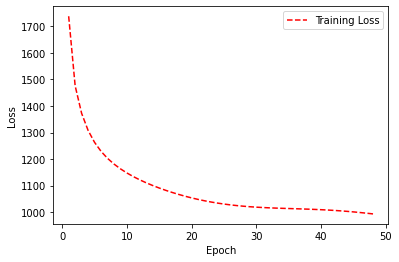

In [64]:
plot_loss("loss.png", history["losses"][:-2])

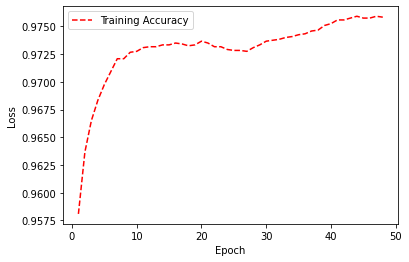

In [65]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')

In [ ]:
#add validation acc everywhere